# INTRO

## Notebook for applying Data Assimilation on seasonal data (PWP reconstructions)

### Characteristics:
* Assemble data in the proxy domain using offline (block update) assimilation instead of point-by-point
* Assemble data in SST (D47), SAT (D47), SSS (d18Oc) and precipitation domain
* Clean notebook for exporting focused on aggregated outcomes
* Aim: Test different ways of estimating d18Ow from salinity

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assistant Professor Vrije Universiteit Amsterdam

**References used in coding**

*Data assimiliation*
- Steiger, N.J., Hakim, G.J., Steig, E.J., Battisti, D.S., Roe, G.H., 2014. Assimilation of Time-Averaged Pseudoproxies for Climate Reconstruction. Journal of Climate 27, 426–441. https://doi.org/10.1175/JCLI-D-12-00693.1
- Hakim, G.J., Emile-Geay, J., Steig, E.J., Noone, D., Anderson, D.M., Tardif, R., Steiger, N., Perkins, W.A., 2016. The last millennium climate reanalysis project: Framework and first results. Journal of Geophysical Research: Atmospheres 121, 6745–6764. https://doi.org/10.1002/2016JD024751
- King, J., Tierney, J., Osman, M., Judd, E.J., Anchukaitis, K.J., 2023. DASH: a MATLAB toolbox for paleoclimate data assimilation. Geoscientific Model Development 16, 5653–5683. https://doi.org/10.5194/gmd-16-5653-2023
- Judd, E.J., Tierney, J.E., Lunt, D.J., Montañez, I.P., Huber, B.T., Wing, S.L., Valdes, P.J., 2024. A 485-million-year history of Earth’s surface temperature. Science 385, eadk3705. https://doi.org/10.1126/science.adk3705

*Data sources*
- de Winter, N.J., Tindall, J., Johnson, A.L.A., Goudsmit-Harzevoort, B., Wichern, N., Kaskes, P., Claeys, P., Huygen, F., van Leeuwen, S., Metcalfe, B., Bakker, P., Goolaerts, S., Wesselingh, F., Ziegler, M., 2024. Amplified seasonality in western Europe in a warmer world. Science Advances 10, eadl6717. https://doi.org/10.1126/sciadv.adl6717
- Haywood, A.M., Tindall, J.C., Dowsett, H.J., Dolan, A.M., Foley, K.M., Hunter, S.J., Hill, D.J., Chan, W.-L., Abe-Ouchi, A., Stepanek, C., Lohmann, G., Chandan, D., Peltier, W.R., Tan, N., Contoux, C., Ramstein, G., Li, X., Zhang, Z., Guo, C., Nisancioglu, K.H., Zhang, Q., Li, Q., Kamae, Y., Chandler, M.A., Sohl, L.E., Otto-Bliesner, B.L., Feng, R., Brady, E.C., von der Heydt, A.S., Baatsen, M.L.J., Lunt, D.J., 2020. The Pliocene Model Intercomparison Project Phase 2: large-scale climate features and climate sensitivity. Climate of the Past 16, 2095–2123. https://doi.org/10.5194/cp-16-2095-2020

**Calibration equations**

*salinity-d18Ow*
- Harwood, A. J. P., Dennis, P. F., Marca, A. D., Pilling, G. M., and Millner, R. S.: The oxygen isotope composition of water masses within the North Sea, Estuarine, Coastal and Shelf Science, 78, 353–359, https://doi.org/10.1016/j.ecss.2007.12.010, 2008.
- Graniero, L. E., Grossman, E. L., Robbins, J., Morales, J., Thompson, R., and O’Dea, A.: Conus Shell δ13C values as proxies for δ13CDIC in tropical waters, Palaeogeography, Palaeoclimatology, Palaeoecology, 472, 119–127, https://doi.org/10.1016/j.palaeo.2017.02.007, 2017.
- Railsback, L. B., Anderson, T. F., Ackerly, S. C., and Cisne, J. L.: Paleoceanographic modeling of temperature-salinity profiles from stable isotopic data, Paleoceanography, 4, 585–591, https://doi.org/10.1029/PA004i005p00585, 1989.
- Pohl, A., Wong  hearing, T. W., Brayard, A., Grossman, E., Joachimski, M. M., Le  hir, G., Letulle, T., Lunt, D. J., Martinez, M., Puceat, E., Suan, G., Valdes, P., and Donnadieu, Y.: Spatial biases in oxygen-based Phanerozoic seawater temperature reconstructions, Earth and Planetary Science Letters, 663, 119418, https://doi.org/10.1016/j.epsl.2025.119418, 2025.
- Grossman, E. L. and Joachimski, M. M.: Ocean temperatures through the Phanerozoic reassessed, Sci Rep, 12, 8938, https://doi.org/10.1038/s41598-022-11493-1, 2022.

*D47-temperature*
- Daëron, M. and Vermeesch, P.: Omnivariant generalized least squares regression: Theory, geochronological applications, and making the case for reconciled Δ47 calibrations, Chemical Geology, 121881, https://doi.org/10.1016/j.chemgeo.2023.121881, 2023.

*d18Oc-d18Ow-temperature*
- Grossman, E. L. and Ku, T.-L.: Oxygen and carbon isotope fractionation in biogenic aragonite: temperature effects, Chemical Geology: Isotope Geoscience section, 59, 59–74, 1986.
- Gonfiantini, R., Stichler, W., and Rozanski, K.: Standards and intercomparison materials distributed by the International Atomic Energy Agency for stable isotope measurements, 1995.
- Dettman, D. L., Reische, A. K., and Lohmann, K. C.: Controls on the stable isotope composition of seasonal growth bands in aragonitic fresh-water bivalves (Unionidae), Geochimica et Cosmochimica Acta, 63, 1049–1057, 1999.

## Load packages

In [46]:
# Load packages
import numpy as np # The 'numpy' package is needed for matrix operations and calculations
import pandas as pd # The 'pandas' package helps us to import and manage data
import math as math # Math package for data cleaning
from scipy import stats # Import scipy.package for confidence intervals
from sklearn.preprocessing import StandardScaler # Import the package for standardizing data
import D47calib as D47c # Import the package for treating clumped isotope data by Daëron and Vermeesch (2023; https://github.com/mdaeron/D47calib)
import matplotlib.pyplot as plt # The 'matplotlib' package contains tools needed to plot our data and results
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle # The 'Rectangle' function is used to add rectangles to our plots
import seaborn as sns # The 'seaborn' package is used to make our plots look nicer (e.g. enable heatmaps)
import warnings # The 'warnings' package is used to suppress warnings that might occur during the calculations
%matplotlib inline

# PRIOR - MONTHLY
## Load monthly SST model data

In [2]:
# Load model SST data as prior and show data structure
PlioMIP_SST = pd.read_csv('PWP case/PlioMIP_SST.csv') # Load the data for this assignment into Python and in the Jupyter environment.
PlioMIP_SST.head()

modelname    ja    fb    mr     ar     my     jn     jl     ag     sp  \
0    CCSM4-UoT  8.33  7.14  7.45   9.67  13.33  18.40  22.50  24.35  22.60   
1    CCSM4-Utr  9.96  8.75  8.95  11.03  14.62  19.37  23.50  25.29  23.95   
2       COSMOS  7.91  6.68  6.38   7.34   9.53  12.23  14.95  15.94  14.94   
3  EC-Earth3.3  9.18  7.62  7.41   9.32  13.58  19.22  24.06  25.27  23.56   
4     GISS2.1G  4.87  3.58  3.88   6.75  11.21  15.56  18.68  19.39  17.68   

      ot     nv     dc  
0  18.74  14.83  10.86  
1  20.76  16.37  12.48  
2  13.34  11.49   9.58  
3  20.26  16.05  12.13  
4  14.47  10.53   7.18

## Load monthly SAT model data

In [3]:
# Load model SAT data as prior and show data structure
PlioMIP_SAT = pd.read_csv('PWP case/PlioMIP_SAT.csv') # Load the data for this assignment into Python and in the Jupyter environment.
PlioMIP_SAT.head()

modelname     ja     fb     mr     ar     my     jn     jl     ag     sp  \
0      CCSM4   8.39   8.81   9.63  12.05  15.15  19.61  22.81  22.96  19.02   
1  CCSM4-UoT   6.97   7.58   9.96  12.54  16.46  21.92  25.43  24.72  19.69   
2  CCSM4-Utr   9.43   9.50  10.88  13.14  16.81  21.09  25.02  24.99  21.79   
3    CESM1.2   9.32   9.84  10.56  13.06  16.71  20.91  23.83  23.44  20.11   
4      CESM2  10.70  10.44  11.75  13.85  17.69  22.31  25.02  25.18  21.79   

      ot     nv     dc  
0  14.70  11.03   9.13  
1  14.32   9.94   7.02  
2  17.26  12.84  10.15  
3  15.96  12.77  10.38  
4  17.65  13.99  12.05

## Load monthly SSS model data

In [4]:
# Load model SSS data as prior and show data structure
PlioMIP_SSS = pd.read_csv('PWP case/PlioMIP_SSS.csv')  # Load the data for this assignment into Python and in the Jupyter environment.
PlioMIP_SSS = PlioMIP_SSS.pivot(index='modelname', columns='month', values='SSS').reset_index() # Pivot the data to have months as columns and models as rows
# Rename months to two-letter codes
month_mapping = {
    'Jan': 'ja', 'Feb': 'fb', 'Mar': 'mr', 'Apr': 'ar', 'May': 'my', 
    'Jun': 'jn', 'Jul': 'jl', 'Aug': 'ag', 'Sep': 'sp', 'Oct': 'ot', 
    'Nov': 'nv', 'Dec': 'dc'
}
PlioMIP_SSS.rename(columns=month_mapping, inplace=True) # Rename the columns to two-letter codes for months
PlioMIP_SSS.head()

month     modelname         ar         ag         dc         fb         ja  \
0         CCSM4-UoT  18.641620  17.664583  19.175005  19.155079  19.240961   
1            COSMOS  19.671519  19.139396  19.822553  19.930394  19.886921   
2            HadCM3  35.505535  34.605678  35.505248  35.616506  35.583428   
3           HadGEM3  32.947459  32.489019  32.896642  33.094949  33.066085   
4      IPSL-CM6A-LR  34.079274  33.265265  34.244052  34.275511  34.315632   

month         jl         jn         mr         my         nv         ot  \
0      17.706797  17.993721  18.922827  18.357751  18.862000  18.452913   
1      19.228002  19.358863  19.860139  19.468221  19.729077  19.523501   
2      34.878770  35.134441  35.604174  35.330172  35.355503  35.068206   
3      32.465359  32.599833  33.040556  32.797878  32.658298  32.534356   
4      33.524891  33.752462  34.183905  33.928167  34.027614  33.766878   

month         sp  
0      17.934462  
1      19.264149  
2      34.696112  
3      32.513514  
4      33.409809

## Load monthly precipitation data

In [5]:
# Load model precipitation data as prior and show data structure
PlioMIP_precip = pd.read_csv('PWP case/PlioMIP_precip.csv')  # Load the data for this assignment into Python and in the Jupyter environment.
PlioMIP_precip = PlioMIP_precip.pivot(index='modelname', columns='month', values='Mean_Precipitation').reset_index()  # Pivot the data to have months as columns and models as rows
PlioMIP_precip.rename(columns=month_mapping, inplace=True)  # Rename the columns to two-letter codes for months
PlioMIP_precip.head()

month modelname        ar        ag        dc        fb        ja        jl  \
0         CCSM4  1.481677  1.825992  4.034268  2.957591  3.776682  0.731645   
1      CCSM4UOT  1.494104  1.732526  3.068386  2.104363  2.758223  0.965024   
2      CCSM4Utr  1.525553  1.702673  3.965647  2.613341  3.236507  1.256546   
3       CESM1.2  1.461625  2.224233  3.428275  2.466815  3.199764  0.845094   
4         CESM2  1.549717  2.337191  4.229531  2.705796  3.424249  1.708422   

month        jn        mr        my        nv        ot        sp  
0      0.996839  1.921807  1.343585  3.962916  3.387227  2.900726  
1      1.286421  1.389566  1.473732  3.428390  2.597931  2.323011  
2      1.676994  1.656356  1.695042  3.999845  2.977811  2.365357  
3      0.787780  2.065939  1.132148  3.458813  3.049558  2.940248  
4      1.124801  1.911965  1.448587  4.192045  3.278223  2.665053

## Combine SST, SAT, SSS and precipitation data by modelname

In [6]:
# Normalize model names to lowercase and remove "-" signs
def normalize_modelname(df):
    df['modelname'] = df['modelname'].str.lower().str.replace('-', '', regex=False)
    # Merge all model names starting with "ipslcm6" into one modelname
    df['modelname'] = df['modelname'].str.replace(r'^ipslcm6.*', 'ipslcm6', regex=True)
    return df

# Apply normalization to all datasets
PlioMIP_SST = normalize_modelname(PlioMIP_SST)
PlioMIP_SAT = normalize_modelname(PlioMIP_SAT)
PlioMIP_SSS = normalize_modelname(PlioMIP_SSS)
PlioMIP_precip = normalize_modelname(PlioMIP_precip)

# Merge the datasets of SST, SAT, SSS, and precipitation, force suffixes to be added to the column names
PlioMIP = pd.merge(
    PlioMIP_SST.rename(columns={c: c + '_SST' for c in PlioMIP_SST.columns if c != 'modelname'}),
    PlioMIP_SAT.rename(columns={c: c + '_SAT' for c in PlioMIP_SAT.columns if c != 'modelname'}),
    on='modelname',
    how='outer'
)

PlioMIP = pd.merge(
    PlioMIP,
    PlioMIP_SSS.rename(columns={c: c + '_SSS' for c in PlioMIP_SSS.columns if c != 'modelname'}),
    on='modelname',
    how='outer'
)

PlioMIP = pd.merge(
    PlioMIP,
    PlioMIP_precip.rename(columns={c: c + '_precip' for c in PlioMIP_precip.columns if c != 'modelname'}),
    on='modelname',
    how='outer'
)

# Display the combined dataset
PlioMIP.head()

modelname  ja_SST  fb_SST  mr_SST  ar_SST  my_SST  jn_SST  jl_SST  ag_SST  \
0     ccsm4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  ccsm4uot    8.33    7.14    7.45    9.67   13.33   18.40    22.5   24.35   
2  ccsm4utr    9.96    8.75    8.95   11.03   14.62   19.37    23.5   25.29   
3   cesm1.2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     cesm2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   sp_SST  ...  dc_precip  fb_precip  ja_precip  jl_precip  jn_precip  \
0     NaN  ...   4.034268   2.957591   3.776682   0.731645   0.996839   
1   22.60  ...   3.068386   2.104363   2.758223   0.965024   1.286421   
2   23.95  ...   3.965647   2.613341   3.236507   1.256546   1.676994   
3     NaN  ...   3.428275   2.466815   3.199764   0.845094   0.787780   
4     NaN  ...   4.229531   2.705796   3.424249   1.708422   1.124801   

   mr_precip  my_precip  nv_precip  ot_precip  sp_precip  
0   1.921807   1.343585   3.962916   3.387227   2.900726  
1   1.389566   1.473732   3.428390   2.597931   2.323011  
2   1.656356   1.695042   3.999845   2.977811   2.365357  
3   2.065939   1.132148   3.458813   3.049558   2.940248  
4   1.911965   1.448587   4.192045   3.278223   2.665053  

[5 rows x 49 columns]

## Calculate the monthly prior for model SST, SAT, SSS and precipitation values

In [7]:
# Create list of month names
months = ['ja', 'fb', 'mr', 'ar', 'my', 'jn', 'jl', 'ag', 'sp', 'ot', 'nv', 'dc']

# Prior SST, SAT, SSS & precipitation estimates from climate models (mean)
mu_prior_SAT_monthly = np.array(PlioMIP[[f"{month}_SAT" for month in months]].mean(axis=0, skipna=True))
mu_prior_SST_monthly = np.array(PlioMIP[[f"{month}_SST" for month in months]].mean(axis=0, skipna=True))
mu_prior_SSS_monthly = np.array(PlioMIP[[f"{month}_SSS" for month in months]].mean(axis=0, skipna=True))
mu_prior_precip_monthly = np.array(PlioMIP[[f"{month}_precip" for month in months]].mean(axis=0, skipna=True))

# Covariance between months in prior SST, SAT, SSS, and precip estimates from climate models (covariance matrix)
cov_prior_SAT_monthly = np.cov(PlioMIP[[f"{month}_SAT" for month in months]].dropna(), rowvar=False)
cov_prior_SST_monthly = np.cov(PlioMIP[[f"{month}_SST" for month in months]].dropna(), rowvar=False)
cov_prior_SSS_monthly = np.cov(PlioMIP[[f"{month}_SSS" for month in months]].dropna(), rowvar=False)
cov_prior_precip_monthly = np.cov(PlioMIP[[f"{month}_precip" for month in months]].dropna(), rowvar=False)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SAT_monthly_original, cov_prior_SAT_monthly_original = mu_prior_SAT_monthly.copy(), cov_prior_SAT_monthly.copy()
mu_prior_SST_monthly_original, cov_prior_SST_monthly_original = mu_prior_SST_monthly.copy(), cov_prior_SST_monthly.copy()
mu_prior_SSS_monthly_original, cov_prior_SSS_monthly_original = mu_prior_SSS_monthly.copy(), cov_prior_SSS_monthly.copy()
mu_prior_precip_monthly_original, cov_prior_precip_monthly_original = mu_prior_precip_monthly.copy(), cov_prior_precip_monthly.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SAT_monthly = np.sqrt(np.diag(cov_prior_SAT_monthly))
std_prior_SST_monthly = np.sqrt(np.diag(cov_prior_SST_monthly))
std_prior_SSS_monthly = np.sqrt(np.diag(cov_prior_SSS_monthly))
std_prior_precip_monthly = np.sqrt(np.diag(cov_prior_precip_monthly))

print("SAT Monthly Means:", mu_prior_SAT_monthly)
print("SAT Monthly Std Devs:", std_prior_SAT_monthly)
print("SST Monthly Means:", mu_prior_SST_monthly)
print("SST Monthly Std Devs:", std_prior_SST_monthly)
print("SSS Monthly Means:", mu_prior_SSS_monthly)
print("SSS Monthly Std Devs:", std_prior_SSS_monthly)
print("Precip Monthly Means:", mu_prior_precip_monthly)
print("Precip Monthly Std Devs:", std_prior_precip_monthly)

SAT Monthly Means: [ 6.71411765  6.69294118  8.04647059 10.80058824 14.58529412 19.27941176
 22.28411765 21.87705882 18.43058824 14.13235294 10.31941176  7.91294118]
SAT Monthly Std Devs: [2.19619574 2.33777342 2.13652153 1.88298457 1.96586214 2.24523793
 2.7378734  2.89253514 2.75413206 2.61063098 2.36348384 2.20706469]
SST Monthly Means: [ 8.89909091  7.84181818  7.89181818  9.60909091 12.97272727 17.37909091
 21.1        22.14727273 20.38636364 17.25272727 13.83181818 10.91818182]
SST Monthly Std Devs: [1.66519341 1.70563078 1.62979028 1.41943971 1.74026487 2.5002778
 3.07210677 3.32125606 3.31004916 2.94745684 2.34808781 1.8649387 ]
SSS Monthly Means: [29.29601903 29.27455803 29.08572385 28.76846642 28.43459126 28.18546307
 28.01587662 27.98742991 28.17716438 28.56415277 28.93190974 29.18675145]
SSS Monthly Std Devs: [5.92900181 5.93098095 5.9695257  6.03338574 6.09152224 6.17221843
 6.2365113  6.23680216 6.19993142 6.09896377 6.00078604 5.9423462 ]
Precip Monthly Means: [3.3589960

## Plot the monthly priors for all model values

[Text(1, 0, 'January'),
 Text(2, 0, 'February'),
 Text(3, 0, 'March'),
 Text(4, 0, 'April'),
 Text(5, 0, 'May'),
 Text(6, 0, 'June'),
 Text(7, 0, 'July'),
 Text(8, 0, 'August'),
 Text(9, 0, 'September'),
 Text(10, 0, 'October'),
 Text(11, 0, 'November'),
 Text(12, 0, 'December')]

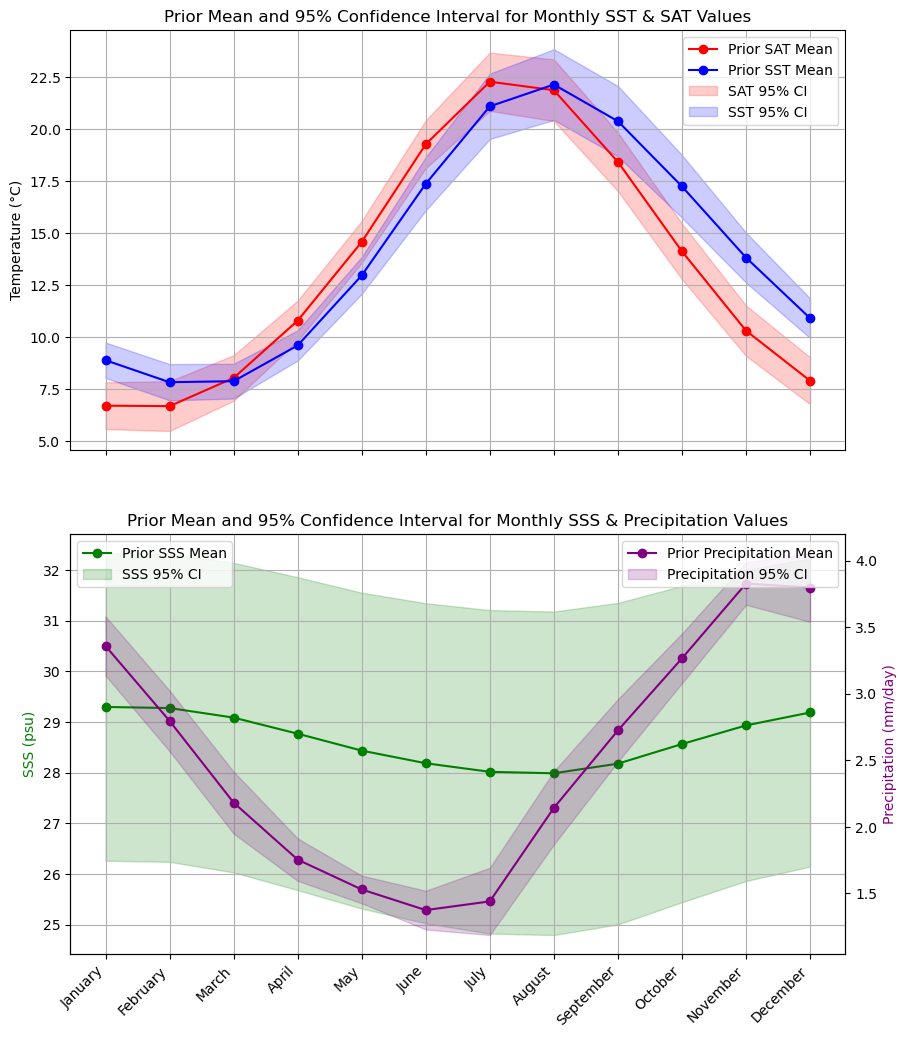

In [8]:
# Set dimensions of data
n_models_monthly = len(PlioMIP["modelname"])  # Find the total number of models (use monthly data because monthly data has this column duplicated 3 times)

# Create a monthly scale for the x-axis
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  # List full month names
months_scale = np.arange(len(months)) + 1  # Create monthly scale

# Create the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Panel 1: Plot the prior distribution for SST and SAT
axes[0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o', color='r')
axes[0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o', color='b')

# Add 95% confidence intervals for SAT
axes[0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='r', label='SAT 95% CI'
)

# Add 95% confidence intervals for SST
axes[0].fill_between(
    months_scale,
    mu_prior_SST_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    mu_prior_SST_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='b', label='SST 95% CI'
)

axes[0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST & SAT Values')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()
axes[0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation
axes[1].plot(months_scale, mu_prior_SSS_monthly, label='Prior SSS Mean', marker='o', color='g')
ax2 = axes[1].twinx()  # Create a secondary y-axis for precipitation
ax2.plot(months_scale, mu_prior_precip_monthly, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1].fill_between(
    months_scale,
    mu_prior_SSS_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_monthly / np.sqrt(n_models_monthly),
    mu_prior_SSS_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1].set_ylabel('SSS (psu)', color='g')
ax2.set_ylabel('Precipitation (mm/day)', color='purple')
axes[1].set_title('Prior Mean and 95% Confidence Interval for Monthly SSS & Precipitation Values')
axes[1].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1].grid(True)

# Update the x-axis with month names
axes[1].set_xticks(months_scale)
axes[1].set_xticklabels(month_names, rotation=45, ha="right")

### Convert SST and SAT model data to D47 domain using the regression by Daëron and Vermeesch (2023) and propagate uncertainty in the calibration

In [9]:
# Apply T47()-function from the D47calib package to all SST columns
# Identify the SST and SAT columns separately
SST_columns = [col for col in PlioMIP.columns if col.endswith('_SST')]
SAT_columns = [col for col in PlioMIP.columns if col.endswith('_SAT')]

# Apply the conversion function to the SST and SAT columns and add new columns for D47 and D47_SE
for col in SST_columns:
    base_col_name = col.replace('_SST', '') # Remove the '_SST' suffix from the column name
    PlioMIP[f'{base_col_name}_SST_D47'], PlioMIP[f'{base_col_name}_SST_D47_SE'] = zip(*PlioMIP[col].apply(
        lambda x: D47c.OGLS23.T47(T = x) if not pd.isna(x) else (np.nan, np.nan)
    )) # Use zip() to unpack the tuple returned by the apply() method and apply the T47()-function to each value in the column
for col in SAT_columns:
    base_col_name = col.replace('_SAT', '') # Remove the '_SST' suffix from the column name
    PlioMIP[f'{base_col_name}_SAT_D47'], PlioMIP[f'{base_col_name}_SAT_D47_SE'] = zip(*PlioMIP[col].apply(
        lambda x: D47c.OGLS23.T47(T = x) if not pd.isna(x) else (np.nan, np.nan)
    )) # Use zip() to unpack the tuple returned by the apply() method and apply the T47()-function to each value in the column

# Display the combined data with D47 and D47_SE columns
D47_columns = [col for col in PlioMIP.columns if col.endswith('_D47')]
D47_se_columns = [col for col in PlioMIP.columns if '_D47_SE' in col]
print("D47 values for all model outcomes:\n", PlioMIP[D47_columns].head())
print("Calibration standard errors for all model outcomes:\n", PlioMIP[D47_se_columns].head())

D47 values for all model outcomes:
    ja_SST_D47  fb_SST_D47  mr_SST_D47  ar_SST_D47  my_SST_D47  jn_SST_D47  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1    0.648316    0.652623    0.651496    0.643531    0.630811    0.613992   
2    0.642505    0.646808    0.646093    0.638746    0.626446    0.610876   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   jl_SST_D47  ag_SST_D47  sp_SST_D47  ot_SST_D47  ...  mr_SAT_D47  \
0         NaN         NaN         NaN         NaN  ...    0.643673   
1    0.601033    0.595364    0.600724    0.612897  ...    0.642505   
2    0.597955    0.592525    0.596581    0.606465  ...    0.639270   
3         NaN         NaN         NaN         NaN  ...    0.640392   
4         NaN         NaN         NaN         NaN  ...    0.636241   

   ar_SAT_D47  my_SAT_D47  jn_SAT_D47  jl_SAT_D47  ag_SAT_D47  sp_SAT_D47  \
0  

### Estimate seawater oxygen isotope value from salinity based on different salinity-d18Ow relationships:
* Modern North Sea d18Ow-salinity relationship by Harwood et al. (2008)
* Modern Panama d18Ow-salinity relationship by Graniero et al. (2017)
* Model of Railsback et al. (1989) with parameter for icehouse conditions (D_fw = 21.0; δ18O = 0‰; alpha = 21.0/S0; see Pohl et al., 2025)
* Model of Railsback et al. (1989) with parameter for greenhouse conditions (D_fw = 8.0; δ18O = –1.08‰; alpha = 8.0/S0; see Pohl et al., 2025 and Grossman and Joachimski, 2022)

In [10]:
# Apply the d18Ow-SSS function from Harwood et al. (2007) to all SSS columns
# Identify the SSS columns
SSS_columns = [col for col in PlioMIP.columns if col.endswith('_SSS')]

# Apply the conversion function to the SSS columns and add new columns for d18Ow and d18Ow_SE
for col in SSS_columns:
    base_col_name = col.replace('_SSS', '')  # Remove the '_SSS' suffix from the column name
    PlioMIP[f'{base_col_name}_SSS_d18Ow_Harwood'] = PlioMIP[col].apply(
        lambda x: -9.300 + 0.274 * x if not pd.isna(x) else np.nan  # Calculate d18Ow using Harwood et al. (2007) equation
    )
    PlioMIP[f'{base_col_name}_SSS_d18Ow_Graniero'] = PlioMIP[col].apply(
        lambda x: -7.89 + 0.23 * x if not pd.isna(x) else np.nan  # Calculate d18Ow using Graniero et al. (2006) equation
    )
    PlioMIP[f'{base_col_name}_SSS_d18Ow_Railsback_ice'] = PlioMIP[col].apply(
        lambda x: 0 + 21 / 35 * (x - 35) if not pd.isna(x) else np.nan  # Calculate d18Ow using Railsback et al. (1989) equation with alpha for icehouse conditions
    )
    PlioMIP[f'{base_col_name}_SSS_d18Ow_Railsback_green'] = PlioMIP[col].apply(
        lambda x: -1.08 + 8 / 35 * (x - 35) if not pd.isna(x) else np.nan  # Calculate d18Ow using Railsback et al. (1989) equation with alpha for greenhouse conditions
    )

# Display the combined data with d18Ow and d18Ow_SE columns
d18Ow_columns = [col for col in PlioMIP.columns if "d18Ow" in col]
print("d18Ow values for all model outcomes:\n", PlioMIP[d18Ow_columns].head())

d18Ow values for all model outcomes:
    ar_SSS_d18Ow_Harwood  ar_SSS_d18Ow_Graniero  ar_SSS_d18Ow_Railsback_ice  \
0                   NaN                    NaN                         NaN   
1             -4.192196              -3.602427                   -9.815028   
2                   NaN                    NaN                         NaN   
3                   NaN                    NaN                         NaN   
4                   NaN                    NaN                         NaN   

   ar_SSS_d18Ow_Railsback_green  ag_SSS_d18Ow_Harwood  ag_SSS_d18Ow_Graniero  \
0                           NaN                   NaN                    NaN   
1                     -4.819058             -4.459904              -3.827146   
2                           NaN                   NaN                    NaN   
3                           NaN                   NaN                    NaN   
4                           NaN                   NaN                    NaN   

   ag_SSS_d1

### Calculate carbonate oxygen isotope value from SST and seawater oxygen isotope data using Grossman and Ku (1986) with the VPDB-VSMOW scale correction by Gonfiantini et al. (1995) and Dettman et al. (1999)

In [11]:
# Iterate over each model and calculate d18Oc values
for index, row in PlioMIP.iterrows():
    # Iterate over each month
    for month in months:
        SST = row[f"{month}_SST"]
        # Calculate d18Oc using different d18Ow-SSS relationships
        d18Ow_Harwood = row[f"{month}_SSS_d18Ow_Harwood"]
        d18Ow_Graniero = row[f"{month}_SSS_d18Ow_Graniero"]
        d18Ow_Railsback_ice = row[f"{month}_SSS_d18Ow_Railsback_ice"]
        d18Ow_Railsback_green = row[f"{month}_SSS_d18Ow_Railsback_green"]
        if not pd.isna(SST) and not pd.isna(d18Ow_Harwood):
            d18Oc_Harwood = (20.6 - SST) / 4.34 + (d18Ow_Harwood - 0.27)
        else:
            d18Oc_Harwood = np.nan
        if not pd.isna(SST) and not pd.isna(d18Ow_Graniero):
            d18Oc_Graniero = (20.6 - SST) / 4.34 + (d18Ow_Graniero - 0.27)
        else:
            d18Oc_Graniero = np.nan
        if not pd.isna(SST) and not pd.isna(d18Ow_Railsback_ice):
            d18Oc_Railsback_ice = (20.6 - SST) / 4.34 + (d18Ow_Railsback_ice - 0.27)
        else:
            d18Oc_Railsback_ice = np.nan
        if not pd.isna(SST) and not pd.isna(d18Ow_Railsback_green):
            d18Oc_Railsback_green = (20.6 - SST) / 4.34 + (d18Ow_Railsback_green - 0.27)
        else:
            d18Oc_Railsback_green = np.nan
        # Add the calculated d18Oc values to the DataFrame
        PlioMIP.loc[index, f"{month}_d18Oc_Harwood"] = d18Oc_Harwood
        PlioMIP.loc[index, f"{month}_d18Oc_Graniero"] = d18Oc_Graniero
        PlioMIP.loc[index, f"{month}_d18Oc_Railsback_ice"] = d18Oc_Railsback_ice
        PlioMIP.loc[index, f"{month}_d18Oc_Railsback_green"] = d18Oc_Railsback_green

# Display the updated DataFrame
PlioMIP.head()


C:\Users\nwi213\AppData\Local\Temp\ipykernel_22048\2217022968.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PlioMIP.loc[index, f"{month}_d18Oc_Graniero"] = d18Oc_Graniero
C:\Users\nwi213\AppData\Local\Temp\ipykernel_22048\2217022968.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PlioMIP.loc[index, f"{month}_d18Oc_Railsback_ice"] = d18Oc_Railsback_ice
C:\Users\nwi213\AppData\Local\Temp\ipykernel_22048\2217022968.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

modelname  ja_SST  fb_SST  mr_SST  ar_SST  my_SST  jn_SST  jl_SST  ag_SST  \
0     ccsm4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1  ccsm4uot    8.33    7.14    7.45    9.67   13.33   18.40    22.5   24.35   
2  ccsm4utr    9.96    8.75    8.95   11.03   14.62   19.37    23.5   25.29   
3   cesm1.2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     cesm2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   sp_SST  ...  ot_d18Oc_Railsback_ice  ot_d18Oc_Railsback_green  \
0     NaN  ...                     NaN                       NaN   
1   22.60  ...               -9.769681                  -4.70362   
2   23.95  ...                     NaN                       NaN   
3     NaN  ...                     NaN                       NaN   
4     NaN  ...                     NaN                       NaN   

   nv_d18Oc_Harwood  nv_d18Oc_Graniero  nv_d18Oc_Railsback_ice  \
0               NaN                NaN                     NaN   
1         -3.072319          -2.492247               -8.623307   
2               NaN                NaN                     NaN   
3               NaN                NaN                     NaN   
4               NaN                NaN                     NaN   

   nv_d18Oc_Railsback_green  dc_d18Oc_Harwood  dc_d18Oc_Graniero  \
0                       NaN               NaN                NaN   
1                 -3.709193         -2.071809          -1.505509   
2                       NaN               NaN                NaN   
3                       NaN               NaN                NaN   
4                       NaN               NaN                NaN   

   dc_d18Oc_Railsback_ice  dc_d18Oc_Railsback_green  
0                     NaN                       NaN  
1               -7.520758                 -2.722902  
2                     NaN                       NaN  
3                     NaN                       NaN  
4                     NaN                       NaN  

[5 rows x 193 columns]

### Calculate the monthly prior for model SST- and SAT-derived D47 values and SSS-derived seawater oxygen isotope values with propagated uncertainty

In [12]:
# Set the weights of the data based on the standard errors
weights_monthly_SST_D47 = 1 / PlioMIP[[f"{month}_SST_D47_SE" for month in months]] ** 2
weights_monthly_SAT_D47 = 1 / PlioMIP[[f"{month}_SAT_D47_SE" for month in months]] ** 2

# Change the column suffixes from "_D47_SE" to "_D47" in weights_monthly_SST_D47 to match the headers of the D47 matrix later for multiplication
weights_monthly_SST_D47.columns = [col.replace('_SST_D47_SE', '_SST_D47') for col in weights_monthly_SST_D47.columns]
weights_monthly_SAT_D47.columns = [col.replace('_SAT_D47_SE', '_SAT_D47') for col in weights_monthly_SAT_D47.columns]

# Prior D47 estimates from climate models (weighted mean)
mu_prior_SST_D47_monthly = np.array((PlioMIP[[f"{month}_SST_D47" for month in months]] * weights_monthly_SST_D47).sum(axis = 0, skipna = True) / weights_monthly_SST_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array
mu_prior_SAT_D47_monthly = np.array((PlioMIP[[f"{month}_SAT_D47" for month in months]] * weights_monthly_SAT_D47).sum(axis = 0, skipna = True) / weights_monthly_SAT_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array

# Calculate simple (unweighted) mean for monthly d18Ow values using different SSS-d18Ow relationships
mu_prior_SSS_d18Ow_Harwood_monthly = np.array(PlioMIP[[f"{month}_SSS_d18Ow_Harwood" for month in months]].mean(axis=0, skipna=True))
mu_prior_SSS_d18Ow_Graniero_monthly = np.array(PlioMIP[[f"{month}_SSS_d18Ow_Graniero" for month in months]].mean(axis=0, skipna=True))
mu_prior_SSS_d18Ow_Railsback_ice_monthly = np.array(PlioMIP[[f"{month}_SSS_d18Ow_Railsback_ice" for month in months]].mean(axis=0, skipna=True))
mu_prior_SSS_d18Ow_Railsback_green_monthly = np.array(PlioMIP[[f"{month}_SSS_d18Ow_Railsback_green" for month in months]].mean(axis=0, skipna=True))
mu_prior_d18Oc_Harwood_monthly = np.array(PlioMIP[[f"{month}_d18Oc_Harwood" for month in months]].mean(axis=0, skipna=True))
mu_prior_d18Oc_Graniero_monthly = np.array(PlioMIP[[f"{month}_d18Oc_Graniero" for month in months]].mean(axis=0, skipna=True))
mu_prior_d18Oc_Railsback_ice_monthly = np.array(PlioMIP[[f"{month}_d18Oc_Railsback_ice" for month in months]].mean(axis=0, skipna=True))
mu_prior_d18Oc_Railsback_green_monthly = np.array(PlioMIP[[f"{month}_d18Oc_Railsback_green" for month in months]].mean(axis=0, skipna=True))

# Decompose variance within and between model outcomes
# Compute variance across models
model_variances_SST = PlioMIP[[f"{month}_SST_D47" for month in months]].var(axis = 0, ddof = 1)
model_variances_SAT = PlioMIP[[f"{month}_SAT_D47" for month in months]].var(axis = 0, ddof = 1)
model_variances_d18Ow_Harwood = PlioMIP[[f"{month}_SSS_d18Ow_Harwood" for month in months]].var(axis = 0, ddof = 1)
model_variances_d18Ow_Graniero = PlioMIP[[f"{month}_SSS_d18Ow_Graniero" for month in months]].var(axis = 0, ddof = 1)
model_variances_d18Ow_Railsback_ice = PlioMIP[[f"{month}_SSS_d18Ow_Railsback_ice" for month in months]].var(axis = 0, ddof = 1)
model_variances_d18Ow_Railsback_green = PlioMIP[[f"{month}_SSS_d18Ow_Railsback_green" for month in months]].var(axis = 0, ddof = 1)
model_variances_d18Oc_Harwood = PlioMIP[[f"{month}_d18Oc_Harwood" for month in months]].var(axis = 0, ddof = 1)
model_variances_d18Oc_Graniero = PlioMIP[[f"{month}_d18Oc_Graniero" for month in months]].var(axis = 0, ddof = 1)
model_variances_d18Oc_Railsback_ice = PlioMIP[[f"{month}_d18Oc_Railsback_ice" for month in months]].var(axis = 0, ddof = 1)
model_variances_d18Oc_Railsback_green = PlioMIP[[f"{month}_d18Oc_Railsback_green" for month in months]].var(axis = 0, ddof = 1)
# Compute variance on measurements
measurement_variances_SST = (PlioMIP[[f"{month}_SST_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)
measurement_variances_SAT = (PlioMIP[[f"{month}_SAT_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)

# Covariance between months in prior D47 estimates from climate models (weighted covariance matrix)
# Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_monthly_SST = np.cov(PlioMIP[[f"{month}_SST_D47" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_SAT = np.cov(PlioMIP[[f"{month}_SAT_D47" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_d18Ow_Harwood = np.cov(PlioMIP[[f"{month}_SSS_d18Ow_Harwood" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_d18Ow_Graniero = np.cov(PlioMIP[[f"{month}_SSS_d18Ow_Graniero" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_d18Ow_Railsback_ice = np.cov(PlioMIP[[f"{month}_SSS_d18Ow_Railsback_ice" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_d18Ow_Railsback_green = np.cov(PlioMIP[[f"{month}_SSS_d18Ow_Railsback_green" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_d18Oc_Harwood = np.cov(PlioMIP[[f"{month}_d18Oc_Harwood" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_d18Oc_Graniero = np.cov(PlioMIP[[f"{month}_d18Oc_Graniero" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_d18Oc_Railsback_ice = np.cov(PlioMIP[[f"{month}_d18Oc_Railsback_ice" for month in months]].dropna(), rowvar = False)
cov_raw_monthly_d18Oc_Railsback_green = np.cov(PlioMIP[[f"{month}_d18Oc_Railsback_green" for month in months]].dropna(), rowvar = False)
cov_prior_SST_D47_monthly = cov_raw_monthly_SST.copy() # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_SAT_D47_monthly = cov_raw_monthly_SAT.copy() # Copy covariance matrix to add uncertainty coming from the measurements
np.fill_diagonal(cov_prior_SST_D47_monthly, np.diagonal(cov_raw_monthly_SST) + measurement_variances_SST)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)
np.fill_diagonal(cov_prior_SAT_D47_monthly, np.diagonal(cov_raw_monthly_SAT) + measurement_variances_SAT)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SST_D47_monthly_original, cov_prior_SST_D47_monthly_original = mu_prior_SST_D47_monthly.copy(), cov_prior_SST_D47_monthly.copy()
mu_prior_SAT_D47_monthly_original, cov_prior_SAT_D47_monthly_original = mu_prior_SAT_D47_monthly.copy(), cov_prior_SAT_D47_monthly.copy()
mu_prior_SSS_d18Ow_Harwood_monthly_original, mu_prior_d18Oc_Graniero_monthly_original, mu_prior_d18Oc_Railsback_ice_monthly_original, mu_prior_d18Oc_Railsback_green_monthly_original = mu_prior_SSS_d18Ow_Harwood_monthly.copy(), mu_prior_d18Oc_Graniero_monthly.copy(), mu_prior_d18Oc_Railsback_ice_monthly.copy(), mu_prior_d18Oc_Railsback_green_monthly.copy()
cov_prior_SSS_d18Ow_Harwood_monthly_original, cov_prior_d18Ow_Graniero_monthly_original, cov_prior_d18Ow_Railsback_ice_monthly_original, cov_prior_d18Ow_Railsback_green_monthly_original = cov_raw_monthly_d18Ow_Harwood.copy(), cov_raw_monthly_d18Ow_Graniero.copy(), cov_raw_monthly_d18Ow_Railsback_ice.copy(), cov_raw_monthly_d18Ow_Railsback_green.copy()
mu_prior_d18Oc_Harwood_monthly_original, mu_prior_d18Oc_Graniero_monthly_original, mu_prior_d18Oc_Railsback_ice_monthly_original, mu_prior_d18Oc_Railsback_green_monthly_original = mu_prior_d18Oc_Harwood_monthly.copy(), mu_prior_d18Oc_Graniero_monthly.copy(), mu_prior_d18Oc_Railsback_ice_monthly.copy(), mu_prior_d18Oc_Railsback_green_monthly.copy()
cov_prior_d18Oc_Harwood_monthly_original, cov_prior_d18Oc_Graniero_monthly_original, cov_prior_d18Oc_Railsback_ice_monthly_original, cov_prior_d18Oc_Railsback_green_monthly_original = cov_raw_monthly_d18Oc_Harwood.copy(), cov_raw_monthly_d18Oc_Graniero.copy(), cov_raw_monthly_d18Oc_Railsback_ice.copy(), cov_raw_monthly_d18Oc_Railsback_green.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SST_D47_monthly = np.sqrt(np.diag(cov_prior_SST_D47_monthly))
std_prior_SAT_D47_monthly = np.sqrt(np.diag(cov_prior_SAT_D47_monthly))
std_prior_SSS_d18Ow_Harwood_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Ow_Harwood))
std_prior_SSS_d18Ow_Graniero_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Ow_Graniero))
std_prior_SSS_d18Ow_Railsback_ice_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Ow_Railsback_ice))
std_prior_SSS_d18Ow_Railsback_green_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Ow_Railsback_green))
std_prior_d18Oc_Harwood_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Oc_Harwood))
std_prior_d18Oc_Graniero_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Oc_Graniero))
std_prior_d18Oc_Railsback_ice_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Oc_Railsback_ice))
std_prior_d18Oc_Railsback_green_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Oc_Railsback_green))

# Print the results
print("Prior D47 estimates from SST in climate models (weighted mean):")
print(mu_prior_SST_D47_monthly)
print("Prior D47 estimates from SST in climate models (weighted covariance matrix):")
print(std_prior_SST_D47_monthly)
print("---")
print("Prior D47 estimates from SAT in climate models (weighted mean):")
print(mu_prior_SAT_D47_monthly)
print("Prior D47 estimates from SAT in climate models (weighted covariance matrix):")
print(std_prior_SAT_D47_monthly)
print("---")
print("Prior d18Ow estimates from SSS in climate models (weighted mean) using Harwood et al.:")
print(mu_prior_SSS_d18Ow_Harwood_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted mean) using Graniero et al.:")
print(mu_prior_SSS_d18Ow_Graniero_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted mean) using Railsback et al. icehouse):")
print(mu_prior_SSS_d18Ow_Railsback_ice_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted mean) using Railsback et al. greenhouse):")
print(mu_prior_SSS_d18Ow_Railsback_green_monthly)
print("---")
print("Prior d18Ow estimates from SSS in climate models (weighted covariance matrix) using Harwood et al.:")
print(std_prior_SSS_d18Ow_Harwood_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted covariance matrix) using Graniero et al.:")
print(std_prior_SSS_d18Ow_Graniero_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted covariance matrix) using Railsback et al. icehouse):")
print(std_prior_SSS_d18Ow_Railsback_ice_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted covariance matrix) using Railsback et al. greenhouse):")
print(std_prior_SSS_d18Ow_Railsback_green_monthly)
print("---")
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted mean) using Harwood et al.:")
print(mu_prior_d18Oc_Harwood_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted mean) using Graniero et al.:")
print(mu_prior_d18Oc_Graniero_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted mean) using Railsback et al. icehouse):")
print(mu_prior_d18Oc_Railsback_ice_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted mean) using Railsback et al. greenhouse):")
print(mu_prior_d18Oc_Railsback_green_monthly)
print("---")
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted covariance matrix) using Harwood et al.:")
print(std_prior_d18Oc_Harwood_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted covariance matrix) using Graniero et al.:")
print(std_prior_d18Oc_Graniero_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted covariance matrix) using Railsback et al. icehouse):")
print(std_prior_d18Oc_Railsback_ice_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted covariance matrix) using Railsback et al. greenhouse):")
print(std_prior_d18Oc_Railsback_green_monthly)

Prior D47 estimates from SST in climate models (weighted mean):
[0.64595815 0.64972969 0.64957918 0.64352257 0.63174847 0.61687649
 0.60495042 0.60168179 0.60710259 0.61713861 0.62862875 0.63877671]
Prior D47 estimates from SST in climate models (weighted covariance matrix):
[0.00614572 0.00638619 0.00611021 0.00523351 0.00611762 0.0083541
 0.00986818 0.01053415 0.01065771 0.00977107 0.00805759 0.00665147]
---
Prior D47 estimates from SAT in climate models (weighted mean):
[0.6535531  0.65354873 0.64877444 0.63916405 0.62623172 0.61087967
 0.6014159  0.6026324  0.61343328 0.62749031 0.64061857 0.64921573]
Prior D47 estimates from SAT in climate models (weighted covariance matrix):
[0.0081692  0.00869841 0.00782808 0.00672115 0.00673335 0.00732744
 0.0086457  0.0091529  0.00900611 0.00891738 0.00842026 0.00808888]
---
Prior d18Ow estimates from SSS in climate models (weighted mean) using Harwood et al.:
[-1.27289079 -1.2787711  -1.33051166 -1.4174402  -1.50892199 -1.57718312
 -1.6236498

### Plot the monthly prior for model SST- and SAT-derived D47 values, model SSS-derived carbonate d18O values and precipitation with propagated uncertainty

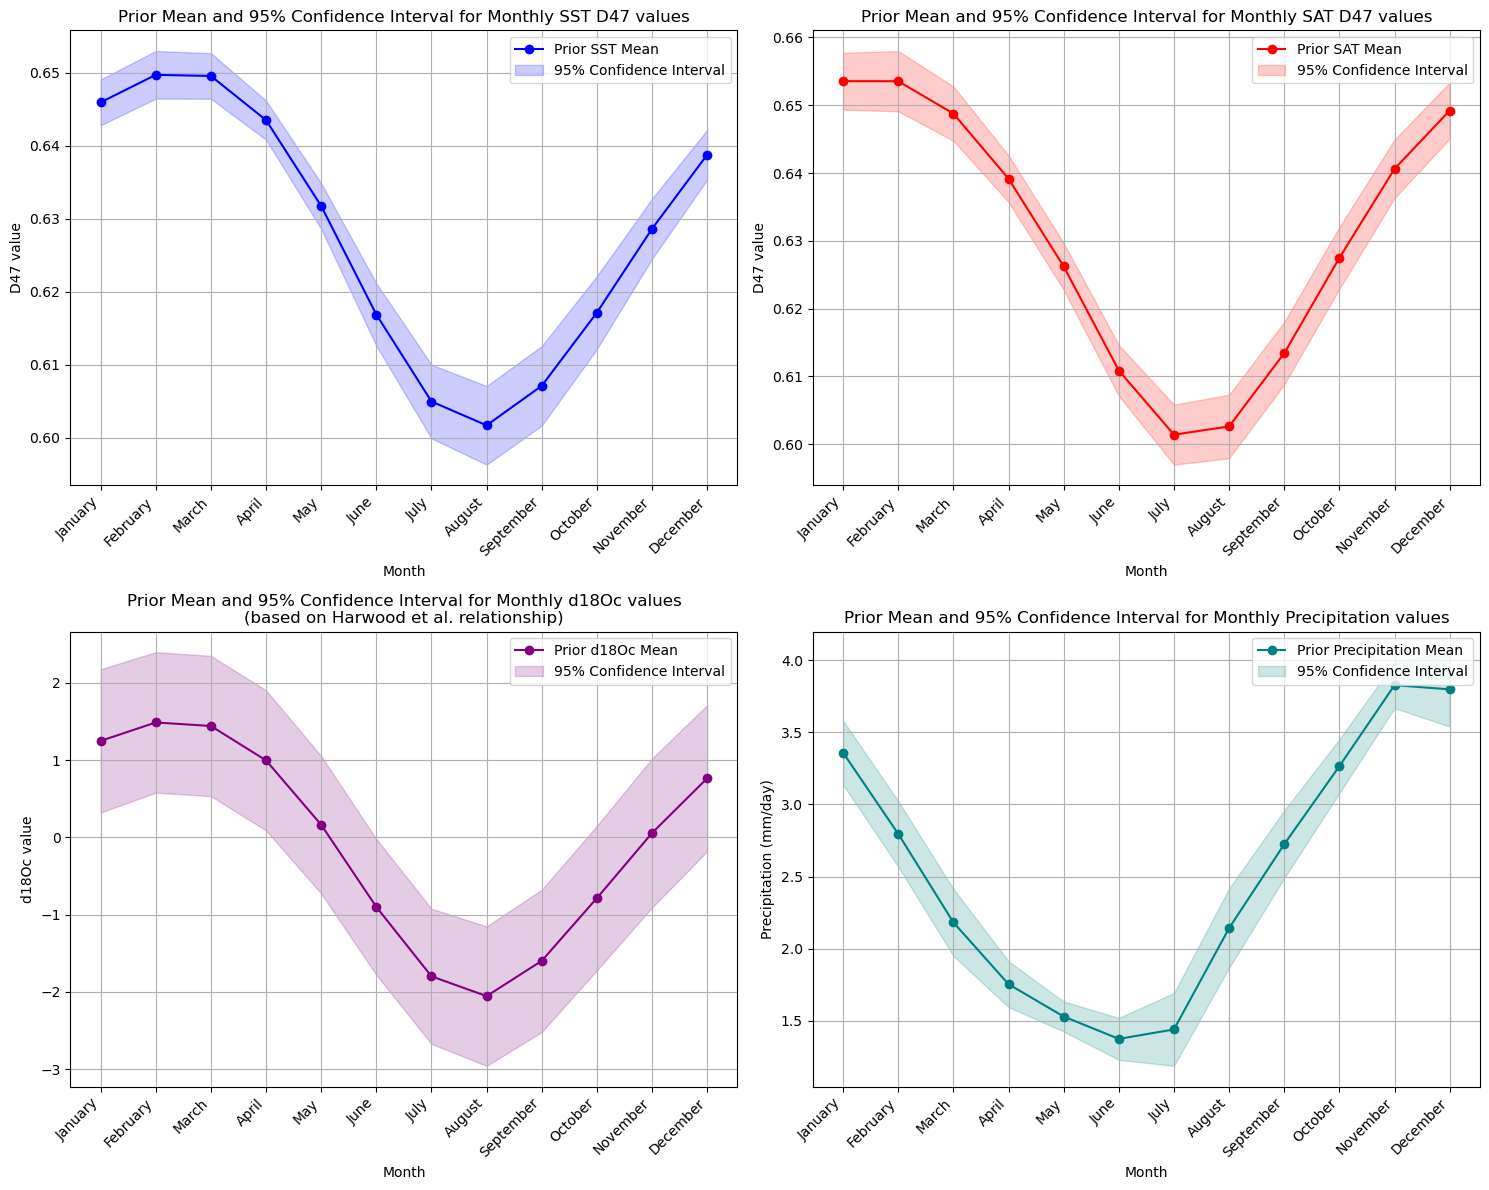

In [13]:
# Plot monthly prior distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust the figure to have 2x2 grid

# Plot the prior distribution for SST
axes[0, 0].plot(months_scale, mu_prior_SST_D47_monthly, label='Prior SST Mean', color='b', marker='o')
axes[0, 0].fill_between(months_scale,
                        mu_prior_SST_D47_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly / np.sqrt(n_models_monthly),
                        mu_prior_SST_D47_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly / np.sqrt(n_models_monthly),
                        color='b', alpha=0.2, label='95% Confidence Interval')
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST D47 values')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('D47 value')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot the prior distribution for SAT
axes[0, 1].plot(months_scale, mu_prior_SAT_D47_monthly, label='Prior SAT Mean', color='r', marker='o')
axes[0, 1].fill_between(months_scale,
                        mu_prior_SAT_D47_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_D47_monthly / np.sqrt(n_models_monthly),
                        mu_prior_SAT_D47_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_D47_monthly / np.sqrt(n_models_monthly),
                        color='r', alpha=0.2, label='95% Confidence Interval')
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Prior Mean and 95% Confidence Interval for Monthly SAT D47 values')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('D47 value')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot the prior distribution for d18Oc
axes[1, 0].plot(months_scale, mu_prior_d18Oc_Harwood_monthly, label='Prior d18Oc Mean', color='purple', marker='o')
axes[1, 0].fill_between(months_scale,
                        mu_prior_d18Oc_Harwood_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Harwood_monthly / np.sqrt(n_models_monthly),
                        mu_prior_d18Oc_Harwood_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Harwood_monthly / np.sqrt(n_models_monthly),
                        color='purple', alpha=0.2, label='95% Confidence Interval')
axes[1, 0].set_xticks(months_scale)
axes[1, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 0].set_title('Prior Mean and 95% Confidence Interval for Monthly d18Oc values\n(based on Harwood et al. relationship)')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('d18Oc value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot the prior distribution for precipitation
axes[1, 1].plot(months_scale, mu_prior_precip_monthly, label='Prior Precipitation Mean', color='teal', marker='o')
axes[1, 1].fill_between(months_scale,
                        mu_prior_precip_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
                        mu_prior_precip_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
                        color='teal', alpha=0.2, label='95% Confidence Interval')
axes[1, 1].set_xticks(months_scale)
axes[1, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 1].set_title('Prior Mean and 95% Confidence Interval for Monthly Precipitation values')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Precipitation (mm/day)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Update the layout and show the plot
plt.tight_layout()
plt.show()

### Plot the monthly prior for model SSS-derived carbonate d18O values using different SSS-d18Ow relationships

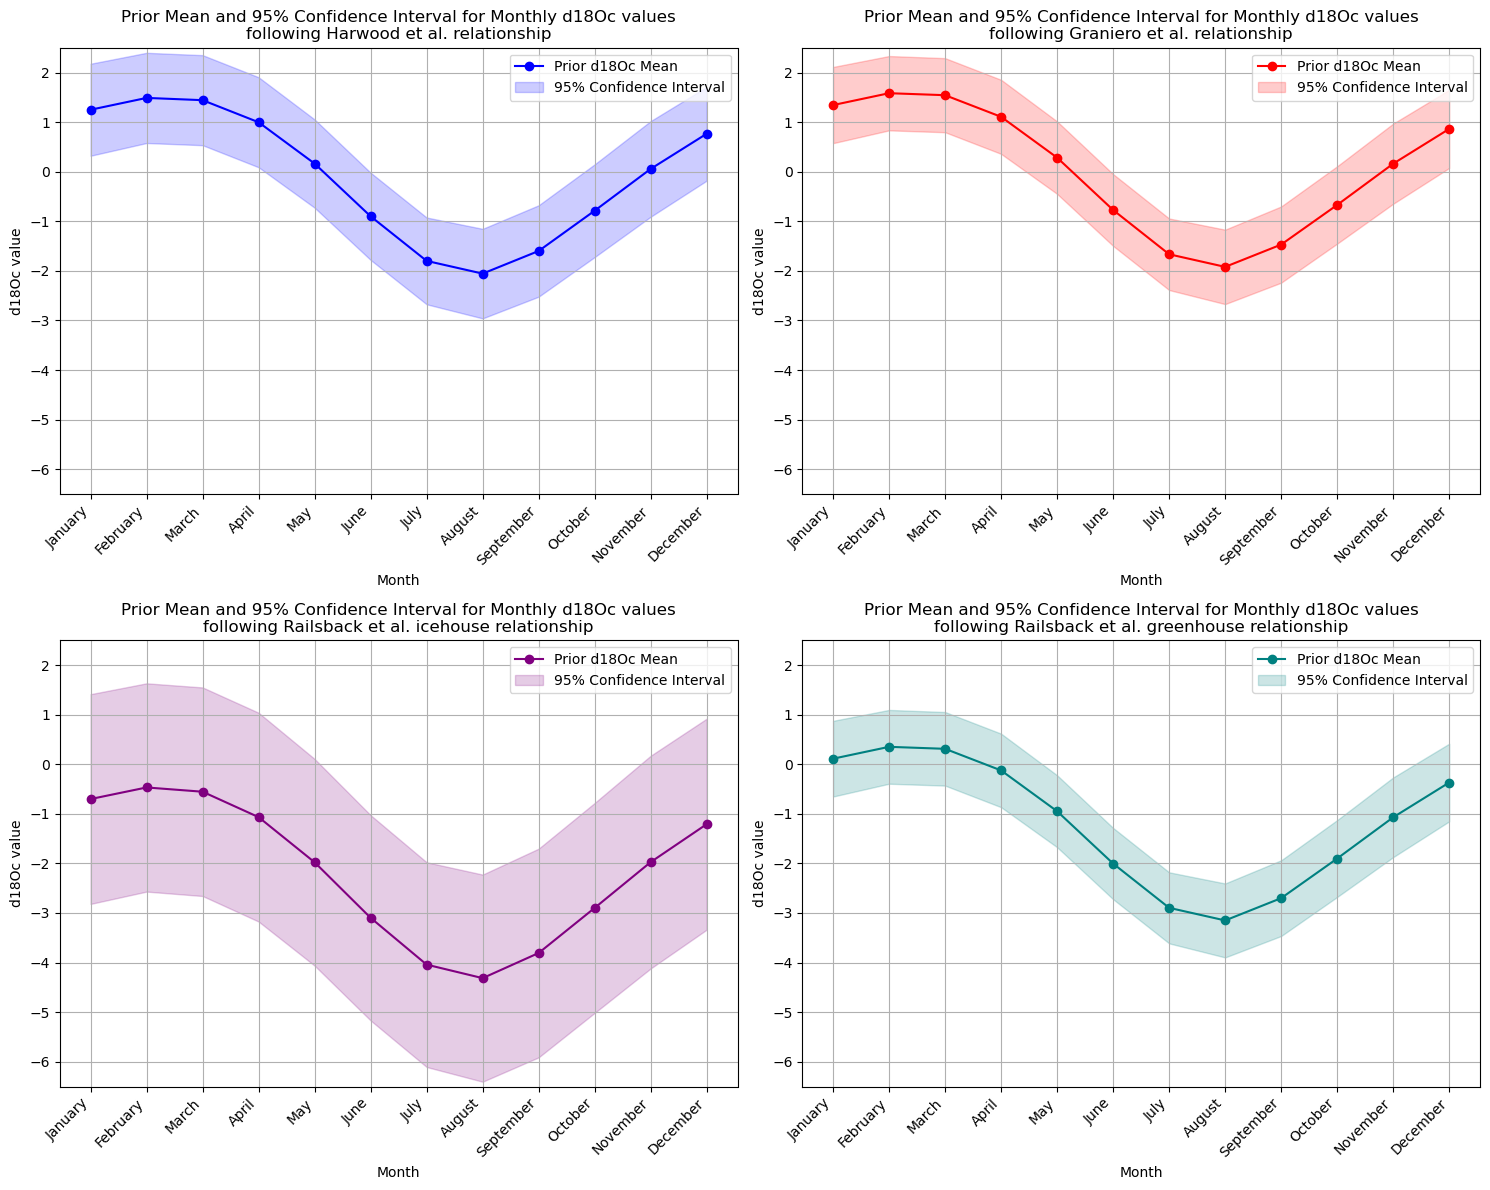

In [14]:
# Plot monthly prior distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust the figure to have 2x2 grid

# Plot the prior distribution for d18Oc based on Harwood et al. (2007) relationship
axes[0, 0].plot(months_scale, mu_prior_d18Oc_Harwood_monthly, label='Prior d18Oc Mean', color='b', marker='o')
axes[0, 0].fill_between(months_scale,
                        mu_prior_d18Oc_Harwood_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Harwood_monthly / np.sqrt(n_models_monthly),
                        mu_prior_d18Oc_Harwood_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Harwood_monthly / np.sqrt(n_models_monthly),
                        color='b', alpha=0.2, label='95% Confidence Interval')
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and 95% Confidence Interval for Monthly d18Oc values\nfollowing Harwood et al. relationship')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('d18Oc value')
axes[0, 0].set_ylim([-6.5, 2.5])  # Set y-axis limits for better comparison between plots
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot the prior distribution for d18Oc based on Graniero et al. (2006) relationship
axes[0, 1].plot(months_scale, mu_prior_d18Oc_Graniero_monthly, label='Prior d18Oc Mean', color='r', marker='o')
axes[0, 1].fill_between(months_scale,
                        mu_prior_d18Oc_Graniero_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Graniero_monthly / np.sqrt(n_models_monthly),
                        mu_prior_d18Oc_Graniero_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Graniero_monthly / np.sqrt(n_models_monthly),
                        color='r', alpha=0.2, label='95% Confidence Interval')
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Prior Mean and 95% Confidence Interval for Monthly d18Oc values\nfollowing Graniero et al. relationship')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('d18Oc value')
axes[0, 1].set_ylim([-6.5, 2.5])  # Set y-axis limits for better comparison between plots
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot the prior distribution for d18Oc based on Railsback et al. (1989) icehouse relationship
axes[1, 0].plot(months_scale, mu_prior_d18Oc_Railsback_ice_monthly, label='Prior d18Oc Mean', color='purple', marker='o')
axes[1, 0].fill_between(months_scale,
                        mu_prior_d18Oc_Railsback_ice_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Railsback_ice_monthly / np.sqrt(n_models_monthly),
                        mu_prior_d18Oc_Railsback_ice_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Railsback_ice_monthly / np.sqrt(n_models_monthly),
                        color='purple', alpha=0.2, label='95% Confidence Interval')
axes[1, 0].set_xticks(months_scale)
axes[1, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 0].set_title('Prior Mean and 95% Confidence Interval for Monthly d18Oc values\nfollowing Railsback et al. icehouse relationship')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('d18Oc value')
axes[1, 0].set_ylim([-6.5, 2.5])  # Set y-axis limits for better comparison between plots
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot the prior distribution for d18Oc based on Railsback et al. (1989) greenhouse relationship
axes[1, 1].plot(months_scale, mu_prior_d18Oc_Railsback_green_monthly, label='Prior d18Oc Mean', color='teal', marker='o')
axes[1, 1].fill_between(months_scale,
                        mu_prior_d18Oc_Railsback_green_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Railsback_green_monthly / np.sqrt(n_models_monthly),
                        mu_prior_d18Oc_Railsback_green_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Railsback_green_monthly / np.sqrt(n_models_monthly),
                        color='teal', alpha=0.2, label='95% Confidence Interval')
axes[1, 1].set_xticks(months_scale)
axes[1, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 1].set_title('Prior Mean and 95% Confidence Interval for Monthly d18Oc values\nfollowing Railsback et al. greenhouse relationship')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('d18Oc value')
axes[1, 1].set_ylim([-6.5, 2.5])  # Set y-axis limits for better comparison between plots
axes[1, 1].legend()
axes[1, 1].grid(True)

# Update the layout and show the plot
plt.tight_layout()
plt.show()

## Calculate the monthly covariance matrix for D47 values of SST and SAT, d18Oc and precipitation

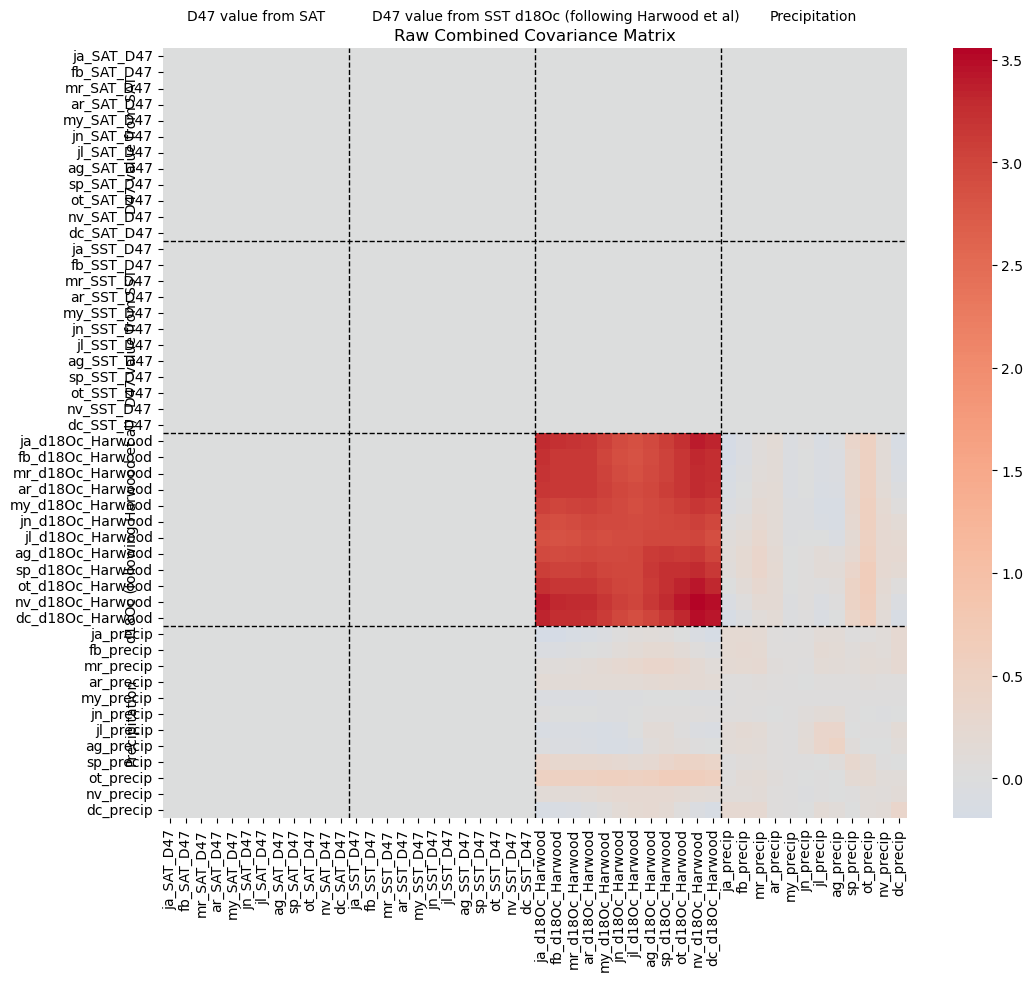

In [15]:
# Define column names for SAT, SST, d18Oc, and precipitation
SAT_D47_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_columns_monthly = [f"{month}_SST_D47" for month in months]
precip_columns_monthly = [f"{month}_precip" for month in months]
# Separate out d18Oc values calculated using different SSS-d18Ow relationships
d18Oc_Harwood_columns_monthly = [f"{month}_d18Oc_Harwood" for month in months]
d18Oc_Graniero_columns_monthly = [f"{month}_d18Oc_Graniero" for month in months]
d18Oc_Railsback_ice_columns_monthly = [f"{month}_d18Oc_Railsback_ice" for month in months]
d18Oc_Railsback_green_columns_monthly = [f"{month}_d18Oc_Railsback_green" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_monthly_Harwood = PlioMIP[SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_Harwood_columns_monthly + precip_columns_monthly]
combined_data_monthly_Graniero = PlioMIP[SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_Graniero_columns_monthly + precip_columns_monthly]
combined_data_monthly_Railsback_ice = PlioMIP[SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_Railsback_ice_columns_monthly + precip_columns_monthly]
combined_data_monthly_Railsback_green = PlioMIP[SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_Railsback_green_columns_monthly + precip_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_monthly_Harwood = np.cov(combined_data_monthly_Harwood.dropna(), rowvar=False)
cov_combined_monthly_Graniero = np.cov(combined_data_monthly_Graniero.dropna(), rowvar=False)
cov_combined_monthly_Railsback_ice = np.cov(combined_data_monthly_Railsback_ice.dropna(), rowvar=False)
cov_combined_monthly_Railsback_green = np.cov(combined_data_monthly_Railsback_green.dropna(), rowvar=False)

# Plot the heatmap of the raw combined covariance matrix (following Harwood et al., as example)
plt.figure(figsize=(12, 10))
sns.heatmap(
    cov_combined_monthly_Harwood,  # Use the raw covariance matrix
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_Harwood_columns_monthly + precip_columns_monthly,
    yticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_Harwood_columns_monthly + precip_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly) / 2, -2, 'd18Oc (following Harwood et al)', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly) + len(precip_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-2, len(SAT_D47_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly) / 2, 'd18Oc (following Harwood et al)', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly) + len(precip_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Raw Combined Covariance Matrix")
plt.show()

## Plot normalized monthly covariance matrix between D47 values of SST and SAT, d18Oc and precipitation

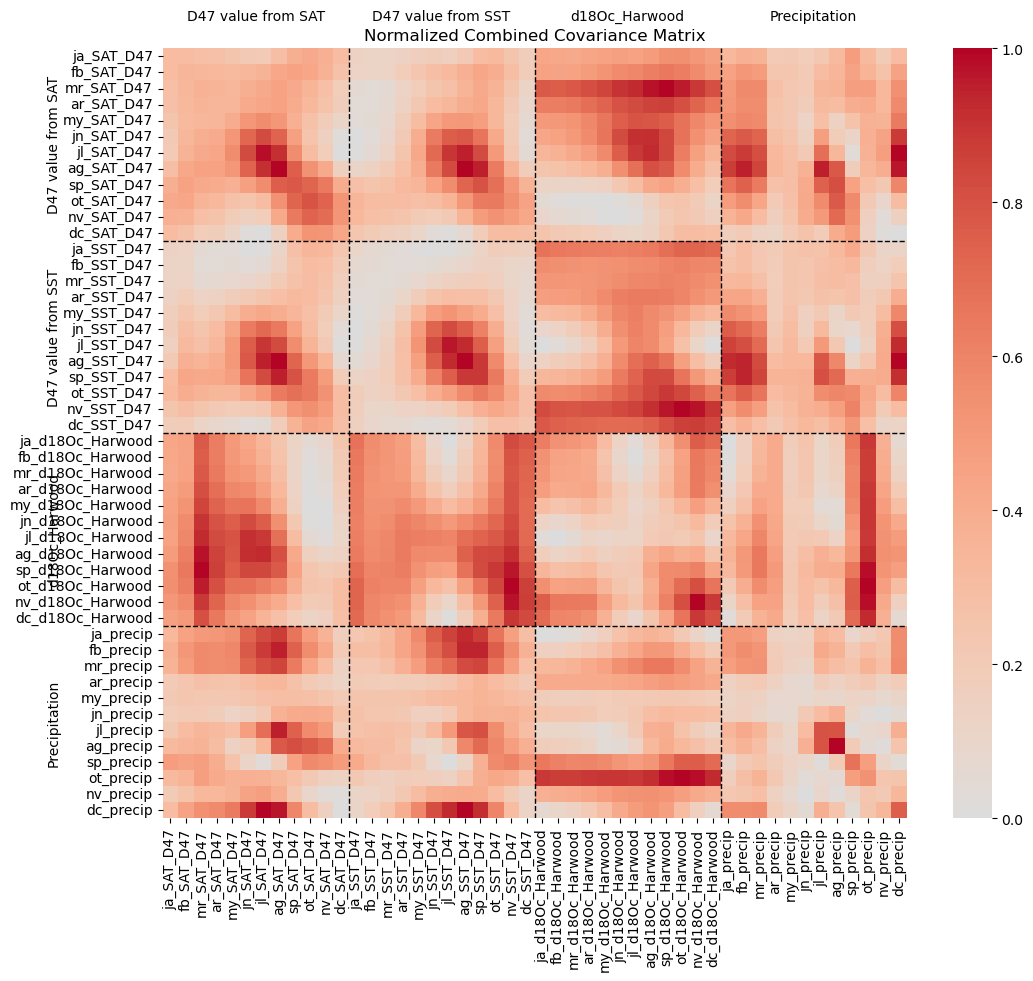

In [16]:
# Normalize each submatrix independently for better visualization
def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    return (matrix - min_val) / (max_val - min_val)

# Extract the relevant columns for SAT, SST D47, d18Oc (following Harwood), and precipitation
SAT_D47_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_Harwood_columns_monthly = [f"{month}_d18Oc_Harwood" for month in months]
precip_columns_monthly = [f"{month}_precip" for month in months]


# Extract the covariance matrices for SAT D47, SST D47, d18Oc_Harwood, and precipitation
cov_SAT_D47_monthly = cov_combined_monthly_Harwood[:len(months), :len(months)]
cov_SST_D47_monthly = cov_combined_monthly_Harwood[len(months):2*len(months), len(months):2*len(months)]
cov_d18Oc_Harwood_monthly = cov_combined_monthly_Harwood[2*len(months):3*len(months), 2*len(months):3*len(months)]
cov_precip_monthly = cov_combined_monthly_Harwood[3*len(months):, 3*len(months):]

# Extract the cross-covariance matrices
cross_cov_SAT_SST_D47_monthly = cov_combined_monthly_Harwood[:len(months), len(months):2*len(months)]
cross_cov_SAT_d18Oc_Harwood_monthly = cov_combined_monthly_Harwood[:len(months), 2*len(months):3*len(months)]
cross_cov_SAT_precip_monthly = cov_combined_monthly_Harwood[:len(months), 3*len(months):]
cross_cov_SST_d18Oc_Harwood_monthly = cov_combined_monthly_Harwood[len(months):2*len(months), 2*len(months):3*len(months)]
cross_cov_SST_precip_monthly = cov_combined_monthly_Harwood[len(months):2*len(months), 3*len(months):]
cross_cov_d18Oc_Harwood_precip_monthly = cov_combined_monthly_Harwood[2*len(months):3*len(months), 3*len(months):]

# Normalize each submatrix
normalized_cov_SAT_D47_monthly = normalize_matrix(cov_SAT_D47_monthly)
normalized_cov_SST_D47_monthly = normalize_matrix(cov_SST_D47_monthly)
normalized_cov_d18Oc_Harwood_monthly = normalize_matrix(cov_d18Oc_Harwood_monthly)
normalized_cov_precip_monthly = normalize_matrix(cov_precip_monthly)

# Normalize each cross-covariance matrix
normalized_cross_cov_SAT_SST_D47_monthly = normalize_matrix(cross_cov_SAT_SST_D47_monthly)
normalized_cross_cov_SAT_d18Oc_Harwood_monthly = normalize_matrix(cross_cov_SAT_d18Oc_Harwood_monthly)
normalized_cross_cov_SAT_precip_monthly = normalize_matrix(cross_cov_SAT_precip_monthly)
normalized_cross_cov_SST_d18Oc_Harwood_monthly = normalize_matrix(cross_cov_SST_d18Oc_Harwood_monthly)
normalized_cross_cov_SST_precip_monthly = normalize_matrix(cross_cov_SST_precip_monthly)
normalized_cross_cov_d18Oc_Harwood_precip_monthly = normalize_matrix(cross_cov_d18Oc_Harwood_precip_monthly)

# Combine the normalized submatrices into a single normalized covariance matrix
normalized_cov_combined_monthly_Harwood = np.block([
    [normalized_cov_SAT_D47_monthly, normalized_cross_cov_SAT_SST_D47_monthly, normalized_cross_cov_SAT_d18Oc_Harwood_monthly, normalized_cross_cov_SAT_precip_monthly],
    [normalized_cross_cov_SAT_SST_D47_monthly.T, normalized_cov_SST_D47_monthly, normalized_cross_cov_SST_d18Oc_Harwood_monthly, normalized_cross_cov_SST_precip_monthly],
    [normalized_cross_cov_SAT_d18Oc_Harwood_monthly.T, normalized_cross_cov_SST_d18Oc_Harwood_monthly.T, normalized_cov_d18Oc_Harwood_monthly, normalized_cross_cov_d18Oc_Harwood_precip_monthly],
    [normalized_cross_cov_SAT_precip_monthly.T, normalized_cross_cov_SST_precip_monthly.T, normalized_cross_cov_d18Oc_Harwood_precip_monthly.T, normalized_cov_precip_monthly]
])

# Plot the heatmap of the normalized combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_cov_combined_monthly_Harwood,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_Harwood_columns_monthly + precip_columns_monthly,
    yticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_Harwood_columns_monthly + precip_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly) / 2, -2, 'd18Oc_Harwood', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly) + len(precip_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-7, len(SAT_D47_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly) / 2, 'd18Oc_Harwood', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_Harwood_columns_monthly) + len(precip_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Normalized Combined Covariance Matrix")
plt.show()

## Create combined monthly state vector in D47 and d18Oc domain

In [17]:
# Combine the prior means of D47 and SAT into a single state vector
mu_prior_monthly_combined_Harwood = np.concatenate((mu_prior_SST_D47_monthly, mu_prior_SAT_D47_monthly, mu_prior_d18Oc_Harwood_monthly, mu_prior_precip_monthly))
mu_prior_monthly_combined_Graniero = np.concatenate((mu_prior_SST_D47_monthly, mu_prior_SAT_D47_monthly, mu_prior_d18Oc_Graniero_monthly, mu_prior_precip_monthly))
mu_prior_monthly_combined_Railsback_ice = np.concatenate((mu_prior_SST_D47_monthly, mu_prior_SAT_D47_monthly, mu_prior_d18Oc_Railsback_ice_monthly, mu_prior_precip_monthly))
mu_prior_monthly_combined_Railsback_green = np.concatenate((mu_prior_SST_D47_monthly, mu_prior_SAT_D47_monthly, mu_prior_d18Oc_Railsback_green_monthly, mu_prior_precip_monthly))

# Combine the covariance matrices of D47 values of SST and SAT, including the cross-covariance
cov_prior_monthly_combined_Harwood = cov_combined_monthly_Harwood.copy()
cov_prior_monthly_combined_Graniero = cov_combined_monthly_Graniero.copy()
cov_prior_monthly_combined_Railsback_ice = cov_combined_monthly_Railsback_ice.copy()
cov_prior_monthly_combined_Railsback_green = cov_combined_monthly_Railsback_green.copy()


# OBSERVATIONS
## Load clumped data for updating
### Seasonal data from PWP paper

In [18]:
# Load seasonal measurements and format them into a dictionary
# This is precompiled seasonal data per specimen and therefore does not come with a time uncertainty
PWP_data_seasonal = pd.read_csv('PWP case/PWP_proxy_data_seasonal.csv') # Load the data for this assignment into Python and in the Jupyter environment.
PWP_data_seasonal_dict = PWP_data_seasonal.to_dict('records') # Convert to dictionary with column headers as keys

# Add an entry for the time uncertainty (which is always zero in this case, because data is already aggregated seasonally)
for record in PWP_data_seasonal_dict:
    record["Season_err"] = 0

### Monthly and seasonal data calculated from ShellChron outcomes

In [19]:
# Load measurements and format them into a dictionary
# These are the actual individual D47 measurements and ShellChron outcomes and thus come with a time uncertainty which can be propagated.
PWP_data = pd.read_csv('PWP case/PWP_proxy_data_months.csv') # Load the data for this assignment into Python and in the Jupyter environment.
PWP_data_dict = PWP_data.to_dict('records') # Convert to dictionary with column headers as keys

# Process the ShellChron_DOY_err field and create a new entry for months
for record in PWP_data_dict:
    # Handle missing values and convert from days to months and seasons
    shell_chron_doy_err = record.get("ShellChron_DOY_err", np.nan)  # Get value, default to NaN if missing
    if pd.isna(shell_chron_doy_err):  # Check if the value is NaN
        record["ShellChron_Month_err"] = 0  # Set the new entry to 0 if missing
        record["ShellChron_Season_err"] = 0  # Set the new entry to 0 if missing
        record["ShellChron_no_err"] = 0  # Add a new entry for no error
    else:
        record["ShellChron_Month_err"] = shell_chron_doy_err / 365 * 12  # Convert days to months
        record["ShellChron_Season_err"] = shell_chron_doy_err / 365 * 4  # Convert days to seasons
        record["ShellChron_no_err"] = 0  # Add a new entry for no error
    
    # Add the month_score2 and season_score field based on the ShellChron_DOY field
    ShellChron_DOY = record.get("ShellChron_DOY_rotated", np.nan)  # Get the ShellChron day of the year value
    if not pd.isna(ShellChron_DOY):  # Check if the ShellChron value is not NaN
        record["month_score2"] = ShellChron_DOY / 365 * 12  # Convert DOY value to month_score
        record["season_score"] = ShellChron_DOY / 365 * 4  # Convert DOY value to season_score

## Prepare measurement and observation matrices

### Define a wrapped normal distribution to allow uncertainty in the time domain to flow around the year

In [20]:
# Function to calculate wrapped normal distribution weights
def wrapped_normal_pdf(x, mean, sd, num_bins):
    # Calculate the normal PDF for each bin
    pdf = stats.norm.pdf(x, loc = mean, scale = sd)
    # Wrap around the bins
    for i in range(1, num_bins):
        pdf += stats.norm.pdf(x + i * num_bins, loc = mean, scale = sd)
        pdf += stats.norm.pdf(x - i * num_bins, loc = mean, scale = sd)
    # Normalize the weights to ensure the sum equals 1
    pdf /= pdf.sum()
    return pdf

## Observations on monthly scale

### Measurement matrix for monthly aggregated D47 values

In [21]:
# Initialize dictionaries to store aggregated measurements and uncertainties per month
D47_measurements_monthly = {month: [] for month in month_names}
d18Oc_measurements_monthly = {month: [] for month in month_names}
D47_measurement_uncertainties_monthly = {month: [] for month in month_names}
d18Oc_measurement_uncertainties_monthly = {month: [] for month in month_names}

# Aggregate measurements and uncertainties per month
for measurement in PWP_data_dict:
    if not pd.isna(measurement["D47_corrETF_strict"]):
        month_index = int(measurement["month_score2"])
        D47_measurements_monthly[month_names[month_index]].append(measurement["D47_corrETF_strict"])
        D47_measurement_uncertainties_monthly[month_names[month_index]].append(measurement["D47_sd_ext"] ** 2)
    if not pd.isna(measurement["Final_d18O"]):
        month_index = int(measurement["month_score2"])
        d18Oc_measurements_monthly[month_names[month_index]].append(measurement["Final_d18O"])
        d18Oc_measurement_uncertainties_monthly[month_names[month_index]].append(measurement["d18O_sd_ext"] ** 2)

# Calculate weighted mean and propagated uncertainty for each month
D47_aggregated_measurements_monthly = []
d18Oc_aggregated_measurements_monthly = []
D47_aggregated_uncertainties_monthly = []
d18Oc_aggregated_uncertainties_monthly = []

for month in month_names:
    if D47_measurements_monthly[month]:
        weights = 1 / np.array(D47_measurement_uncertainties_monthly[month])
        weighted_mean = np.sum(np.array(D47_measurements_monthly[month]) * weights) / np.sum(weights)
        measurement_variance = np.var(D47_measurements_monthly[month], ddof=1)
        propagated_uncertainty = np.sqrt(1 / np.sum(weights) + measurement_variance)
        D47_aggregated_measurements_monthly.append(weighted_mean)
        D47_aggregated_uncertainties_monthly.append(propagated_uncertainty ** 2)
    if d18Oc_measurements_monthly[month]:
        weights = 1 / np.array(d18Oc_measurement_uncertainties_monthly[month])
        weighted_mean = np.sum(np.array(d18Oc_measurements_monthly[month]) * weights) / np.sum(weights)
        measurement_variance = np.var(d18Oc_measurements_monthly[month], ddof=1)
        propagated_uncertainty = np.sqrt(1 / np.sum(weights) + measurement_variance)
        d18Oc_aggregated_measurements_monthly.append(weighted_mean)
        d18Oc_aggregated_uncertainties_monthly.append(propagated_uncertainty ** 2)

# OPTIONAL: Lower boundary d18Oc variance at 0.01 (equivalent to 0.1 per mil measurement uncertainty)
d18Oc_aggregated_uncertainties_monthly = [max(uncertainty, 0.01) for uncertainty in d18Oc_aggregated_uncertainties_monthly]

# Create the measurement matrix Z
Z_monthly_aggregated = np.array(D47_aggregated_measurements_monthly + d18Oc_aggregated_measurements_monthly).reshape(-1, 1)

# Create the measurement uncertainty matrix R (diagonal matrix)
R_monthly_aggregated = np.diag(D47_aggregated_uncertainties_monthly + d18Oc_aggregated_uncertainties_monthly)  # Diagonal matrix of measurement uncertainties

print("Z_monthly_aggregated:", Z_monthly_aggregated)
print("R_monthly_aggregated:", R_monthly_aggregated)

Z_monthly_aggregated: [[0.6286965 ]
 [0.66196597]
 [0.63593138]
 [0.63587406]
 [0.6385765 ]
 [0.63610532]
 [0.64055775]
 [0.58409635]
 [0.64753068]
 [0.65564679]
 [0.62024339]
 [0.63756647]
 [1.92069861]
 [1.77654022]
 [1.38742522]
 [1.20859978]
 [1.52259534]
 [1.52992939]
 [1.52807461]
 [1.50322068]
 [1.44285092]
 [1.47484531]
 [1.83296327]
 [1.88853586]]
R_monthly_aggregated: [[0.00161332 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.00296031 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.00213726 0.         0.         0.
  0.         0.         0.         0.         0.         0.
 

### Observation matrix for monthly aggregated D47 data

In [22]:
# Create the observation matrix H for monthly aggregated data

# Define the number of seasons or months
num_months = 12

# Number of monthly aggregated measurements
N_measurements_monthly_aggregated = len(Z_monthly_aggregated)
H_monthly_aggregated = np.zeros((N_measurements_monthly_aggregated, len(mu_prior_monthly_combined_Harwood)))

# Fill the observation matrix H with ones at the positions corresponding to the measurements
for i, measurement in enumerate(Z_monthly_aggregated):
    if i < N_measurements_monthly_aggregated // 2:
        time_index = i % num_months  # Ensure the index is within the range of months
        H_monthly_aggregated[i, time_index] = 1
    else:
        time_index = i % num_months
        H_monthly_aggregated[i, time_index + 24] = 1

print(H_monthly_aggregated)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# DEFINE UPDATING FUNCTIONS

## Create updating function (Kalman filter)
- Include updating of additional variables (SAT and precipitation) through cross-covariance with measured variables (D47_SST and d18Oc)
- Use block updating

Input:
- Prior means (mu_prior)
- Prior covariance matrix (P)
- Observation matrix (H)
- Measurement matrix (Z)
- Uncertainty matrix (R)

Output:
- Posterior means (mu_post)
- Posterior covariance matrix (P_post)

In [23]:
def kalman_update_block(
    mu_prior: np.ndarray,
    cov_prior: np.ndarray,
    Z: np.ndarray,
    R: np.ndarray,
    H: np.ndarray,
    debug_print: bool = False
):
    """
    Perform a Kalman update step for a block of observations.

    Parameters:
    mu_prior (np.ndarray): The prior mean vector.
    cov_prior (np.ndarray): The prior covariance matrix.
    Z (np.ndarray): The measurement matrix.
    R (np.ndarray): The measurement noise covariance matrix.
    H (np.ndarray): The observation matrix.
    debug_print (bool): If True, print debug statements.

    Returns:
    mu_posterior (np.ndarray): The posterior mean vector.
    cov_posterior (np.ndarray): The posterior covariance matrix.
    """
    if debug_print:
        # Print shapes of key variables for debugging
        print("Shape of cov_prior:", cov_prior.shape)
        print("Shape of H:", H.shape)
        print("Shape of R:", R.shape)
        print("Shape of mu_prior:", mu_prior.shape)
        print("Shape of Z:", Z.shape)

    # Compute the Kalman gain
    K = cov_prior @ H.T @ np.linalg.inv(H @ cov_prior @ H.T + R)
    if debug_print:
        print("Shape of K:", K.shape)

    # In-between steps for debugging
    Y_hat = H @ mu_prior  # Compute the predicted observation
    if debug_print:
        print("Shape of Y_hat:", Y_hat.shape)
    innovation = Z - Y_hat.reshape(-1, 1)  # Compute the innovation
    if debug_print:
        print("Shape of innovation:", innovation.shape)
    kalman_gain = K @ innovation  # Compute the Kalman gain
    if debug_print:
        print("Shape of kalman_gain:", kalman_gain.shape)

    # Update the posterior mean estimate
    mu_posterior = mu_prior + kalman_gain.flatten()

    # Update the posterior covariance estimate
    cov_posterior = cov_prior - K @ H @ cov_prior

    return mu_posterior, cov_posterior


## Create function to track the statistics of the likelihood (combining just the reconstruction data)

In [24]:
# UPDATED UPDATING SCRIPT TO ACCOMMODATE MULTIPLE VARIABLES

# Create function to keep track of the likelihood statistics and data

# Suppress FutureWarning
# warnings.simplefilter(action = 'ignore', category = FutureWarning)

def likelihood_statistics_multi(
    weighted_sum,
    effective_weights_total,
    n_update,
    data_library,
    measurement,
    timestamp,
    timestamp_sd,
    Variable_names = ["Variable_name1", "Variable_name2"],
    Variable_names_SDs = ["Variable_name_SD1", "Variable_name_SD2"]
):
    """
    Incrementally updates the likelihood statistics for seasonal data.

    Parameters:
    - weighted_sum: list
        List tracking the mean times the effective weight for each time bin and variable.
    - effective_weights_total: list
        List tracking the sum of effective weights for each time bin and variable.
    - n_update: list
        List tracking the number of datapoints for each time bin and variable.
    - data_library: dict
        Dictionary tracking individual data points and their uncertainties.
    - measurement: dict
        A single measurement containing data on multiple variables.
    - timestamp: str
        Key in the measurement dictionary for the timestamp (0-based index).
    - timestamp_sd: float
        Standard deviation of uncertainty in the timestamp.
    - Variable_name: list of str
        Key in the measurement dictionary for the variables (e.g. d18Oc, D47).
    - Variable_name_SD: list of str
        Key in the measurement dictionary for the standard deviation on the variables (e.g. d18Oc, D47).
    """
    # Check if at least one combination of variable name and its SD is present in the measurement
    found = False
    for var_name, var_sd_name in zip(Variable_names, Variable_names_SDs):
        if var_name in measurement and var_sd_name in measurement:
            found = True
            break

    if timestamp in measurement and found:
        # Extract the time and data values from the measurement
        time = measurement[timestamp]
        time_sd = measurement[timestamp_sd]
        # Loop through all variable/SD pairs
        for var_name, var_sd_name in zip(Variable_names, Variable_names_SDs):
            if var_name in measurement and var_sd_name in measurement:
                data_val = measurement[var_name]
                data_sd = measurement[var_sd_name]
                
                # Check if the data is valid
                if not np.isnan(data_val) and not np.isnan(data_sd):
                    # Calculate the weight (inverse of variance)
                    weight = 1 / (data_sd ** 2)

                    # Determine the number of bins
                    num_bins_seasonal = int(len(weighted_sum) / len(Variable_names))
                    # Ensure num_bins_seasonal is an integer
                    bin_indices = np.arange(num_bins_seasonal, dtype=np.float64)

                    # Calculate the probability density for each bin
                    if time_sd == 0:  # Catch cases where the time uncertainty is zero (or unknown)
                        probabilities = np.zeros(num_bins_seasonal, dtype=np.float64)
                        bin_index = int(time) % num_bins_seasonal  # Ensure the bin index is within range
                        probabilities[bin_index] = 1  # Set the probability to 1 for the correct bin
                    else:
                        probabilities = stats.norm.pdf(bin_indices, loc=time, scale=time_sd)  # For non-zero time uncertainty, use a normal distribution
                        probabilities /= probabilities.sum()  # Normalize to ensure the sum of probabilities is 1

                    for i, prob in enumerate(probabilities):  # Loop over all possible bin numbers in the probability vector
                        bin_index = i % num_bins_seasonal  # Wrap around to the first bin if it overflows

                        # Update the weighted sums and sample count
                        effective_weight = weight * prob
                        var_idx = Variable_names.index(var_name)  # Find the index of the variable
                        idx = int(var_idx * num_bins_seasonal + bin_index)  # Unique index for (variable, bin)
                        if weighted_sum[idx] is None:
                            weighted_sum[idx] = 0
                            effective_weights_total[idx] = 0
                        weighted_sum[idx] = weighted_sum[idx] + data_val * effective_weight
                        effective_weights_total[idx] = effective_weights_total[idx] + effective_weight

                    # Update n_update for the correct variable and bin
                    var_idx = Variable_names.index(var_name) # Find the index of the variable
                    n_update[var_idx * num_bins_seasonal + (int(time) % num_bins_seasonal)] += 1  # update sample number per bin and variable

                    # Track individual data points and their uncertainties
                    key = (var_name, int(time)) # Store individual data points in a dictionary with (variable, time) as key
                    if key not in data_library:
                        data_library[key] = []  # Initialize the list for a new (time, var_name) pair
                    data_library[key].append((time_sd, data_val, data_sd))
    return weighted_sum, effective_weights_total, n_update, data_library # Return the updated values

# EXECUTE UPDATING FUNCTIONS - MONTHLY

## Update monthly prior with data (d18Ow conversion following Harwood)
* Data and model outcomes assembled per month
* Ignore sclero-dating uncertainty
* D47 data aggregated in monthly bins prior to assembly

In [25]:
# Update the seasonal prior with all measurements assigned to the seasons according to the ShellChron_DOY_rotated field
monthly_aggregated_Harwood_data = {} # Keep track of datapoints per season
n_update_monthly_aggregated_Harwood = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Harwood_monthly_original * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_monthly_aggregated_Harwood = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Harwood_monthly_original * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_monthly_aggregated_Harwood = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Harwood_monthly_original * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_monthly_aggregated_Harwood = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Harwood_monthly_original * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_monthly_aggregated_Harwood = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Harwood_monthly_original * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47_corrETF_strict", "Final_d18O"] # List of variable names which are updated
var_SD_names = ["D47_sd_ext", "d18O_sd_ext"] # List of names of variable uncertainties which are updated

# Update the prior with seasonal data using the Kalman filter in block updating form
mu_post_monthly_aggregated_Harwood, cov_post_monthly_aggregated_Harwood = kalman_update_block(
    mu_prior_monthly_combined_Harwood,
    cov_prior_monthly_combined_Harwood,
    Z_monthly_aggregated,
    R_monthly_aggregated,
    H_monthly_aggregated
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_monthly_aggregated_Harwood = mu_post_monthly_aggregated_Harwood[:len(mu_prior_SST_D47_monthly)]
mu_post_SAT_D47_monthly_aggregated_Harwood = mu_post_monthly_aggregated_Harwood[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
mu_post_d18Oc_Harwood_monthly_aggregated = mu_post_monthly_aggregated_Harwood[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
mu_post_precip_monthly_aggregated_Harwood = mu_post_monthly_aggregated_Harwood[3*len(mu_prior_d18Oc_Harwood_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_monthly_aggregated_Harwood = cov_post_monthly_aggregated_Harwood[:len(mu_prior_SST_D47_monthly), :len(mu_prior_SST_D47_monthly)]
cov_post_SAT_D47_monthly_aggregated_Harwood = cov_post_monthly_aggregated_Harwood[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly), len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
cov_post_d18Oc_Harwood_monthly_aggregated = cov_post_monthly_aggregated_Harwood[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly), 2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
cov_post_precip_monthly_aggregated_Harwood = cov_post_monthly_aggregated_Harwood[3*len(mu_prior_d18Oc_Harwood_monthly):, 3*len(mu_prior_d18Oc_Harwood_monthly):]

for measurement in PWP_data_dict: # Loop over measurements
    # Track and update likelihood statistics
    weighted_sum_monthly_aggregated_Harwood, effective_weights_total_monthly_aggregated_Harwood, n_update_monthly_aggregated_Harwood, monthly_aggregated_Harwood_data = likelihood_statistics_multi(
        weighted_sum_monthly_aggregated_Harwood,
        effective_weights_total_monthly_aggregated_Harwood,
        n_update_monthly_aggregated_Harwood,
        monthly_aggregated_Harwood_data,
        measurement,
        timestamp = "month_score2",
        timestamp_sd = "ShellChron_no_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_monthly_aggregated_Harwood to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_monthly_aggregated_Harwood to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_monthly = int(len(weighted_sum_monthly_aggregated_Harwood) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_monthly):
        idx = var_idx * num_bins_monthly + bin_idx
        if effective_weights_total_monthly_aggregated_Harwood[idx] is not None and effective_weights_total_monthly_aggregated_Harwood[idx] != 0:
            mu_likelihood_monthly_aggregated_Harwood[idx] = weighted_sum_monthly_aggregated_Harwood[idx] / effective_weights_total_monthly_aggregated_Harwood[idx]
            std_likelihood_monthly_aggregated_Harwood[idx] = np.sqrt(1 / effective_weights_total_monthly_aggregated_Harwood[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_monthly_aggregated_Harwood[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_monthly_aggregated_Harwood[idx]}")
        print(f"    Number of Data Points: {n_update_monthly_aggregated_Harwood[idx]}")
    print()

print("Original Prior Mean SST-D47 Seasonal:\n", mu_prior_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 Seasonal:\n", mu_post_SST_D47_monthly_aggregated_Harwood)
print("Updated Posterior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Harwood)))
print("Original Prior Mean SAT-D47 Seasonal:\n", mu_prior_SAT_D47_monthly_original)
print("Original Prior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SAT_D47_monthly_original)))
print("Updated Posterior Mean SAT-D47 Seasonal:\n", mu_post_SAT_D47_monthly_aggregated_Harwood)
print("Updated Posterior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_Harwood)))
print("Original Prior Mean d18Oc Seasonal:\n", mu_prior_d18Oc_Harwood_monthly_original)
print("Original Prior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_prior_d18Oc_Harwood_monthly_original)))
print("Updated Posterior Mean d18Oc Seasonal:\n", mu_post_d18Oc_Harwood_monthly_aggregated)
print("Updated Posterior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_post_d18Oc_Harwood_monthly_aggregated)))
print("Original Prior Mean precipitation Seasonal:\n", mu_prior_precip_monthly_original)
print("Original Prior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_prior_precip_monthly_original)))
print("Updated Posterior Mean precipitation Seasonal:\n", mu_post_precip_monthly_aggregated_Harwood)
print("Updated Posterior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Harwood)))

Likelihood statistics:
Results for variable: D47_corrETF_strict
  Bin 1:
    Weighted Average: 0.6286965046662804
    Aggregated Uncertainty: 0.006172172468534013
    Number of Data Points: 41.0
  Bin 2:
    Weighted Average: 0.6619659675289109
    Aggregated Uncertainty: 0.005702205186276009
    Number of Data Points: 50.0
  Bin 3:
    Weighted Average: 0.6359313809752828
    Aggregated Uncertainty: 0.005962213370555013
    Number of Data Points: 47.0
  Bin 4:
    Weighted Average: 0.635874055245299
    Aggregated Uncertainty: 0.004533472087358248
    Number of Data Points: 77.0
  Bin 5:
    Weighted Average: 0.6385765019088617
    Aggregated Uncertainty: 0.005970373422008295
    Number of Data Points: 46.0
  Bin 6:
    Weighted Average: 0.6361053169591214
    Aggregated Uncertainty: 0.006784491839417968
    Number of Data Points: 40.0
  Bin 7:
    Weighted Average: 0.6405577455241105
    Aggregated Uncertainty: 0.005527388083791424
    Number of Data Points: 51.0
  Bin 8:
    Weighte

### Plot monthly posterior without sclero-dating uncertainty in D47 domain

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


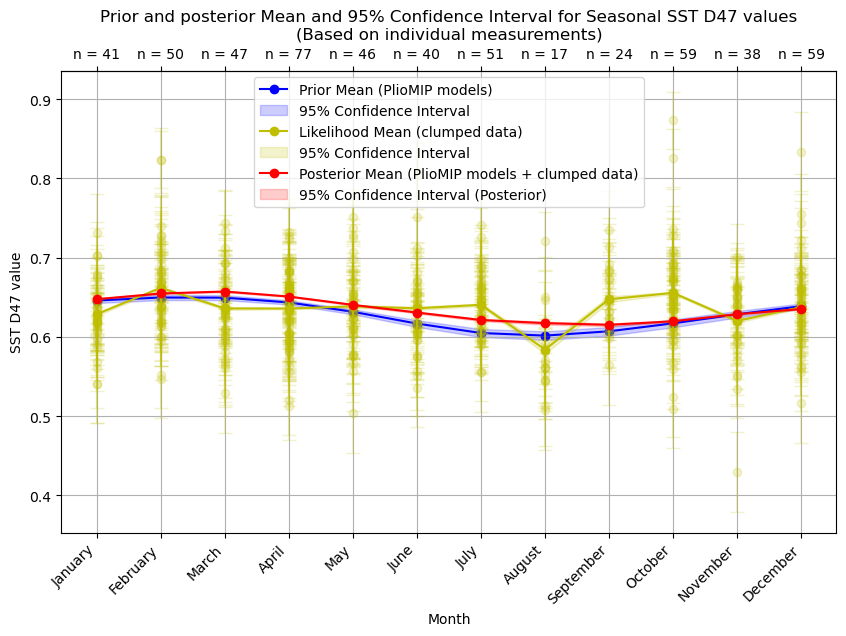

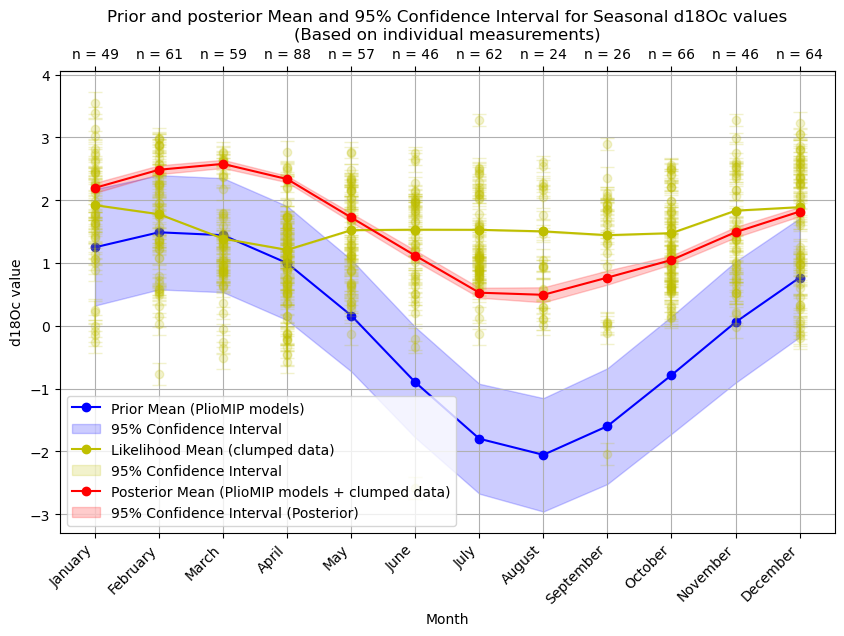

In [26]:
# --- D47 ---

# Plot the updated seasonal posterior for SST_D47
std_post_SST_D47_monthly_aggregated_Harwood = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Harwood))
std_prior_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_SST_D47_monthly_original))
var_start_D47_monthly = var_names.index("D47_corrETF_strict") * num_bins_monthly # Determine the start index for the D47 variable
var_end_D47_monthly = var_start_D47_monthly + num_bins_monthly # Determine the end index for the D47 variable
n_update_monthly_aggregated_Harwood_D47 = n_update_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_SST_D47_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(months_scale, mu_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Harwood_D47) * std_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_Harwood_D47),
    mu_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Harwood_D47) * std_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_Harwood_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], yerr=measurement["D47_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_Harwood_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_SST_D47_monthly_aggregated_Harwood, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_Harwood - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Harwood_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_Harwood / np.sqrt(n_update_monthly_aggregated_Harwood_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated_Harwood + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Harwood_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_Harwood / np.sqrt(n_update_monthly_aggregated_Harwood_D47 + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal SST D47 values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated seasonal posterior for d18Oc
std_post_d18Oc_monthly_aggregated_Harwood = np.sqrt(np.diag(cov_post_d18Oc_Harwood_monthly_aggregated))
std_prior_d18Oc_Harwood_monthly_original = np.sqrt(np.diag(cov_prior_d18Oc_Harwood_monthly_original))
var_start_d18Oc_monthly = var_names.index("Final_d18O") * num_bins_monthly # Determine the start index for the d18Oc variable
var_end_d18Oc_monthly = var_start_d18Oc_monthly + num_bins_monthly # Determine the end index for the d18Oc variable
n_update_monthly_aggregated_Harwood_d18Oc = n_update_monthly_aggregated_Harwood[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_d18Oc_Harwood_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_d18Oc_Harwood_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Harwood_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_d18Oc_Harwood_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Harwood_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(months_scale, mu_likelihood_monthly_aggregated_Harwood[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated_Harwood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Harwood_d18Oc) * std_likelihood_monthly_aggregated_Harwood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_Harwood_d18Oc),
    mu_likelihood_monthly_aggregated_Harwood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Harwood_d18Oc) * std_likelihood_monthly_aggregated_Harwood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_Harwood_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], yerr=measurement["d18O_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_Harwood_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_d18Oc_Harwood_monthly_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_d18Oc_Harwood_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Harwood_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated_Harwood / np.sqrt(n_update_monthly_aggregated_Harwood_d18Oc + n_models_monthly),
    mu_post_d18Oc_Harwood_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Harwood_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated_Harwood / np.sqrt(n_update_monthly_aggregated_Harwood_d18Oc + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal d18Oc values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()

## Update monthly prior with data (d18Ow conversion following Graniero)
* Data and model outcomes assembled per month
* Ignore sclero-dating uncertainty
* D47 data aggregated in monthly bins prior to assembly

In [27]:
# Update the seasonal prior with all measurements assigned to the seasons according to the ShellChron_DOY_rotated field
monthly_aggregated_Graniero_data = {} # Keep track of datapoints per season
n_update_monthly_aggregated_Graniero = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Graniero_monthly_original * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_monthly_aggregated_Graniero = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Graniero_monthly_original * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_monthly_aggregated_Graniero = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Graniero_monthly_original * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_monthly_aggregated_Graniero = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Graniero_monthly_original * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_monthly_aggregated_Graniero = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Graniero_monthly_original * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47_corrETF_strict", "Final_d18O"] # List of variable names which are updated
var_SD_names = ["D47_sd_ext", "d18O_sd_ext"] # List of names of variable uncertainties which are updated

# Update the prior with seasonal data using the Kalman filter in block updating form
mu_post_monthly_aggregated_Graniero, cov_post_monthly_aggregated_Graniero = kalman_update_block(
    mu_prior_monthly_combined_Graniero,
    cov_prior_monthly_combined_Graniero,
    Z_monthly_aggregated,
    R_monthly_aggregated,
    H_monthly_aggregated
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_monthly_aggregated_Graniero = mu_post_monthly_aggregated_Graniero[:len(mu_prior_SST_D47_monthly)]
mu_post_SAT_D47_monthly_aggregated_Graniero = mu_post_monthly_aggregated_Graniero[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
mu_post_d18Oc_Graniero_monthly_aggregated = mu_post_monthly_aggregated_Graniero[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
mu_post_precip_monthly_aggregated_Graniero = mu_post_monthly_aggregated_Graniero[3*len(mu_prior_d18Oc_Graniero_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_monthly_aggregated_Graniero = cov_post_monthly_aggregated_Graniero[:len(mu_prior_SST_D47_monthly), :len(mu_prior_SST_D47_monthly)]
cov_post_SAT_D47_monthly_aggregated_Graniero = cov_post_monthly_aggregated_Graniero[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly), len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
cov_post_d18Oc_Graniero_monthly_aggregated = cov_post_monthly_aggregated_Graniero[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly), 2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
cov_post_precip_monthly_aggregated_Graniero = cov_post_monthly_aggregated_Graniero[3*len(mu_prior_d18Oc_Graniero_monthly):, 3*len(mu_prior_d18Oc_Graniero_monthly):]

for measurement in PWP_data_dict: # Loop over measurements
    # Track and update likelihood statistics
    weighted_sum_monthly_aggregated_Graniero, effective_weights_total_monthly_aggregated_Graniero, n_update_monthly_aggregated_Graniero, monthly_aggregated_Graniero_data = likelihood_statistics_multi(
        weighted_sum_monthly_aggregated_Graniero,
        effective_weights_total_monthly_aggregated_Graniero,
        n_update_monthly_aggregated_Graniero,
        monthly_aggregated_Graniero_data,
        measurement,
        timestamp = "month_score2",
        timestamp_sd = "ShellChron_no_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_monthly_aggregated_Graniero to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_monthly_aggregated_Graniero to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_monthly = int(len(weighted_sum_monthly_aggregated_Graniero) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_monthly):
        idx = var_idx * num_bins_monthly + bin_idx
        if effective_weights_total_monthly_aggregated_Graniero[idx] is not None and effective_weights_total_monthly_aggregated_Graniero[idx] != 0:
            mu_likelihood_monthly_aggregated_Graniero[idx] = weighted_sum_monthly_aggregated_Graniero[idx] / effective_weights_total_monthly_aggregated_Graniero[idx]
            std_likelihood_monthly_aggregated_Graniero[idx] = np.sqrt(1 / effective_weights_total_monthly_aggregated_Graniero[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_monthly_aggregated_Graniero[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_monthly_aggregated_Graniero[idx]}")
        print(f"    Number of Data Points: {n_update_monthly_aggregated_Graniero[idx]}")
    print()

print("Original Prior Mean SST-D47 Seasonal:\n", mu_prior_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 Seasonal:\n", mu_post_SST_D47_monthly_aggregated_Graniero)
print("Updated Posterior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Graniero)))
print("Original Prior Mean SAT-D47 Seasonal:\n", mu_prior_SAT_D47_monthly_original)
print("Original Prior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SAT_D47_monthly_original)))
print("Updated Posterior Mean SAT-D47 Seasonal:\n", mu_post_SAT_D47_monthly_aggregated_Graniero)
print("Updated Posterior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_Graniero)))
print("Original Prior Mean d18Oc Seasonal:\n", mu_prior_d18Oc_Graniero_monthly_original)
print("Original Prior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_prior_d18Oc_Graniero_monthly_original)))
print("Updated Posterior Mean d18Oc Seasonal:\n", mu_post_d18Oc_Graniero_monthly_aggregated)
print("Updated Posterior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_post_d18Oc_Graniero_monthly_aggregated)))
print("Original Prior Mean precipitation Seasonal:\n", mu_prior_precip_monthly_original)
print("Original Prior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_prior_precip_monthly_original)))
print("Updated Posterior Mean precipitation Seasonal:\n", mu_post_precip_monthly_aggregated_Graniero)
print("Updated Posterior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Graniero)))

Likelihood statistics:
Results for variable: D47_corrETF_strict
  Bin 1:
    Weighted Average: 0.6286965046662804
    Aggregated Uncertainty: 0.006172172468534013
    Number of Data Points: 41.0
  Bin 2:
    Weighted Average: 0.6619659675289109
    Aggregated Uncertainty: 0.005702205186276009
    Number of Data Points: 50.0
  Bin 3:
    Weighted Average: 0.6359313809752828
    Aggregated Uncertainty: 0.005962213370555013
    Number of Data Points: 47.0
  Bin 4:
    Weighted Average: 0.635874055245299
    Aggregated Uncertainty: 0.004533472087358248
    Number of Data Points: 77.0
  Bin 5:
    Weighted Average: 0.6385765019088617
    Aggregated Uncertainty: 0.005970373422008295
    Number of Data Points: 46.0
  Bin 6:
    Weighted Average: 0.6361053169591214
    Aggregated Uncertainty: 0.006784491839417968
    Number of Data Points: 40.0
  Bin 7:
    Weighted Average: 0.6405577455241105
    Aggregated Uncertainty: 0.005527388083791424
    Number of Data Points: 51.0
  Bin 8:
    Weighte

### Plot monthly posterior without sclero-dating uncertainty in D47 domain

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


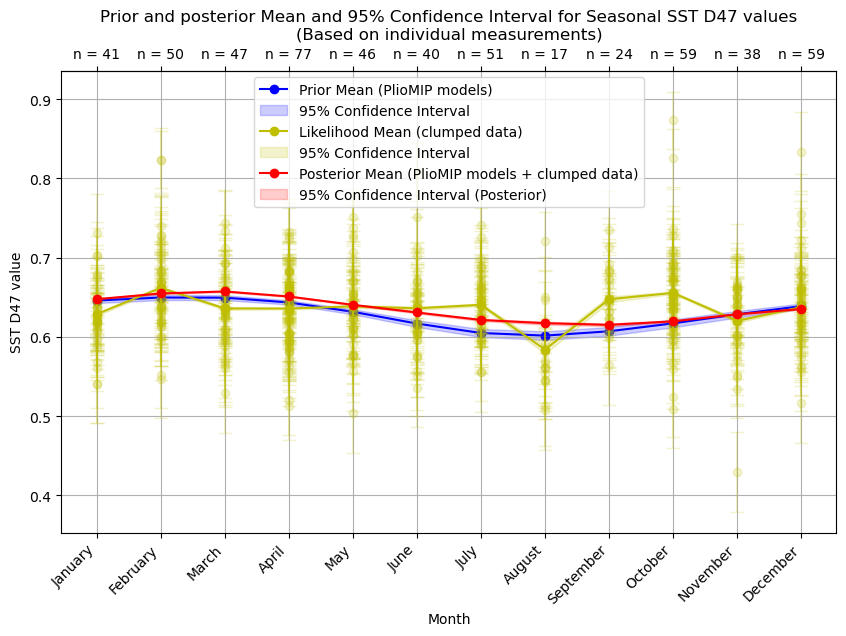

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


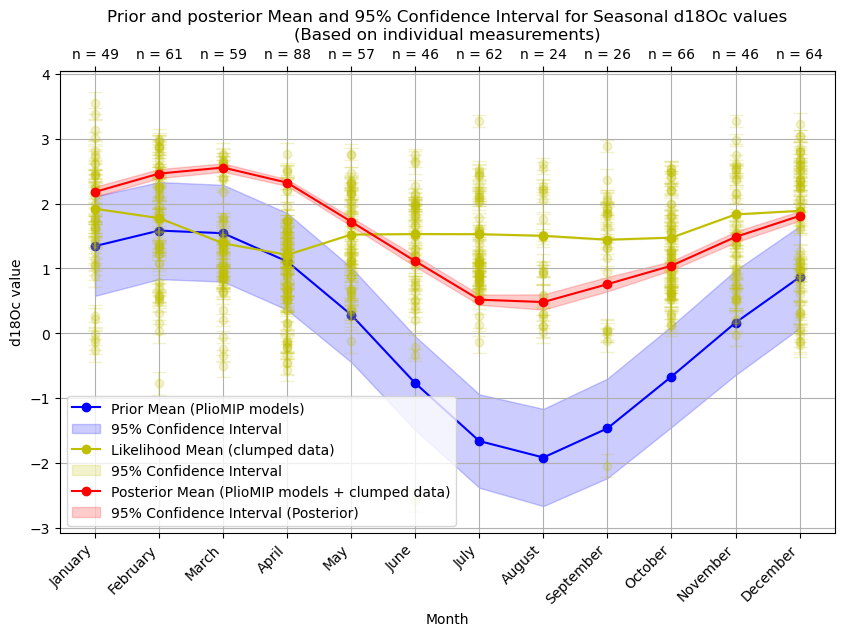

In [28]:
# --- D47 ---

# Plot the updated seasonal posterior for SST_D47
std_post_SST_D47_monthly_aggregated_Graniero = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Graniero))
std_prior_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_SST_D47_monthly_original))
var_start_D47_monthly = var_names.index("D47_corrETF_strict") * num_bins_monthly # Determine the start index for the D47 variable
var_end_D47_monthly = var_start_D47_monthly + num_bins_monthly # Determine the end index for the D47 variable
n_update_monthly_aggregated_Graniero_D47 = n_update_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_SST_D47_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(months_scale, mu_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Graniero_D47) * std_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_Graniero_D47),
    mu_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Graniero_D47) * std_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_Graniero_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], yerr=measurement["D47_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_Graniero_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_SST_D47_monthly_aggregated_Graniero, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_Graniero - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Graniero_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_Graniero / np.sqrt(n_update_monthly_aggregated_Graniero_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated_Graniero + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Graniero_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_Graniero / np.sqrt(n_update_monthly_aggregated_Graniero_D47 + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal SST D47 values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated seasonal posterior for d18Oc
std_post_d18Oc_monthly_aggregated_Graniero = np.sqrt(np.diag(cov_post_d18Oc_Graniero_monthly_aggregated))
std_prior_d18Oc_Graniero_monthly_original = np.sqrt(np.diag(cov_prior_d18Oc_Graniero_monthly_original))
var_start_d18Oc_monthly = var_names.index("Final_d18O") * num_bins_monthly # Determine the start index for the d18Oc variable
var_end_d18Oc_monthly = var_start_d18Oc_monthly + num_bins_monthly # Determine the end index for the d18Oc variable
n_update_monthly_aggregated_Graniero_d18Oc = n_update_monthly_aggregated_Graniero[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_d18Oc_Graniero_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_d18Oc_Graniero_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Graniero_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_d18Oc_Graniero_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Graniero_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(months_scale, mu_likelihood_monthly_aggregated_Graniero[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated_Graniero[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Graniero_d18Oc) * std_likelihood_monthly_aggregated_Graniero[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_Graniero_d18Oc),
    mu_likelihood_monthly_aggregated_Graniero[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Graniero_d18Oc) * std_likelihood_monthly_aggregated_Graniero[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_Graniero_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], yerr=measurement["d18O_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_Graniero_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_d18Oc_Graniero_monthly_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_d18Oc_Graniero_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Graniero_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated_Graniero / np.sqrt(n_update_monthly_aggregated_Graniero_d18Oc + n_models_monthly),
    mu_post_d18Oc_Graniero_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Graniero_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated_Graniero / np.sqrt(n_update_monthly_aggregated_Graniero_d18Oc + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal d18Oc values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()

## Update monthly prior with data (d18Ow conversion following Railsbeck assuming icehouse conditions)
* Data and model outcomes assembled per month
* Ignore sclero-dating uncertainty
* D47 data aggregated in monthly bins prior to assembly

In [29]:
# Update the seasonal prior with all measurements assigned to the seasons according to the ShellChron_DOY_rotated field
monthly_aggregated_Railsback_ice_data = {} # Keep track of datapoints per season
n_update_monthly_aggregated_Railsback_ice = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_ice_monthly_original * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_monthly_aggregated_Railsback_ice = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_ice_monthly_original * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_monthly_aggregated_Railsback_ice = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_ice_monthly_original * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_monthly_aggregated_Railsback_ice = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_ice_monthly_original * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_monthly_aggregated_Railsback_ice = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_ice_monthly_original * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47_corrETF_strict", "Final_d18O"] # List of variable names which are updated
var_SD_names = ["D47_sd_ext", "d18O_sd_ext"] # List of names of variable uncertainties which are updated

# Update the prior with seasonal data using the Kalman filter in block updating form
mu_post_monthly_aggregated_Railsback_ice, cov_post_monthly_aggregated_Railsback_ice = kalman_update_block(
    mu_prior_monthly_combined_Railsback_ice,
    cov_prior_monthly_combined_Railsback_ice,
    Z_monthly_aggregated,
    R_monthly_aggregated,
    H_monthly_aggregated
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_monthly_aggregated_Railsback_ice = mu_post_monthly_aggregated_Railsback_ice[:len(mu_prior_SST_D47_monthly)]
mu_post_SAT_D47_monthly_aggregated_Railsback_ice = mu_post_monthly_aggregated_Railsback_ice[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
mu_post_d18Oc_Railsback_ice_monthly_aggregated = mu_post_monthly_aggregated_Railsback_ice[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
mu_post_precip_monthly_aggregated_Railsback_ice = mu_post_monthly_aggregated_Railsback_ice[3*len(mu_prior_d18Oc_Railsback_ice_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_monthly_aggregated_Railsback_ice = cov_post_monthly_aggregated_Railsback_ice[:len(mu_prior_SST_D47_monthly), :len(mu_prior_SST_D47_monthly)]
cov_post_SAT_D47_monthly_aggregated_Railsback_ice = cov_post_monthly_aggregated_Railsback_ice[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly), len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
cov_post_d18Oc_Railsback_ice_monthly_aggregated = cov_post_monthly_aggregated_Railsback_ice[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly), 2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
cov_post_precip_monthly_aggregated_Railsback_ice = cov_post_monthly_aggregated_Railsback_ice[3*len(mu_prior_d18Oc_Railsback_ice_monthly):, 3*len(mu_prior_d18Oc_Railsback_ice_monthly):]

for measurement in PWP_data_dict: # Loop over measurements
    # Track and update likelihood statistics
    weighted_sum_monthly_aggregated_Railsback_ice, effective_weights_total_monthly_aggregated_Railsback_ice, n_update_monthly_aggregated_Railsback_ice, monthly_aggregated_Railsback_ice_data = likelihood_statistics_multi(
        weighted_sum_monthly_aggregated_Railsback_ice,
        effective_weights_total_monthly_aggregated_Railsback_ice,
        n_update_monthly_aggregated_Railsback_ice,
        monthly_aggregated_Railsback_ice_data,
        measurement,
        timestamp = "month_score2",
        timestamp_sd = "ShellChron_no_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_monthly_aggregated_Railsback_ice to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_monthly_aggregated_Railsback_ice to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_monthly = int(len(weighted_sum_monthly_aggregated_Railsback_ice) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_monthly):
        idx = var_idx * num_bins_monthly + bin_idx
        if effective_weights_total_monthly_aggregated_Railsback_ice[idx] is not None and effective_weights_total_monthly_aggregated_Railsback_ice[idx] != 0:
            mu_likelihood_monthly_aggregated_Railsback_ice[idx] = weighted_sum_monthly_aggregated_Railsback_ice[idx] / effective_weights_total_monthly_aggregated_Railsback_ice[idx]
            std_likelihood_monthly_aggregated_Railsback_ice[idx] = np.sqrt(1 / effective_weights_total_monthly_aggregated_Railsback_ice[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_monthly_aggregated_Railsback_ice[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_monthly_aggregated_Railsback_ice[idx]}")
        print(f"    Number of Data Points: {n_update_monthly_aggregated_Railsback_ice[idx]}")
    print()

print("Original Prior Mean SST-D47 Seasonal:\n", mu_prior_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 Seasonal:\n", mu_post_SST_D47_monthly_aggregated_Railsback_ice)
print("Updated Posterior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Railsback_ice)))
print("Original Prior Mean SAT-D47 Seasonal:\n", mu_prior_SAT_D47_monthly_original)
print("Original Prior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SAT_D47_monthly_original)))
print("Updated Posterior Mean SAT-D47 Seasonal:\n", mu_post_SAT_D47_monthly_aggregated_Railsback_ice)
print("Updated Posterior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_Railsback_ice)))
print("Original Prior Mean d18Oc Seasonal:\n", mu_prior_d18Oc_Railsback_ice_monthly_original)
print("Original Prior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_prior_d18Oc_Railsback_ice_monthly_original)))
print("Updated Posterior Mean d18Oc Seasonal:\n", mu_post_d18Oc_Railsback_ice_monthly_aggregated)
print("Updated Posterior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_post_d18Oc_Railsback_ice_monthly_aggregated)))
print("Original Prior Mean precipitation Seasonal:\n", mu_prior_precip_monthly_original)
print("Original Prior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_prior_precip_monthly_original)))
print("Updated Posterior Mean precipitation Seasonal:\n", mu_post_precip_monthly_aggregated_Railsback_ice)
print("Updated Posterior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_ice)))

Likelihood statistics:
Results for variable: D47_corrETF_strict
  Bin 1:
    Weighted Average: 0.6286965046662804
    Aggregated Uncertainty: 0.006172172468534013
    Number of Data Points: 41.0
  Bin 2:
    Weighted Average: 0.6619659675289109
    Aggregated Uncertainty: 0.005702205186276009
    Number of Data Points: 50.0
  Bin 3:
    Weighted Average: 0.6359313809752828
    Aggregated Uncertainty: 0.005962213370555013
    Number of Data Points: 47.0
  Bin 4:
    Weighted Average: 0.635874055245299
    Aggregated Uncertainty: 0.004533472087358248
    Number of Data Points: 77.0
  Bin 5:
    Weighted Average: 0.6385765019088617
    Aggregated Uncertainty: 0.005970373422008295
    Number of Data Points: 46.0
  Bin 6:
    Weighted Average: 0.6361053169591214
    Aggregated Uncertainty: 0.006784491839417968
    Number of Data Points: 40.0
  Bin 7:
    Weighted Average: 0.6405577455241105
    Aggregated Uncertainty: 0.005527388083791424
    Number of Data Points: 51.0
  Bin 8:
    Weighte

### Plot monthly posterior without sclero-dating uncertainty in D47 domain

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


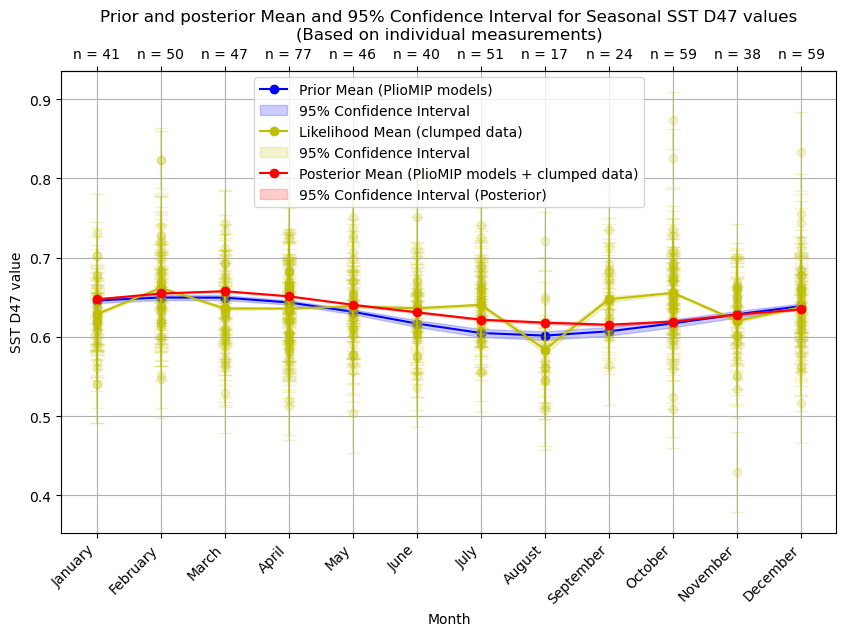

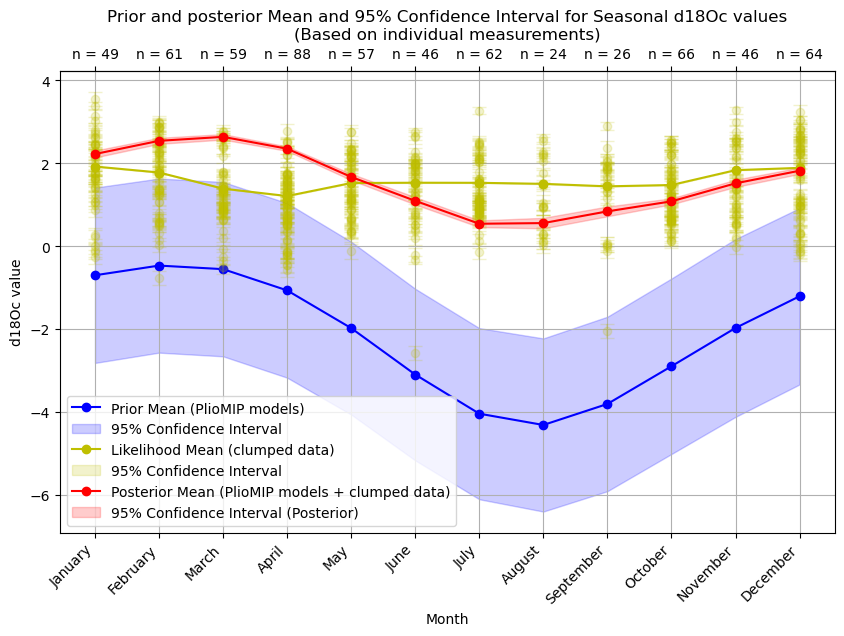

In [30]:
# --- D47 ---

# Plot the updated seasonal posterior for SST_D47
std_post_SST_D47_monthly_aggregated_Railsback_ice = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Railsback_ice))
std_prior_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_SST_D47_monthly_original))
var_start_D47_monthly = var_names.index("D47_corrETF_strict") * num_bins_monthly # Determine the start index for the D47 variable
var_end_D47_monthly = var_start_D47_monthly + num_bins_monthly # Determine the end index for the D47 variable
n_update_monthly_aggregated_Railsback_ice_D47 = n_update_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_SST_D47_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(months_scale, mu_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Railsback_ice_D47) * std_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_Railsback_ice_D47),
    mu_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Railsback_ice_D47) * std_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_Railsback_ice_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], yerr=measurement["D47_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_Railsback_ice_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_SST_D47_monthly_aggregated_Railsback_ice, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_Railsback_ice - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Railsback_ice_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_Railsback_ice / np.sqrt(n_update_monthly_aggregated_Railsback_ice_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated_Railsback_ice + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Railsback_ice_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_Railsback_ice / np.sqrt(n_update_monthly_aggregated_Railsback_ice_D47 + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal SST D47 values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated seasonal posterior for d18Oc
std_post_d18Oc_monthly_aggregated_Railsback_ice = np.sqrt(np.diag(cov_post_d18Oc_Railsback_ice_monthly_aggregated))
std_prior_d18Oc_Railsback_ice_monthly_original = np.sqrt(np.diag(cov_prior_d18Oc_Railsback_ice_monthly_original))
var_start_d18Oc_monthly = var_names.index("Final_d18O") * num_bins_monthly # Determine the start index for the d18Oc variable
var_end_d18Oc_monthly = var_start_d18Oc_monthly + num_bins_monthly # Determine the end index for the d18Oc variable
n_update_monthly_aggregated_Railsback_ice_d18Oc = n_update_monthly_aggregated_Railsback_ice[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_d18Oc_Railsback_ice_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_d18Oc_Railsback_ice_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Railsback_ice_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_d18Oc_Railsback_ice_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Railsback_ice_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(months_scale, mu_likelihood_monthly_aggregated_Railsback_ice[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated_Railsback_ice[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Railsback_ice_d18Oc) * std_likelihood_monthly_aggregated_Railsback_ice[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_Railsback_ice_d18Oc),
    mu_likelihood_monthly_aggregated_Railsback_ice[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Railsback_ice_d18Oc) * std_likelihood_monthly_aggregated_Railsback_ice[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_Railsback_ice_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], yerr=measurement["d18O_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_Railsback_ice_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_d18Oc_Railsback_ice_monthly_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_d18Oc_Railsback_ice_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Railsback_ice_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated_Railsback_ice / np.sqrt(n_update_monthly_aggregated_Railsback_ice_d18Oc + n_models_monthly),
    mu_post_d18Oc_Railsback_ice_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Railsback_ice_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated_Railsback_ice / np.sqrt(n_update_monthly_aggregated_Railsback_ice_d18Oc + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal d18Oc values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()

## Update monthly prior with data (d18Ow conversion following assuming greenhouse conditions)
* Data and model outcomes assembled per month
* Ignore sclero-dating uncertainty
* D47 data aggregated in monthly bins prior to assembly

In [31]:
# Update the seasonal prior with all measurements assigned to the seasons according to the ShellChron_DOY_rotated field
monthly_aggregated_Railsback_green_data = {} # Keep track of datapoints per season
n_update_monthly_aggregated_Railsback_green = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_green_monthly_original * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_monthly_aggregated_Railsback_green = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_green_monthly_original * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_monthly_aggregated_Railsback_green = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_green_monthly_original * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_monthly_aggregated_Railsback_green = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_green_monthly_original * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_monthly_aggregated_Railsback_green = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_Railsback_green_monthly_original * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47_corrETF_strict", "Final_d18O"] # List of variable names which are updated
var_SD_names = ["D47_sd_ext", "d18O_sd_ext"] # List of names of variable uncertainties which are updated

# Update the prior with seasonal data using the Kalman filter in block updating form
mu_post_monthly_aggregated_Railsback_green, cov_post_monthly_aggregated_Railsback_green = kalman_update_block(
    mu_prior_monthly_combined_Railsback_green,
    cov_prior_monthly_combined_Railsback_green,
    Z_monthly_aggregated,
    R_monthly_aggregated,
    H_monthly_aggregated
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_monthly_aggregated_Railsback_green = mu_post_monthly_aggregated_Railsback_green[:len(mu_prior_SST_D47_monthly)]
mu_post_SAT_D47_monthly_aggregated_Railsback_green = mu_post_monthly_aggregated_Railsback_green[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
mu_post_d18Oc_Railsback_green_monthly_aggregated = mu_post_monthly_aggregated_Railsback_green[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
mu_post_precip_monthly_aggregated_Railsback_green = mu_post_monthly_aggregated_Railsback_green[3*len(mu_prior_d18Oc_Railsback_green_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_monthly_aggregated_Railsback_green = cov_post_monthly_aggregated_Railsback_green[:len(mu_prior_SST_D47_monthly), :len(mu_prior_SST_D47_monthly)]
cov_post_SAT_D47_monthly_aggregated_Railsback_green = cov_post_monthly_aggregated_Railsback_green[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly), len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
cov_post_d18Oc_Railsback_green_monthly_aggregated = cov_post_monthly_aggregated_Railsback_green[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly), 2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
cov_post_precip_monthly_aggregated_Railsback_green = cov_post_monthly_aggregated_Railsback_green[3*len(mu_prior_d18Oc_Railsback_green_monthly):, 3*len(mu_prior_d18Oc_Railsback_green_monthly):]

for measurement in PWP_data_dict: # Loop over measurements
    # Track and update likelihood statistics
    weighted_sum_monthly_aggregated_Railsback_green, effective_weights_total_monthly_aggregated_Railsback_green, n_update_monthly_aggregated_Railsback_green, monthly_aggregated_Railsback_green_data = likelihood_statistics_multi(
        weighted_sum_monthly_aggregated_Railsback_green,
        effective_weights_total_monthly_aggregated_Railsback_green,
        n_update_monthly_aggregated_Railsback_green,
        monthly_aggregated_Railsback_green_data,
        measurement,
        timestamp = "month_score2",
        timestamp_sd = "ShellChron_no_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_monthly_aggregated_Railsback_green to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_monthly_aggregated_Railsback_green to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_monthly = int(len(weighted_sum_monthly_aggregated_Railsback_green) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_monthly):
        idx = var_idx * num_bins_monthly + bin_idx
        if effective_weights_total_monthly_aggregated_Railsback_green[idx] is not None and effective_weights_total_monthly_aggregated_Railsback_green[idx] != 0:
            mu_likelihood_monthly_aggregated_Railsback_green[idx] = weighted_sum_monthly_aggregated_Railsback_green[idx] / effective_weights_total_monthly_aggregated_Railsback_green[idx]
            std_likelihood_monthly_aggregated_Railsback_green[idx] = np.sqrt(1 / effective_weights_total_monthly_aggregated_Railsback_green[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_monthly_aggregated_Railsback_green[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_monthly_aggregated_Railsback_green[idx]}")
        print(f"    Number of Data Points: {n_update_monthly_aggregated_Railsback_green[idx]}")
    print()

print("Original Prior Mean SST-D47 Seasonal:\n", mu_prior_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 Seasonal:\n", mu_post_SST_D47_monthly_aggregated_Railsback_green)
print("Updated Posterior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Railsback_green)))
print("Original Prior Mean SAT-D47 Seasonal:\n", mu_prior_SAT_D47_monthly_original)
print("Original Prior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SAT_D47_monthly_original)))
print("Updated Posterior Mean SAT-D47 Seasonal:\n", mu_post_SAT_D47_monthly_aggregated_Railsback_green)
print("Updated Posterior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_Railsback_green)))
print("Original Prior Mean d18Oc Seasonal:\n", mu_prior_d18Oc_Railsback_green_monthly_original)
print("Original Prior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_prior_d18Oc_Railsback_green_monthly_original)))
print("Updated Posterior Mean d18Oc Seasonal:\n", mu_post_d18Oc_Railsback_green_monthly_aggregated)
print("Updated Posterior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_post_d18Oc_Railsback_green_monthly_aggregated)))
print("Original Prior Mean precipitation Seasonal:\n", mu_prior_precip_monthly_original)
print("Original Prior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_prior_precip_monthly_original)))
print("Updated Posterior Mean precipitation Seasonal:\n", mu_post_precip_monthly_aggregated_Railsback_green)
print("Updated Posterior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_green)))

Likelihood statistics:
Results for variable: D47_corrETF_strict
  Bin 1:
    Weighted Average: 0.6286965046662804
    Aggregated Uncertainty: 0.006172172468534013
    Number of Data Points: 41.0
  Bin 2:
    Weighted Average: 0.6619659675289109
    Aggregated Uncertainty: 0.005702205186276009
    Number of Data Points: 50.0
  Bin 3:
    Weighted Average: 0.6359313809752828
    Aggregated Uncertainty: 0.005962213370555013
    Number of Data Points: 47.0
  Bin 4:
    Weighted Average: 0.635874055245299
    Aggregated Uncertainty: 0.004533472087358248
    Number of Data Points: 77.0
  Bin 5:
    Weighted Average: 0.6385765019088617
    Aggregated Uncertainty: 0.005970373422008295
    Number of Data Points: 46.0
  Bin 6:
    Weighted Average: 0.6361053169591214
    Aggregated Uncertainty: 0.006784491839417968
    Number of Data Points: 40.0
  Bin 7:
    Weighted Average: 0.6405577455241105
    Aggregated Uncertainty: 0.005527388083791424
    Number of Data Points: 51.0
  Bin 8:
    Weighte

### Plot monthly posterior without sclero-dating uncertainty in D47 domain

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


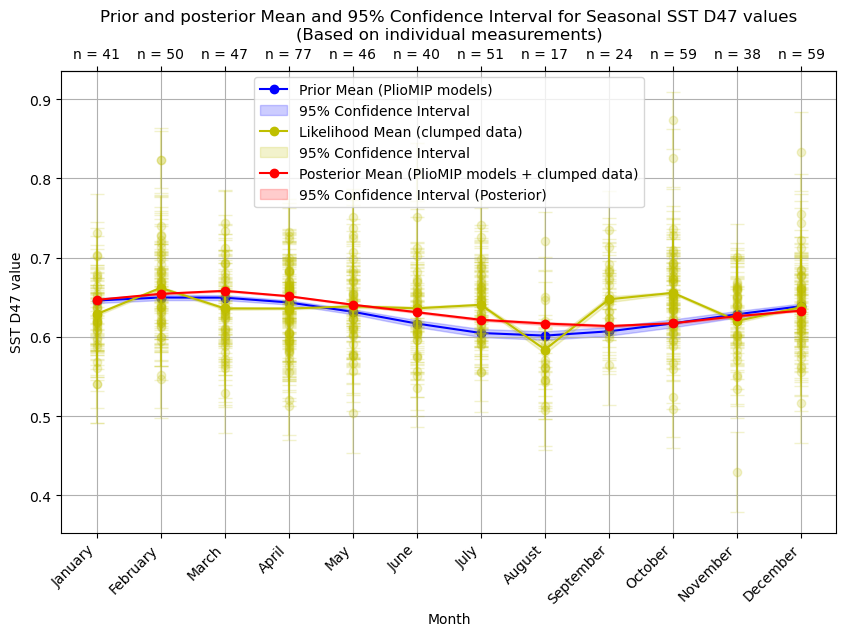

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


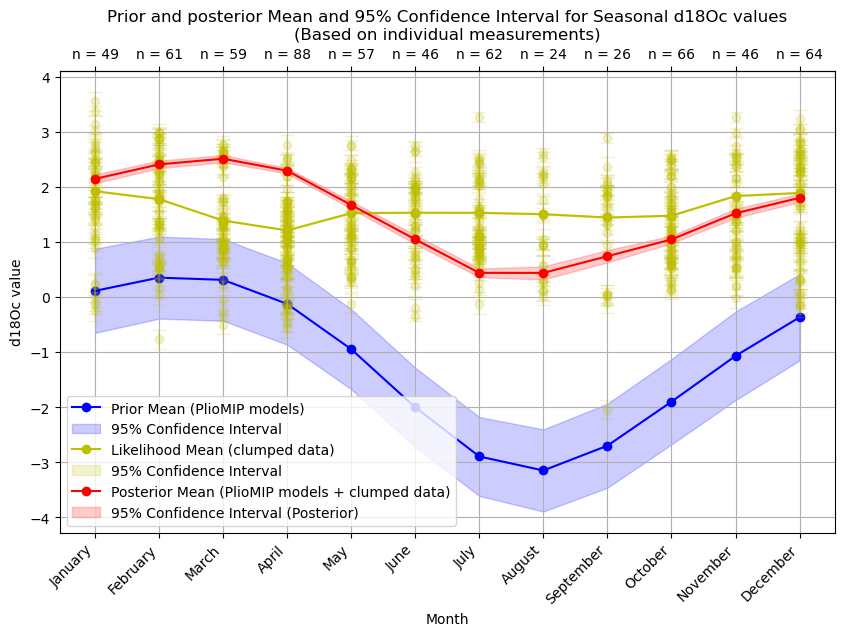

In [32]:
# --- D47 ---

# Plot the updated seasonal posterior for SST_D47
std_post_SST_D47_monthly_aggregated_Railsback_green = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Railsback_green))
std_prior_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_SST_D47_monthly_original))
var_start_D47_monthly = var_names.index("D47_corrETF_strict") * num_bins_monthly # Determine the start index for the D47 variable
var_end_D47_monthly = var_start_D47_monthly + num_bins_monthly # Determine the end index for the D47 variable
n_update_monthly_aggregated_Railsback_green_D47 = n_update_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_SST_D47_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(months_scale, mu_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Railsback_green_D47) * std_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_Railsback_green_D47),
    mu_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Railsback_green_D47) * std_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_Railsback_green_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["D47_corrETF_strict"], yerr=measurement["D47_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_Railsback_green_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_SST_D47_monthly_aggregated_Railsback_green, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_Railsback_green - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Railsback_green_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_Railsback_green / np.sqrt(n_update_monthly_aggregated_Railsback_green_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated_Railsback_green + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Railsback_green_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_Railsback_green / np.sqrt(n_update_monthly_aggregated_Railsback_green_D47 + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal SST D47 values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated seasonal posterior for d18Oc
std_post_d18Oc_monthly_aggregated_Railsback_green = np.sqrt(np.diag(cov_post_d18Oc_Railsback_green_monthly_aggregated))
std_prior_d18Oc_Railsback_green_monthly_original = np.sqrt(np.diag(cov_prior_d18Oc_Railsback_green_monthly_original))
var_start_d18Oc_monthly = var_names.index("Final_d18O") * num_bins_monthly # Determine the start index for the d18Oc variable
var_end_d18Oc_monthly = var_start_d18Oc_monthly + num_bins_monthly # Determine the end index for the d18Oc variable
n_update_monthly_aggregated_Railsback_green_d18Oc = n_update_monthly_aggregated_Railsback_green[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_d18Oc_Railsback_green_monthly_original, label='Prior Mean (PlioMIP models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_d18Oc_Railsback_green_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Railsback_green_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_d18Oc_Railsback_green_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_Railsback_green_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(months_scale, mu_likelihood_monthly_aggregated_Railsback_green[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated_Railsback_green[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Railsback_green_d18Oc) * std_likelihood_monthly_aggregated_Railsback_green[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_Railsback_green_d18Oc),
    mu_likelihood_monthly_aggregated_Railsback_green[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Railsback_green_d18Oc) * std_likelihood_monthly_aggregated_Railsback_green[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_aggregated_Railsback_green_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in PWP_data_dict:
    plt.plot(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score2"]) + 1, measurement["Final_d18O"], yerr=measurement["d18O_sd_ext"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_Railsback_green_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_d18Oc_Railsback_green_monthly_aggregated, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_d18Oc_Railsback_green_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Railsback_green_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated_Railsback_green / np.sqrt(n_update_monthly_aggregated_Railsback_green_d18Oc + n_models_monthly),
    mu_post_d18Oc_Railsback_green_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Railsback_green_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated_Railsback_green / np.sqrt(n_update_monthly_aggregated_Railsback_green_d18Oc + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal d18Oc values\n(Based on individual measurements)')
plt.xlabel('Month')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()

# POSTERIOR - MONTHLY

## Monthly posterior in temperature and salinity domains with aggregated data
* Data and model outcomes assembled per month
* Ignore sclero-dating uncertainty
* D47 data aggregated in monthly bins prior to assembly

### Convert monthly prior, likelihood and posterior to temperature and salinity

In [33]:
# PRIORS
# Convert prior D47 to temp
mu_prior_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_monthly_original, sD47 = cov_prior_SST_D47_monthly_original, return_covar = True)[0]
cov_prior_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_monthly_original, sD47 = cov_prior_SST_D47_monthly_original, return_covar = True)[1]

# Convert prior d18Oc and temperature to d18Ow using Grossman and Ku (1986) with the VPDB-VSMOW scale correction by Gonfiantini et al. (1995) and Dettman et al. (1999)
mu_prior_d18Ow_Harwood_monthly_T = mu_prior_d18Oc_Harwood_monthly_original - (20.6 - mu_prior_SST_D47_monthly_T) / 4.34 + 0.27
mu_prior_d18Ow_Graniero_monthly_T = mu_prior_d18Oc_Graniero_monthly_original - (20.6 - mu_prior_SST_D47_monthly_T) / 4.34 + 0.27
mu_prior_d18Ow_Railsback_ice_monthly_T = mu_prior_d18Oc_Railsback_ice_monthly_original - (20.6 - mu_prior_SST_D47_monthly_T) / 4.34 + 0.27
mu_prior_d18Ow_Railsback_green_monthly_T = mu_prior_d18Oc_Railsback_green_monthly_original - (20.6 - mu_prior_SST_D47_monthly_T) / 4.34 + 0.27
cov_prior_d18Ow_Harwood_monthly_T = cov_prior_d18Oc_Harwood_monthly_original + (1 / 4.34) ** 2 * cov_prior_SST_D47_monthly_T
cov_prior_d18Ow_Graniero_monthly_T = cov_prior_d18Oc_Graniero_monthly_original + (1 / 4.34) ** 2 * cov_prior_SST_D47_monthly_T
cov_prior_d18Ow_Railsback_ice_monthly_T = cov_prior_d18Oc_Railsback_ice_monthly_original + (1 / 4.34) ** 2 * cov_prior_SST_D47_monthly_T
cov_prior_d18Ow_Railsback_green_monthly_T = cov_prior_d18Oc_Railsback_green_monthly_original + (1 / 4.34) ** 2 * cov_prior_SST_D47_monthly_T

# Convert prior d18Ow to SSS using different conversion functions
mu_prior_SSS_d18Ow_Harwood_monthly_T = (mu_prior_d18Ow_Harwood_monthly_T + 9.300) / 0.274
mu_prior_SSS_d18Ow_Graniero_monthly_T = (mu_prior_d18Ow_Graniero_monthly_T + 7.89) / 0.23
mu_prior_SSS_d18Ow_Railsback_ice_monthly_T = mu_prior_d18Ow_Railsback_ice_monthly_T * 35 / 21 + 35
mu_prior_SSS_d18Ow_Railsback_green_monthly_T = (mu_prior_d18Ow_Railsback_green_monthly_T + 1.08) * 35 / 8 + 35
cov_prior_SSS_d18Ow_Harwood_monthly_T = cov_prior_d18Ow_Harwood_monthly_T / (0.274 ** 2)
cov_prior_SSS_d18Ow_Graniero_monthly_T = cov_prior_d18Ow_Graniero_monthly_T / (0.23 ** 2)
cov_prior_SSS_d18Ow_Railsback_ice_monthly_T = cov_prior_d18Ow_Railsback_ice_monthly_T / (35 / 21) ** 2
cov_prior_SSS_d18Ow_Railsback_green_monthly_T = cov_prior_d18Ow_Railsback_green_monthly_T / (35 / 8) ** 2

# LIKELIHOODS
# Convert likelihood D47 to temp
mu_likelihood_monthly_aggregated_Harwood_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[0]
mu_likelihood_monthly_aggregated_Graniero_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[0]
mu_likelihood_monthly_aggregated_Railsback_ice_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[0]
mu_likelihood_monthly_aggregated_Railsback_green_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[0]
cov_likelihood_monthly_aggregated_Harwood_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated_Harwood[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[1]
cov_likelihood_monthly_aggregated_Graniero_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated_Graniero[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[1]
cov_likelihood_monthly_aggregated_Railsback_ice_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated_Railsback_ice[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[1]
cov_likelihood_monthly_aggregated_Railsback_green_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated_Railsback_green[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[1]

# Convert likelihood d18Oc and temperature to d18Ow
mu_likelihood_d18Ow_monthly_aggregated_Harwood_T = mu_likelihood_monthly_aggregated_Harwood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - (20.6 - mu_likelihood_monthly_aggregated_Harwood_T) / 4.34 + 0.27
mu_likelihood_d18Ow_monthly_aggregated_Graniero_T = mu_likelihood_monthly_aggregated_Graniero[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - (20.6 - mu_likelihood_monthly_aggregated_Graniero_T) / 4.34 + 0.27
mu_likelihood_d18Ow_monthly_aggregated_Railsback_ice_T = mu_likelihood_monthly_aggregated_Railsback_ice[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - (20.6 - mu_likelihood_monthly_aggregated_Railsback_ice_T) / 4.34 + 0.27
mu_likelihood_d18Ow_monthly_aggregated_Railsback_green_T = mu_likelihood_monthly_aggregated_Railsback_green[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - (20.6 - mu_likelihood_monthly_aggregated_Railsback_green_T) / 4.34 + 0.27
std_likelihood_d18Ow_monthly_aggregated_Harwood_T = std_likelihood_monthly_aggregated_Harwood[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_monthly_aggregated_Harwood_T))
std_likelihood_d18Ow_monthly_aggregated_Graniero_T = std_likelihood_monthly_aggregated_Graniero[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_monthly_aggregated_Graniero_T))
std_likelihood_d18Ow_monthly_aggregated_Railsback_ice_T = std_likelihood_monthly_aggregated_Railsback_ice[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_monthly_aggregated_Railsback_ice_T))
std_likelihood_d18Ow_monthly_aggregated_Railsback_green_T = std_likelihood_monthly_aggregated_Railsback_green[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_monthly_aggregated_Railsback_green_T))

# Convert likelihood d18Ow to SSS
mu_likelihood_SSS_d18Ow_monthly_aggregated_Harwood_T = (mu_likelihood_d18Ow_monthly_aggregated_Harwood_T + 9.300) / 0.274
mu_likelihood_SSS_d18Ow_monthly_aggregated_Graniero_T = (mu_likelihood_d18Ow_monthly_aggregated_Graniero_T + 7.89) / 0.23
mu_likelihood_SSS_d18Ow_monthly_aggregated_Railsback_ice_T = mu_likelihood_d18Ow_monthly_aggregated_Railsback_ice_T * 35 / 21 + 35
mu_likelihood_SSS_d18Ow_monthly_aggregated_Railsback_green_T = (mu_likelihood_d18Ow_monthly_aggregated_Railsback_green_T + 1.08) * 35 / 8 + 35
std_likelihood_SSS_d18Ow_monthly_aggregated_Harwood_T = std_likelihood_d18Ow_monthly_aggregated_Harwood_T / (0.274 ** 2)
std_likelihood_SSS_d18Ow_monthly_aggregated_Graniero_T = std_likelihood_d18Ow_monthly_aggregated_Graniero_T / (0.23 ** 2)
std_likelihood_SSS_d18Ow_monthly_aggregated_Railsback_ice_T = std_likelihood_d18Ow_monthly_aggregated_Railsback_ice_T / (35 / 21) ** 2
std_likelihood_SSS_d18Ow_monthly_aggregated_Railsback_green_T = std_likelihood_d18Ow_monthly_aggregated_Railsback_green_T / (35 / 8) ** 2

# POSTERIORS
# Convert posterior SST-D47 to temp
mu_post_SST_D47_monthly_aggregated_Harwood_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated_Harwood, sD47 = cov_post_SST_D47_monthly_aggregated_Harwood, return_covar = True)[0] 
mu_post_SST_D47_monthly_aggregated_Graniero_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated_Graniero, sD47 = cov_post_SST_D47_monthly_aggregated_Graniero, return_covar = True)[0]
mu_post_SST_D47_monthly_aggregated_Railsback_ice_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated_Railsback_ice, sD47 = cov_post_SST_D47_monthly_aggregated_Railsback_ice, return_covar = True)[0]
mu_post_SST_D47_monthly_aggregated_Railsback_green_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated_Railsback_green, sD47 = cov_post_SST_D47_monthly_aggregated_Railsback_green, return_covar = True)[0]
cov_post_SST_D47_monthly_aggregated_Harwood_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated_Harwood, sD47 = cov_post_SST_D47_monthly_aggregated_Harwood, return_covar = True)[1]
cov_post_SST_D47_monthly_aggregated_Graniero_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated_Graniero, sD47 = cov_post_SST_D47_monthly_aggregated_Graniero, return_covar = True)[1]
cov_post_SST_D47_monthly_aggregated_Railsback_ice_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated_Railsback_ice, sD47 = cov_post_SST_D47_monthly_aggregated_Railsback_ice, return_covar = True)[1]
cov_post_SST_D47_monthly_aggregated_Railsback_green_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated_Railsback_green, sD47 = cov_post_SST_D47_monthly_aggregated_Railsback_green, return_covar = True)[1]

# Convert posterior SAT-D47 to temp
mu_post_SAT_D47_monthly_aggregated_Harwood_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated_Harwood, sD47 = cov_post_SAT_D47_monthly_aggregated_Harwood, return_covar = True)[0] 
mu_post_SAT_D47_monthly_aggregated_Graniero_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated_Graniero, sD47 = cov_post_SAT_D47_monthly_aggregated_Graniero, return_covar = True)[0]
mu_post_SAT_D47_monthly_aggregated_Railsback_ice_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated_Railsback_ice, sD47 = cov_post_SAT_D47_monthly_aggregated_Railsback_ice, return_covar = True)[0]
mu_post_SAT_D47_monthly_aggregated_Railsback_green_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated_Railsback_green, sD47 = cov_post_SAT_D47_monthly_aggregated_Railsback_green, return_covar = True)[0]
cov_post_SAT_D47_monthly_aggregated_Harwood_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated_Harwood, sD47 = cov_post_SAT_D47_monthly_aggregated_Harwood, return_covar = True)[1]
cov_post_SAT_D47_monthly_aggregated_Graniero_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated_Graniero, sD47 = cov_post_SAT_D47_monthly_aggregated_Graniero, return_covar = True)[1]
cov_post_SAT_D47_monthly_aggregated_Railsback_ice_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated_Railsback_ice, sD47 = cov_post_SAT_D47_monthly_aggregated_Railsback_ice, return_covar = True)[1]
cov_post_SAT_D47_monthly_aggregated_Railsback_green_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated_Railsback_green, sD47 = cov_post_SAT_D47_monthly_aggregated_Railsback_green, return_covar = True)[1]

# Convert posterior d18Oc and temperature to d18Ow
mu_post_d18Ow_monthly_aggregated_Harwood_T = mu_post_d18Oc_Harwood_monthly_aggregated - (20.6 - mu_post_SST_D47_monthly_aggregated_Harwood_T) / 4.34 + 0.27
mu_post_d18Ow_monthly_aggregated_Graniero_T = mu_post_d18Oc_Graniero_monthly_aggregated - (20.6 - mu_post_SST_D47_monthly_aggregated_Graniero_T) / 4.34 + 0.27
mu_post_d18Ow_monthly_aggregated_Railsback_ice_T = mu_post_d18Oc_Railsback_ice_monthly_aggregated - (20.6 - mu_post_SST_D47_monthly_aggregated_Railsback_ice_T) / 4.34 + 0.27
mu_post_d18Ow_monthly_aggregated_Railsback_green_T = mu_post_d18Oc_Railsback_green_monthly_aggregated - (20.6 - mu_post_SST_D47_monthly_aggregated_Railsback_green_T) / 4.34 + 0.27
cov_post_d18Ow_monthly_aggregated_Harwood_T = cov_post_d18Oc_Harwood_monthly_aggregated + (1 / 4.34) ** 2 * cov_post_SST_D47_monthly_aggregated_Harwood_T
cov_post_d18Ow_monthly_aggregated_Graniero_T = cov_post_d18Oc_Graniero_monthly_aggregated + (1 / 4.34) ** 2 * cov_post_SST_D47_monthly_aggregated_Graniero_T
cov_post_d18Ow_monthly_aggregated_Railsback_ice_T = cov_post_d18Oc_Railsback_ice_monthly_aggregated + (1 / 4.34) ** 2 * cov_post_SST_D47_monthly_aggregated_Railsback_ice_T
cov_post_d18Ow_monthly_aggregated_Railsback_green_T = cov_post_d18Oc_Railsback_green_monthly_aggregated + (1 / 4.34) ** 2 * cov_post_SST_D47_monthly_aggregated_Railsback_green_T

# Convert posterior d18Ow to SSS
mu_post_SSS_d18Ow_monthly_aggregated_Harwood_T = (mu_post_d18Ow_monthly_aggregated_Harwood_T + 9.300) / 0.274
mu_post_SSS_d18Ow_monthly_aggregated_Graniero_T = (mu_post_d18Ow_monthly_aggregated_Graniero_T + 7.89) / 0.23
mu_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T = mu_post_d18Ow_monthly_aggregated_Railsback_ice_T * 35 / 21 + 35
mu_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T = (mu_post_d18Ow_monthly_aggregated_Railsback_green_T + 1.08) * 35 / 8 + 35
cov_post_SSS_d18Ow_monthly_aggregated_Harwood_T = cov_post_d18Ow_monthly_aggregated_Harwood_T / (0.274 ** 2)
cov_post_SSS_d18Ow_monthly_aggregated_Graniero_T = cov_post_d18Ow_monthly_aggregated_Graniero_T / (0.23 ** 2)
cov_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T = cov_post_d18Ow_monthly_aggregated_Railsback_ice_T / (35 / 21) ** 2
cov_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T = cov_post_d18Ow_monthly_aggregated_Railsback_green_T / (35 / 8) ** 2

# Calculate standard deviations for prior, likelihood, and posterior in temperature and d18Ow space
std_prior_SST_D47_monthly_T = np.sqrt(np.diag(cov_prior_SST_D47_monthly_T))

std_prior_SSS_d18Ow_Harwood_monthly_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_Harwood_monthly_T))
std_prior_SSS_d18Ow_Graniero_monthly_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_Graniero_monthly_T))
std_prior_SSS_d18Ow_Railsback_ice_monthly_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_Railsback_ice_monthly_T))
std_prior_SSS_d18Ow_Railsback_green_monthly_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_Railsback_green_monthly_T))

std_likelihood_monthly_aggregated_Harwood_T = np.sqrt(np.diag(cov_likelihood_monthly_aggregated_Harwood_T))
std_likelihood_monthly_aggregated_Graniero_T = np.sqrt(np.diag(cov_likelihood_monthly_aggregated_Graniero_T))
std_likelihood_monthly_aggregated_Railsback_ice_T = np.sqrt(np.diag(cov_likelihood_monthly_aggregated_Railsback_ice_T))
std_likelihood_monthly_aggregated_Railsback_green_T = np.sqrt(np.diag(cov_likelihood_monthly_aggregated_Railsback_green_T))

std_post_SST_D47_monthly_aggregated_Harwood_T = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Harwood_T))
std_post_SST_D47_monthly_aggregated_Graniero_T = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Graniero_T))
std_post_SST_D47_monthly_aggregated_Railsback_ice_T = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Railsback_ice_T))
std_post_SST_D47_monthly_aggregated_Railsback_green_T = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_Railsback_green_T))

std_post_SAT_D47_monthly_aggregated_Harwood_T = np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_Harwood_T))
std_post_SAT_D47_monthly_aggregated_Graniero_T = np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_Graniero_T))
std_post_SAT_D47_monthly_aggregated_Railsback_ice_T = np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_Railsback_ice_T))
std_post_SAT_D47_monthly_aggregated_Railsback_green_T = np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_Railsback_green_T))

std_post_SSS_d18Ow_monthly_aggregated_Harwood_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_monthly_aggregated_Harwood_T))
std_post_SSS_d18Ow_monthly_aggregated_Graniero_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_monthly_aggregated_Graniero_T))
std_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T))
std_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T))

# # Initiate plot
# fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# # FIRST PANEL: SST Results
# # PRIOR
# axs[0].plot(months_scale, mu_prior_SST_D47_monthly_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
# axs[0].fill_between(months_scale,
#     mu_prior_SST_D47_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_T / np.sqrt(n_models_monthly),
#     mu_prior_SST_D47_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_T / np.sqrt(n_models_monthly),
#     color='b', alpha=0.2, label='95% Confidence Interval')

# # LIKELIHOOD
# axs[0].plot(months_scale, mu_likelihood_monthly_aggregated_Harwood_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
# axs[0].fill_between(months_scale,
#     mu_likelihood_monthly_aggregated_Harwood_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Harwood_D47) * std_likelihood_monthly_aggregated_Harwood_T / np.sqrt(n_update_monthly_aggregated_Harwood_D47),
#     mu_likelihood_monthly_aggregated_Harwood_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Harwood_D47) * std_likelihood_monthly_aggregated_Harwood_T / np.sqrt(n_update_monthly_aggregated_Harwood_D47),
#     color='y', alpha=0.2, label='95% Confidence Interval')

# # POSTERIOR
# axs[0].plot(months_scale, mu_post_SST_D47_monthly_aggregated_Harwood_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
# axs[0].fill_between(months_scale,
#     mu_post_SST_D47_monthly_aggregated_Harwood_T - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Harwood_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_Harwood_D47 + n_models_monthly),
#     mu_post_SST_D47_monthly_aggregated_Harwood_T + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Harwood_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_Harwood_D47 + n_models_monthly),
#     color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# # Layout for SST panel
# axs[0].set_title('monthly Sea Surface Temperatures (SST)')
# axs[0].set_ylabel('Temperature (°C)')
# axs[0].legend(loc='upper left')
# axs[0].grid(True)

# # SECOND PANEL: SSS Results
# # PRIOR
# axs[1].plot(months_scale, mu_prior_SSS_d18Ow_Harwood_monthly_T, label='Prior Mean (PlioMIP models)', color='b', marker='o')
# axs[1].fill_between(months_scale,
#     mu_prior_SSS_d18Ow_Harwood_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
#     mu_prior_SSS_d18Ow_Harwood_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
#     color='b', alpha=0.2, label='95% Confidence Interval')

# # LIKELIHOOD
# axs[1].plot(months_scale, mu_likelihood_SSS_d18Ow_monthly_aggregated_Harwood_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
# axs[1].fill_between(months_scale,
#     mu_likelihood_SSS_d18Ow_monthly_aggregated_Harwood_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Harwood_d18Oc) * std_likelihood_SSS_d18Ow_monthly_aggregated_Harwood_T / np.sqrt(n_update_monthly_aggregated_Harwood_d18Oc),
#     mu_likelihood_SSS_d18Ow_monthly_aggregated_Harwood_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_Harwood_d18Oc) * std_likelihood_SSS_d18Ow_monthly_aggregated_Harwood_T / np.sqrt(n_update_monthly_aggregated_Harwood_d18Oc),
#     color='y', alpha=0.2, label='95% Confidence Interval')

# # POSTERIOR
# axs[1].plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_T, label='Posterior Mean (PlioMIP models + clumped data)', color='r', marker='o')
# axs[1].fill_between(months_scale,
#     mu_post_SSS_d18Ow_monthly_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Harwood_d18Oc + n_models_monthly)) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_Harwood_d18Oc + n_models_monthly),
#     mu_post_SSS_d18Ow_monthly_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_Harwood_d18Oc + n_models_monthly)) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_Harwood_d18Oc + n_models_monthly),
#     color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# # Layout for SSS panel
# axs[1].set_title('monthly Sea Surface Salinity (SSS)')
# axs[1].set_xlabel('Month')
# axs[1].set_ylabel('Salinity (PSU)')
# axs[1].legend(loc='upper left')
# axs[1].grid(True)

# # Shared x-axis labels
# plt.xticks(months_scale, month_names, rotation=45, ha="right")
# plt.tight_layout()
# plt.show()


### Plot SAT, SST, SSS and precipitation posterior with SDs instead of 95% confidence levels using Harwood for d18Ow-SSS conversion

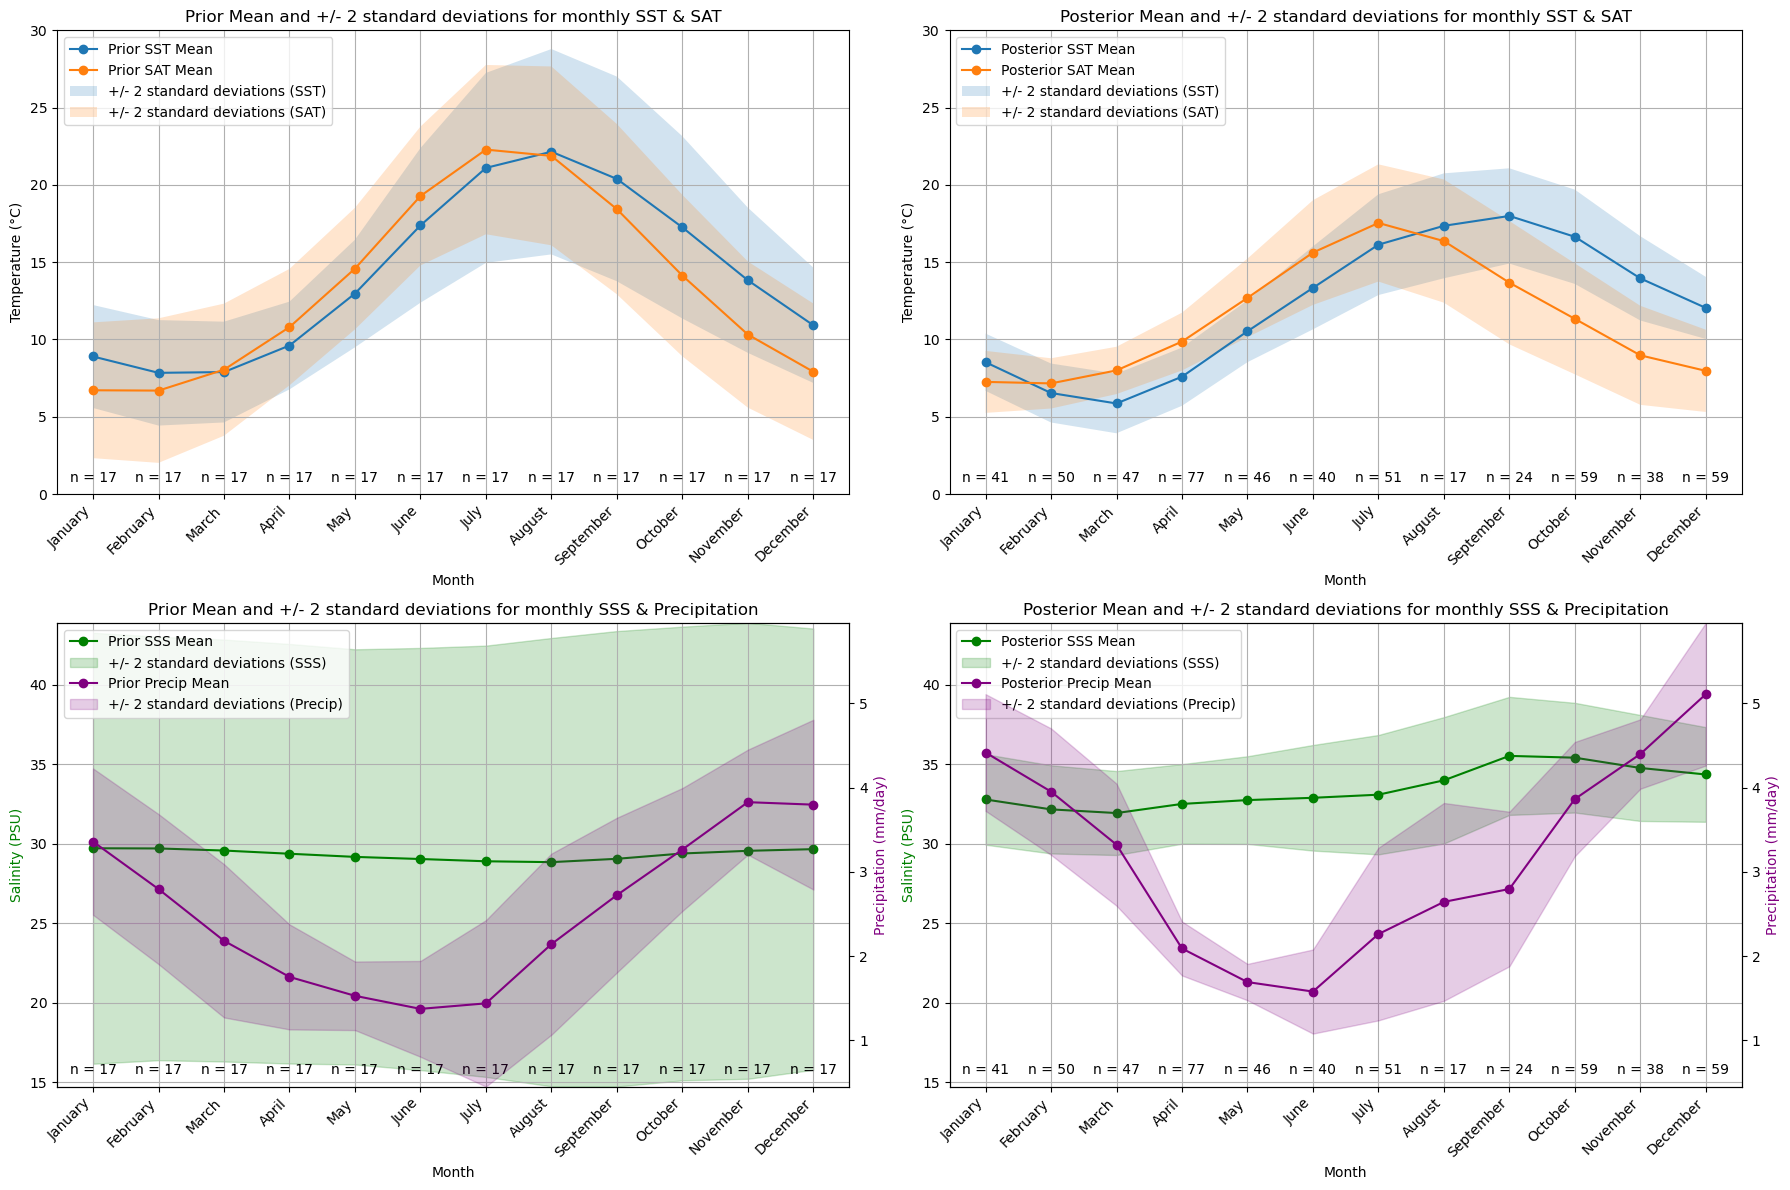

In [34]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - 2 * std_prior_SST_monthly,
    mu_prior_SST_monthly + 2 * std_prior_SST_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - 2 * std_prior_SAT_monthly,
    mu_prior_SAT_monthly + 2 * std_prior_SAT_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_monthly_aggregated_Harwood_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_Harwood_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_Harwood_T - 2 * std_post_SST_D47_monthly_aggregated_Harwood_T,
    mu_post_SST_D47_monthly_aggregated_Harwood_T + 2 * std_post_SST_D47_monthly_aggregated_Harwood_T,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_Harwood_T - 2 * std_post_SAT_D47_monthly_aggregated_Harwood_T,
    mu_post_SAT_D47_monthly_aggregated_Harwood_T + 2 * std_post_SAT_D47_monthly_aggregated_Harwood_T,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Posterior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_Harwood_monthly_T - 2 * std_prior_SSS_d18Ow_Harwood_monthly_T),
              np.min(mu_post_SSS_d18Ow_monthly_aggregated_Harwood_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_Harwood_T))
sss_max = max(np.max(mu_prior_SSS_d18Ow_Harwood_monthly_T + 2 * std_prior_SSS_d18Ow_Harwood_monthly_T),
              np.max(mu_post_SSS_d18Ow_monthly_aggregated_Harwood_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_Harwood_T))
precip_min = min(np.min(mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly),
                 np.min(mu_post_precip_monthly_aggregated_Harwood - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Harwood))))
precip_max = max(np.max(mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly),
                 np.max(mu_post_precip_monthly_aggregated_Harwood + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Harwood))))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_Harwood_monthly_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_Harwood_monthly_T - 2 * std_prior_SSS_d18Ow_Harwood_monthly_T,
    mu_prior_SSS_d18Ow_Harwood_monthly_T + 2 * std_prior_SSS_d18Ow_Harwood_monthly_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly,
    mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly,
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Prior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_Harwood_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_Harwood_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_Harwood_T,
    mu_post_SSS_d18Ow_monthly_aggregated_Harwood_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_Harwood_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip_monthly_aggregated_Harwood, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated_Harwood - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Harwood)),
    mu_post_precip_monthly_aggregated_Harwood + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Harwood)),
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Posterior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 0].text(
        months_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 1].text(
        months_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_Harwood_D47[i]) if hasattr(n_update_monthly_aggregated_Harwood_D47, '__getitem__') else n_update_monthly_aggregated_Harwood_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 0].text(
        months_scale[i], axes[1, 0].get_ylim()[0] + 1.5,
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 1].text(
        months_scale[i], axes[1, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_Harwood_D47[i]) if hasattr(n_update_monthly_aggregated_Harwood_D47, '__getitem__') else n_update_monthly_aggregated_Harwood_D47}",
        ha='center', va='top', fontsize=10
    )

plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior with SDs instead of 95% confidence levels using Graniero for d18Ow-SSS conversion

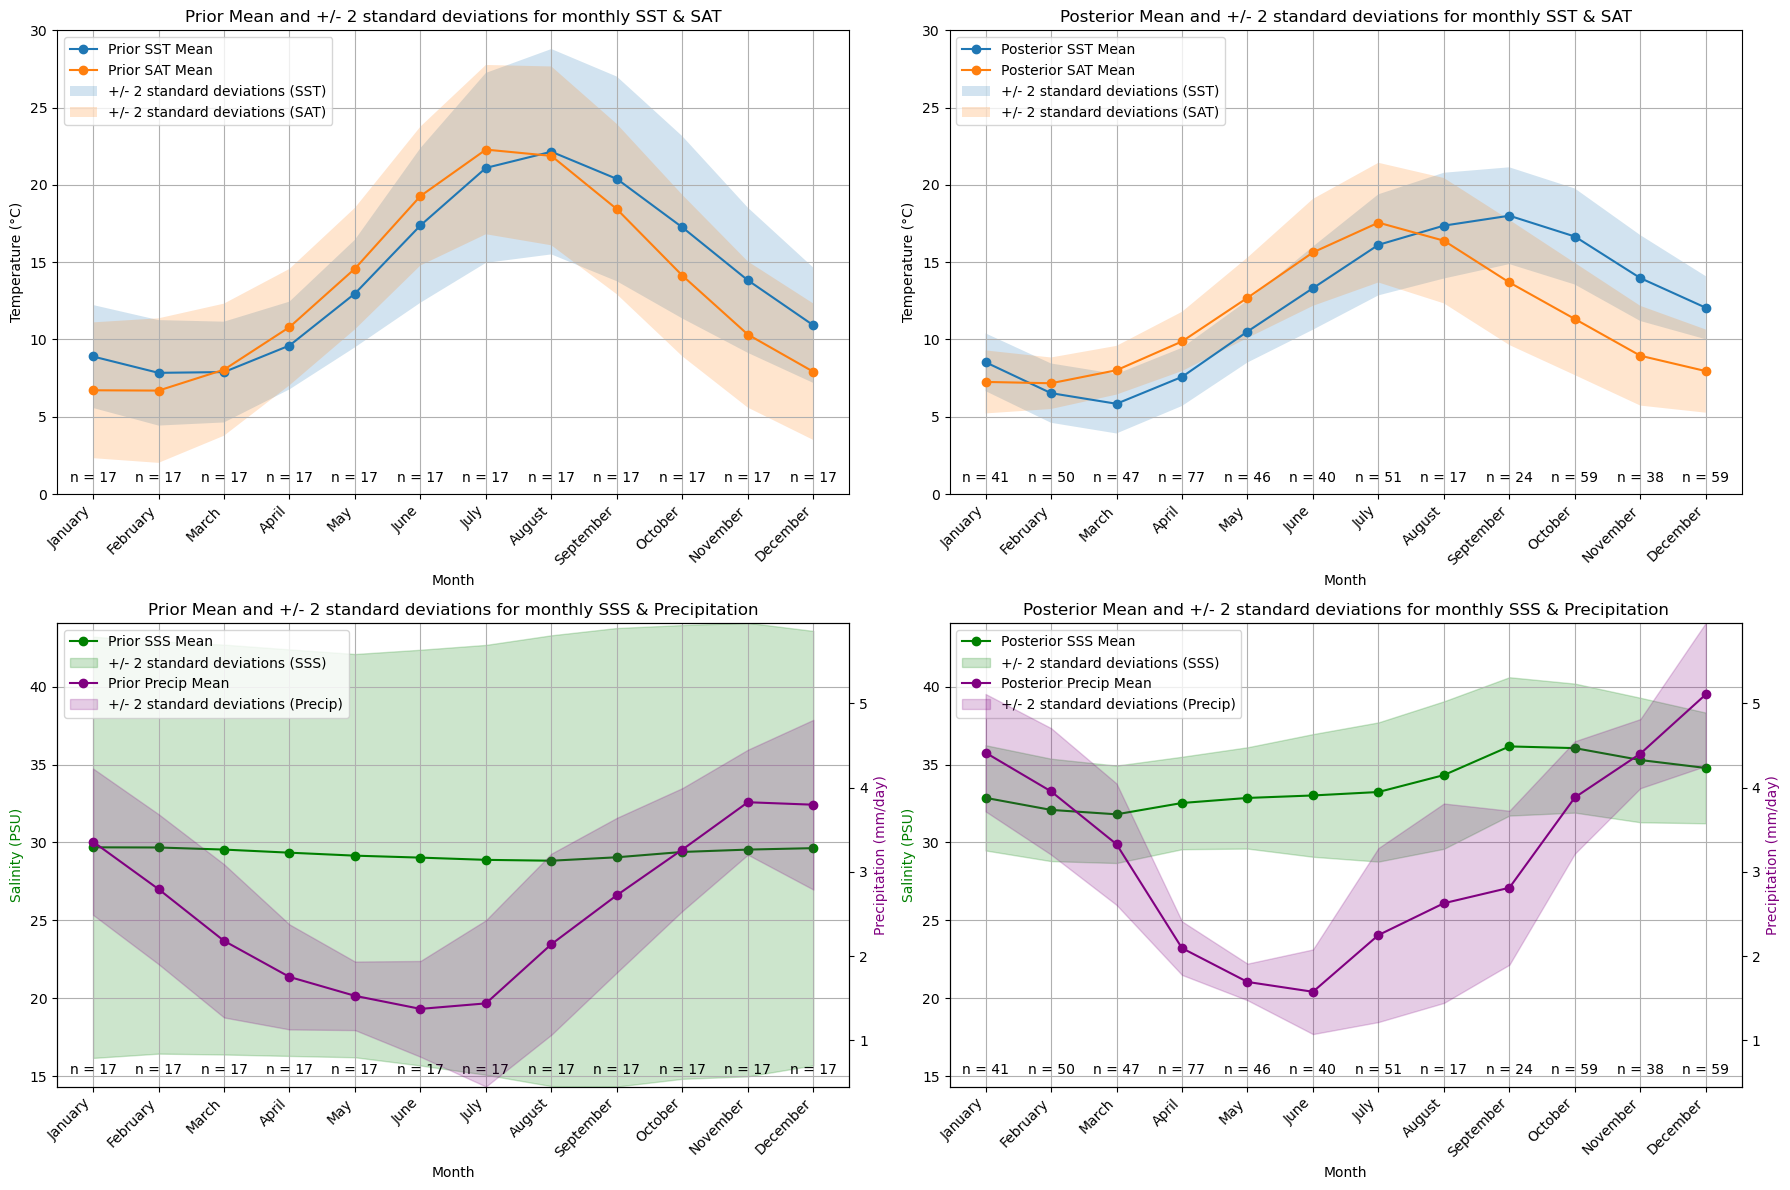

In [35]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - 2 * std_prior_SST_monthly,
    mu_prior_SST_monthly + 2 * std_prior_SST_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - 2 * std_prior_SAT_monthly,
    mu_prior_SAT_monthly + 2 * std_prior_SAT_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_monthly_aggregated_Graniero_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_Graniero_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_Graniero_T - 2 * std_post_SST_D47_monthly_aggregated_Graniero_T,
    mu_post_SST_D47_monthly_aggregated_Graniero_T + 2 * std_post_SST_D47_monthly_aggregated_Graniero_T,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_Graniero_T - 2 * std_post_SAT_D47_monthly_aggregated_Graniero_T,
    mu_post_SAT_D47_monthly_aggregated_Graniero_T + 2 * std_post_SAT_D47_monthly_aggregated_Graniero_T,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Posterior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_Graniero_monthly_T - 2 * std_prior_SSS_d18Ow_Graniero_monthly_T),
              np.min(mu_post_SSS_d18Ow_monthly_aggregated_Graniero_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_Graniero_T))
sss_max = max(np.max(mu_prior_SSS_d18Ow_Graniero_monthly_T + 2 * std_prior_SSS_d18Ow_Graniero_monthly_T),
              np.max(mu_post_SSS_d18Ow_monthly_aggregated_Graniero_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_Graniero_T))
precip_min = min(np.min(mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly),
                 np.min(mu_post_precip_monthly_aggregated_Graniero - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Graniero))))
precip_max = max(np.max(mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly),
                 np.max(mu_post_precip_monthly_aggregated_Graniero + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Graniero))))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_Graniero_monthly_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_Graniero_monthly_T - 2 * std_prior_SSS_d18Ow_Graniero_monthly_T,
    mu_prior_SSS_d18Ow_Graniero_monthly_T + 2 * std_prior_SSS_d18Ow_Graniero_monthly_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly,
    mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly,
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Prior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_Graniero_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_Graniero_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_Graniero_T,
    mu_post_SSS_d18Ow_monthly_aggregated_Graniero_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_Graniero_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip_monthly_aggregated_Graniero, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated_Graniero - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Graniero)),
    mu_post_precip_monthly_aggregated_Graniero + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Graniero)),
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Posterior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 0].text(
        months_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 1].text(
        months_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_Graniero_D47[i]) if hasattr(n_update_monthly_aggregated_Graniero_D47, '__getitem__') else n_update_monthly_aggregated_Graniero_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 0].text(
        months_scale[i], axes[1, 0].get_ylim()[0] + 1.5,
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 1].text(
        months_scale[i], axes[1, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_Graniero_D47[i]) if hasattr(n_update_monthly_aggregated_Graniero_D47, '__getitem__') else n_update_monthly_aggregated_Graniero_D47}",
        ha='center', va='top', fontsize=10
    )

plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior with SDs instead of 95% confidence levels using Railsback (icehouse) for d18Ow-SSS conversion

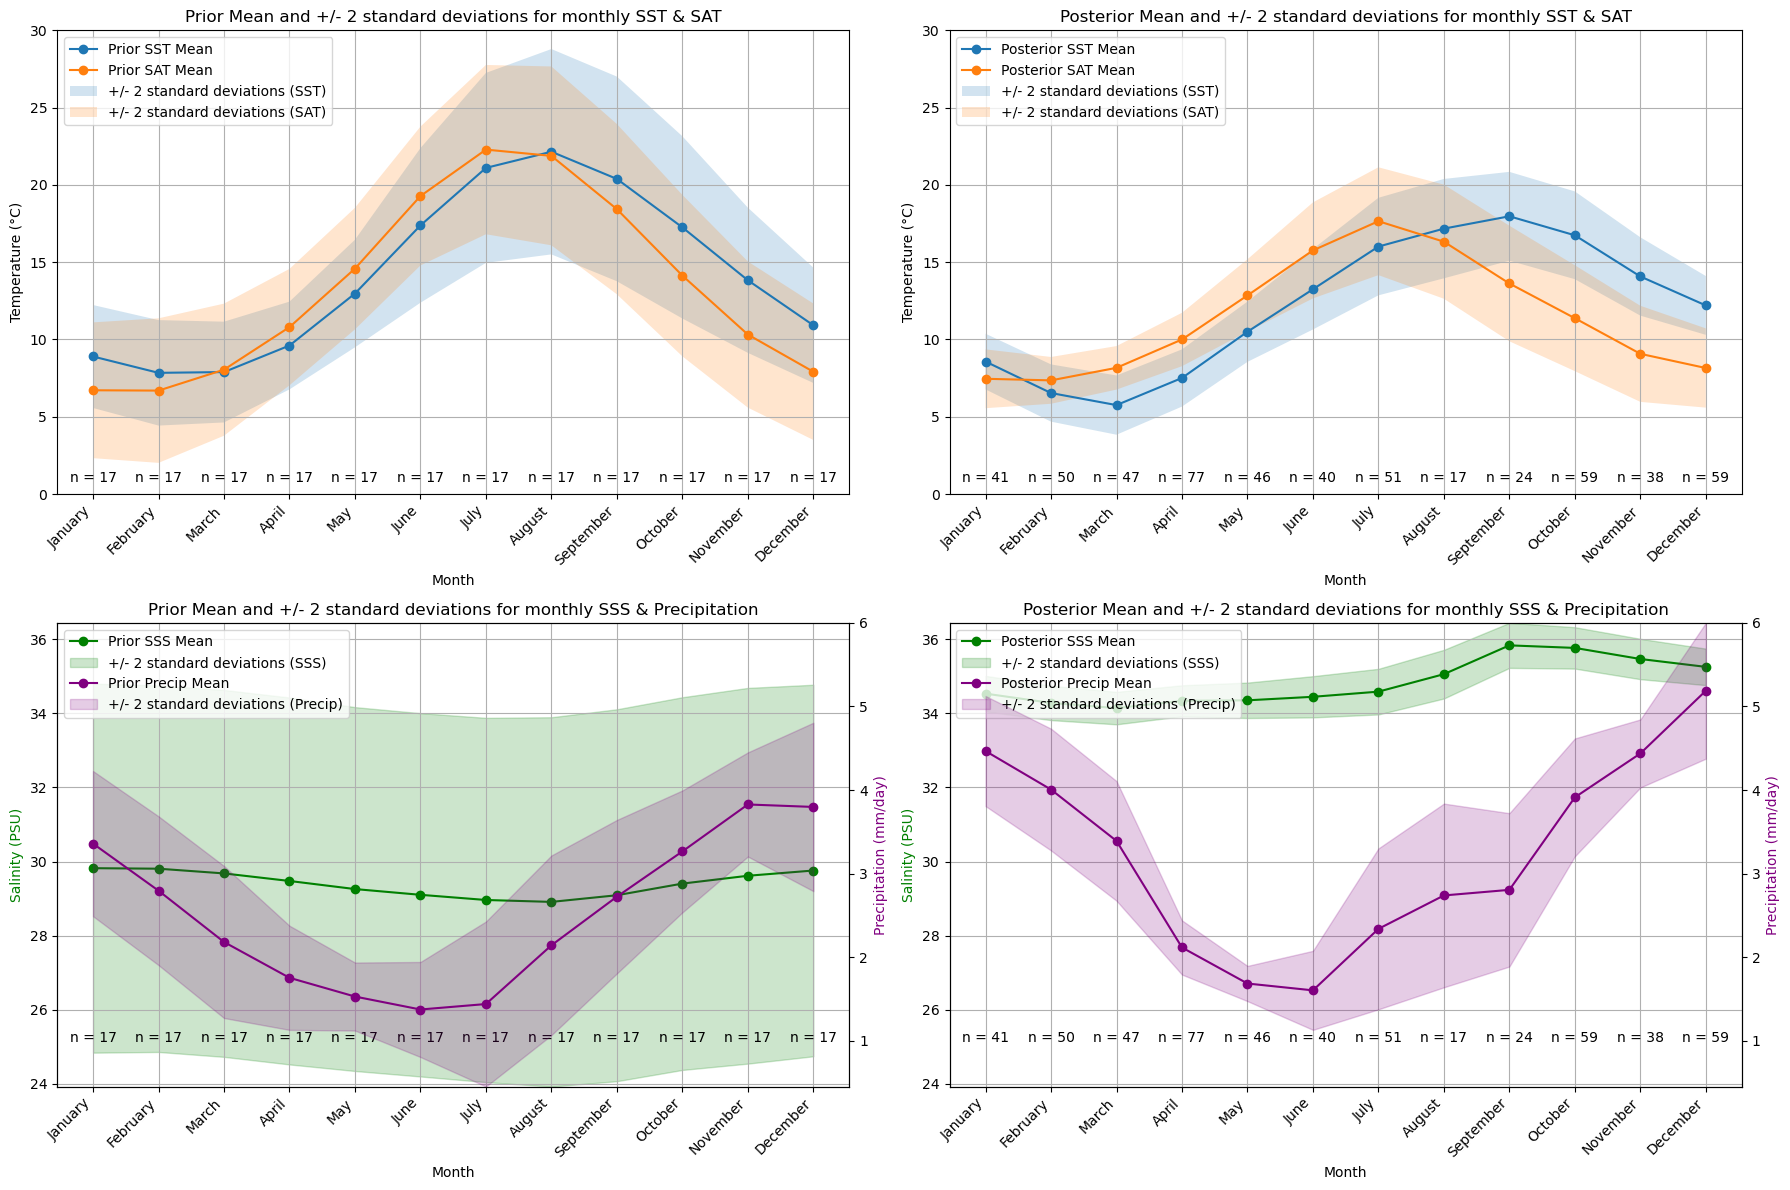

In [36]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - 2 * std_prior_SST_monthly,
    mu_prior_SST_monthly + 2 * std_prior_SST_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - 2 * std_prior_SAT_monthly,
    mu_prior_SAT_monthly + 2 * std_prior_SAT_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_monthly_aggregated_Railsback_ice_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_Railsback_ice_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_Railsback_ice_T - 2 * std_post_SST_D47_monthly_aggregated_Railsback_ice_T,
    mu_post_SST_D47_monthly_aggregated_Railsback_ice_T + 2 * std_post_SST_D47_monthly_aggregated_Railsback_ice_T,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_Railsback_ice_T - 2 * std_post_SAT_D47_monthly_aggregated_Railsback_ice_T,
    mu_post_SAT_D47_monthly_aggregated_Railsback_ice_T + 2 * std_post_SAT_D47_monthly_aggregated_Railsback_ice_T,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Posterior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_Railsback_ice_monthly_T - 2 * std_prior_SSS_d18Ow_Railsback_ice_monthly_T),
              np.min(mu_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T))
sss_max = max(np.max(mu_prior_SSS_d18Ow_Railsback_ice_monthly_T + 2 * std_prior_SSS_d18Ow_Railsback_ice_monthly_T),
              np.max(mu_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T))
precip_min = min(np.min(mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly),
                 np.min(mu_post_precip_monthly_aggregated_Railsback_ice - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_ice))))
precip_max = max(np.max(mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly),
                 np.max(mu_post_precip_monthly_aggregated_Railsback_ice + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_ice))))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_Railsback_ice_monthly_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_Railsback_ice_monthly_T - 2 * std_prior_SSS_d18Ow_Railsback_ice_monthly_T,
    mu_prior_SSS_d18Ow_Railsback_ice_monthly_T + 2 * std_prior_SSS_d18Ow_Railsback_ice_monthly_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly,
    mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly,
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Prior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T,
    mu_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_Railsback_ice_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip_monthly_aggregated_Railsback_ice, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated_Railsback_ice - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_ice)),
    mu_post_precip_monthly_aggregated_Railsback_ice + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_ice)),
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Posterior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 0].text(
        months_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 1].text(
        months_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_Railsback_ice_D47[i]) if hasattr(n_update_monthly_aggregated_Railsback_ice_D47, '__getitem__') else n_update_monthly_aggregated_Railsback_ice_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 0].text(
        months_scale[i], axes[1, 0].get_ylim()[0] + 1.5,
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 1].text(
        months_scale[i], axes[1, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_Railsback_ice_D47[i]) if hasattr(n_update_monthly_aggregated_Railsback_ice_D47, '__getitem__') else n_update_monthly_aggregated_Railsback_ice_D47}",
        ha='center', va='top', fontsize=10
    )

plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior with SDs instead of 95% confidence levels using Railsback (greenhouse) for d18Ow-SSS conversion

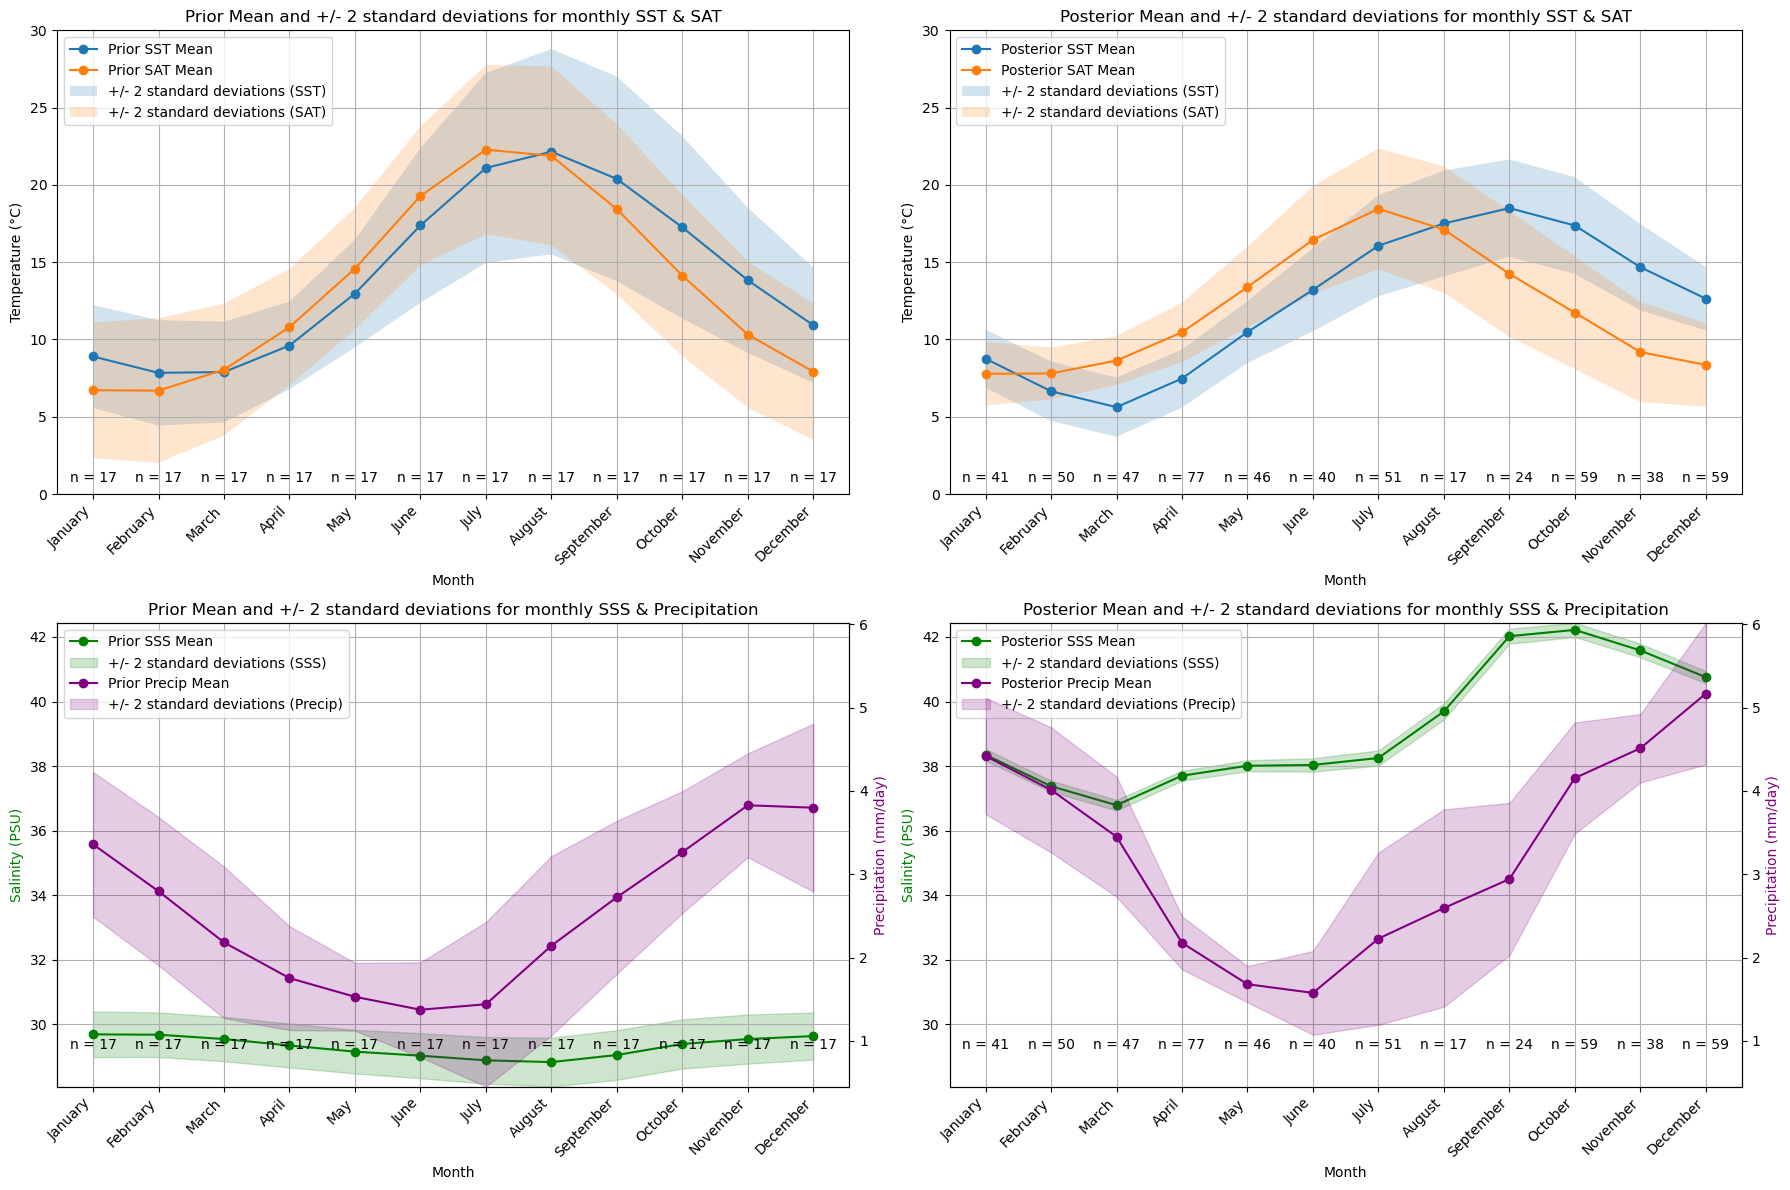

In [37]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - 2 * std_prior_SST_monthly,
    mu_prior_SST_monthly + 2 * std_prior_SST_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - 2 * std_prior_SAT_monthly,
    mu_prior_SAT_monthly + 2 * std_prior_SAT_monthly,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_monthly_aggregated_Railsback_green_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_Railsback_green_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_Railsback_green_T - 2 * std_post_SST_D47_monthly_aggregated_Railsback_green_T,
    mu_post_SST_D47_monthly_aggregated_Railsback_green_T + 2 * std_post_SST_D47_monthly_aggregated_Railsback_green_T,
    alpha=0.2, label='+/- 2 standard deviations (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_Railsback_green_T - 2 * std_post_SAT_D47_monthly_aggregated_Railsback_green_T,
    mu_post_SAT_D47_monthly_aggregated_Railsback_green_T + 2 * std_post_SAT_D47_monthly_aggregated_Railsback_green_T,
    alpha=0.2, label='+/- 2 standard deviations (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Posterior Mean and +/- 2 standard deviations for monthly SST & SAT')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_Railsback_green_monthly_T - 2 * std_prior_SSS_d18Ow_Railsback_green_monthly_T),
              np.min(mu_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T))
sss_max = max(np.max(mu_prior_SSS_d18Ow_Railsback_green_monthly_T + 2 * std_prior_SSS_d18Ow_Railsback_green_monthly_T),
              np.max(mu_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T))
precip_min = min(np.min(mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly),
                 np.min(mu_post_precip_monthly_aggregated_Railsback_green - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_green))))
precip_max = max(np.max(mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly),
                 np.max(mu_post_precip_monthly_aggregated_Railsback_green + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_green))))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_Railsback_green_monthly_T, label='Prior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_Railsback_green_monthly_T - 2 * std_prior_SSS_d18Ow_Railsback_green_monthly_T,
    mu_prior_SSS_d18Ow_Railsback_green_monthly_T + 2 * std_prior_SSS_d18Ow_Railsback_green_monthly_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - 2 * std_prior_precip_monthly,
    mu_prior_precip_monthly_original + 2 * std_prior_precip_monthly,
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Prior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T, label='Posterior SSS Mean', marker='o', color="green")
fill1 = ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T - 2 * std_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T,
    mu_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T + 2 * std_post_SSS_d18Ow_monthly_aggregated_Railsback_green_T,
    color="green", alpha=0.2, label='+/- 2 standard deviations (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip_monthly_aggregated_Railsback_green, label='Posterior Precip Mean', marker='o', color="purple")
fill2 = ax2.fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated_Railsback_green - 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_green)),
    mu_post_precip_monthly_aggregated_Railsback_green + 2 * np.sqrt(np.diag(cov_post_precip_monthly_aggregated_Railsback_green)),
    color="purple", alpha=0.2, label='+/- 2 standard deviations (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names, rotation=45, ha="right")
ax1.set_title('Posterior Mean and +/- 2 standard deviations for monthly SSS & Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + [fill1] + lns2 + [fill2]
labels = [l.get_label() for l in lns1] + [fill1.get_label()] + [l.get_label() for l in lns2] + [fill2.get_label()]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# Add "n = x" labels below each x-tick for each subplot to show the number of model values or updates
# Prior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 0].text(
        months_scale[i], axes[0, 0].get_ylim()[0] + 1.5,  # adjust location as needed
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SST & SAT
for i, month in enumerate(month_names):
    axes[0, 1].text(
        months_scale[i], axes[0, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_Railsback_green_D47[i]) if hasattr(n_update_monthly_aggregated_Railsback_green_D47, '__getitem__') else n_update_monthly_aggregated_Railsback_green_D47}",
        ha='center', va='top', fontsize=10
    )

# Prior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 0].text(
        months_scale[i], axes[1, 0].get_ylim()[0] + 1.5,
        f"n = {n_models_monthly[i] if hasattr(n_models_monthly, '__getitem__') else n_models_monthly}",
        ha='center', va='top', fontsize=10
    )

# Posterior SSS & Precipitation
for i, month in enumerate(month_names):
    axes[1, 1].text(
        months_scale[i], axes[1, 1].get_ylim()[0] + 1.5,
        f"n = {int(n_update_monthly_aggregated_Railsback_green_D47[i]) if hasattr(n_update_monthly_aggregated_Railsback_green_D47, '__getitem__') else n_update_monthly_aggregated_Railsback_green_D47}",
        ha='center', va='top', fontsize=10
    )

plt.tight_layout()
plt.show()

# Plot SST estimates and precision difference between assimilations with different d18Ow-SSS relationships

### Aggregate statistics on posterior outcomes on SST-D47 and d18Oc for all cases

In [38]:
# Aggregate SST outcomes and their precisions (standard deviations) based on assimilations with different d18Ow-SSS relationships into a table

# Create a dictionary to store the results
results = {
    'Month': month_names,
    'Harwood_Mean': mu_post_SST_D47_monthly_aggregated_Harwood_T,
    'Harwood_SD': std_post_SST_D47_monthly_aggregated_Harwood_T,
    'Graniero_Mean': mu_post_SST_D47_monthly_aggregated_Graniero_T,
    'Graniero_SD': std_post_SST_D47_monthly_aggregated_Graniero_T,
    'Railsback_ice_Mean': mu_post_SST_D47_monthly_aggregated_Railsback_ice_T,
    'Railsback_ice_SD': std_post_SST_D47_monthly_aggregated_Railsback_ice_T,
    'Railsback_green_Mean': mu_post_SST_D47_monthly_aggregated_Railsback_green_T,
    'Railsback_green_SD': std_post_SST_D47_monthly_aggregated_Railsback_green_T
}

# Create a Pandas DataFrame from the dictionary
df_results = pd.DataFrame(results)

# Export the table to a CSV file
df_results.to_csv("Sensitivity_test_d18Ow_SSS_relationship/posterior_SST_outcomes_table.csv")

# Print the DataFrame
print(df_results)

        Month  Harwood_Mean  Harwood_SD  Graniero_Mean  Graniero_SD  \
0     January      8.530402    0.926335       8.528514     0.933579   
1    February      6.536536    0.953439       6.528670     0.959274   
2       March      5.860544    0.964259       5.840724     0.960354   
3       April      7.591868    0.941116       7.578535     0.940751   
4         May     10.532464    1.001044      10.515754     1.003307   
5        June     13.338931    1.342293      13.321306     1.344975   
6        July     16.133690    1.629708      16.122995     1.634835   
7      August     17.354045    1.697047      17.365756     1.710862   
8   September     17.992636    1.541160      18.007466     1.565430   
9     October     16.642851    1.524642      16.660066     1.553228   
10   November     13.952476    1.362536      13.970987     1.388602   
11   December     12.041142    1.003713      12.052362     1.019625   

    Railsback_ice_Mean  Railsback_ice_SD  Railsback_green_Mean  \
0         

### Update aggregate table to innovation values by subtracting SST priors from SST posteriors

In [39]:
# Aggregate SST innovations and their precisions (standard deviations) based on assimilations with different d18Ow-SSS relationships into a table

# Create a dictionary to store the results
results_innov = {
    'Month': month_names,
    'Harwood_innovation': mu_post_SST_D47_monthly_aggregated_Harwood_T - mu_prior_SST_monthly,
    'Harwood_SD': std_post_SST_D47_monthly_aggregated_Harwood_T,
    'Graniero_innovation': mu_post_SST_D47_monthly_aggregated_Graniero_T - mu_prior_SST_monthly,
    'Graniero_SD': std_post_SST_D47_monthly_aggregated_Graniero_T,
    'Railsback_ice_innovation': mu_post_SST_D47_monthly_aggregated_Railsback_ice_T - mu_prior_SST_monthly,
    'Railsback_ice_SD': std_post_SST_D47_monthly_aggregated_Railsback_ice_T,
    'Railsback_green_innovation': mu_post_SST_D47_monthly_aggregated_Railsback_green_T - mu_prior_SST_monthly,
    'Railsback_green_SD': std_post_SST_D47_monthly_aggregated_Railsback_green_T
}

# Create a Pandas DataFrame from the dictionary
df_results_innov = pd.DataFrame(results_innov)

# Export the table to a CSV file
df_results_innov.to_csv("Sensitivity_test_d18Ow_SSS_relationship/innovation_SST_outcomes_table.csv")

# Print the DataFrame
print(df_results_innov)

        Month  Harwood_innovation  Harwood_SD  Graniero_innovation  \
0     January           -0.368689    0.926335            -0.370577   
1    February           -1.305282    0.953439            -1.313148   
2       March           -2.031274    0.964259            -2.051094   
3       April           -2.017223    0.941116            -2.030556   
4         May           -2.440263    1.001044            -2.456973   
5        June           -4.040160    1.342293            -4.057785   
6        July           -4.966310    1.629708            -4.977005   
7      August           -4.793228    1.697047            -4.781517   
8   September           -2.393727    1.541160            -2.378897   
9     October           -0.609876    1.524642            -0.592661   
10   November            0.120658    1.362536             0.139169   
11   December            1.122961    1.003713             1.134180   

    Graniero_SD  Railsback_ice_innovation  Railsback_ice_SD  \
0      0.933579           

### Create aggregate table containing SST priors and posteriors organized by SSS-d18Ow method

In [43]:
# Aggregate SST innovations and their precisions (standard deviations) based on assimilations with different d18Ow-SSS relationships into a table

# Create a dictionary to store the results
results_SST = {
    'Month': month_names,
    'Prior_mu_SST': mu_prior_SST_monthly,
    'Prior_std_SST': std_prior_SST_monthly,
    'Harwood_mu_SST': mu_post_SST_D47_monthly_aggregated_Harwood_T,
    'Harwood_std_SST': std_post_SST_D47_monthly_aggregated_Harwood_T,
    'Graniero_mu_SST': mu_post_SST_D47_monthly_aggregated_Graniero_T,
    'Graniero_std_SST': std_post_SST_D47_monthly_aggregated_Graniero_T,
    'Railsback_ice_mu_SST': mu_post_SST_D47_monthly_aggregated_Railsback_ice_T,
    'Railsback_ice_std_SST': std_post_SST_D47_monthly_aggregated_Railsback_ice_T,
    'Railsback_green_mu_SST': mu_post_SST_D47_monthly_aggregated_Railsback_green_T,
    'Railsback_green_std_SST': std_post_SST_D47_monthly_aggregated_Railsback_green_T
}

results_SAT = {
    'Month': month_names,
    'Prior_mu_SAT': mu_prior_SAT_monthly,
    'Prior_std_SAT': std_prior_SAT_monthly,
    'Harwood_mu_SAT': mu_post_SAT_D47_monthly_aggregated_Harwood_T,
    'Harwood_std_SAT': std_post_SAT_D47_monthly_aggregated_Harwood_T,
    'Graniero_mu_SAT': mu_post_SAT_D47_monthly_aggregated_Graniero_T,
    'Graniero_std_SAT': std_post_SAT_D47_monthly_aggregated_Graniero_T,
    'Railsback_ice_mu_SAT': mu_post_SAT_D47_monthly_aggregated_Railsback_ice_T,
    'Railsback_ice_std_SAT': std_post_SAT_D47_monthly_aggregated_Railsback_ice_T,
    'Railsback_green_mu_SAT': mu_post_SAT_D47_monthly_aggregated_Railsback_green_T,
    'Railsback_green_std_SAT': std_post_SAT_D47_monthly_aggregated_Railsback_green_T
}

# Create a Pandas DataFrame from the dictionary
df_results_SST = pd.DataFrame(results_SST)
df_results_SAT = pd.DataFrame(results_SAT)

# Export the table to a CSV file
df_results_SST.to_csv("Sensitivity_test_d18Ow_SSS_relationship/SST_outcomes_SSS-d18Ow.csv")
df_results_SAT.to_csv("Sensitivity_test_d18Ow_SSS_relationship/SAT_outcomes_SSS-d18Ow.csv")

# Print the DataFrame
print(df_results_SST)

        Month  Prior_mu_SST  Prior_std_SST  Harwood_mu_SST  Harwood_std_SST  \
0     January      8.899091       1.665193        8.530402         0.926335   
1    February      7.841818       1.705631        6.536536         0.953439   
2       March      7.891818       1.629790        5.860544         0.964259   
3       April      9.609091       1.419440        7.591868         0.941116   
4         May     12.972727       1.740265       10.532464         1.001044   
5        June     17.379091       2.500278       13.338931         1.342293   
6        July     21.100000       3.072107       16.133690         1.629708   
7      August     22.147273       3.321256       17.354045         1.697047   
8   September     20.386364       3.310049       17.992636         1.541160   
9     October     17.252727       2.947457       16.642851         1.524642   
10   November     13.831818       2.348088       13.952476         1.362536   
11   December     10.918182       1.864939       12.

## Plot monthly SST innovation outcomes and uncertainties per d18Ow-SSS relationship

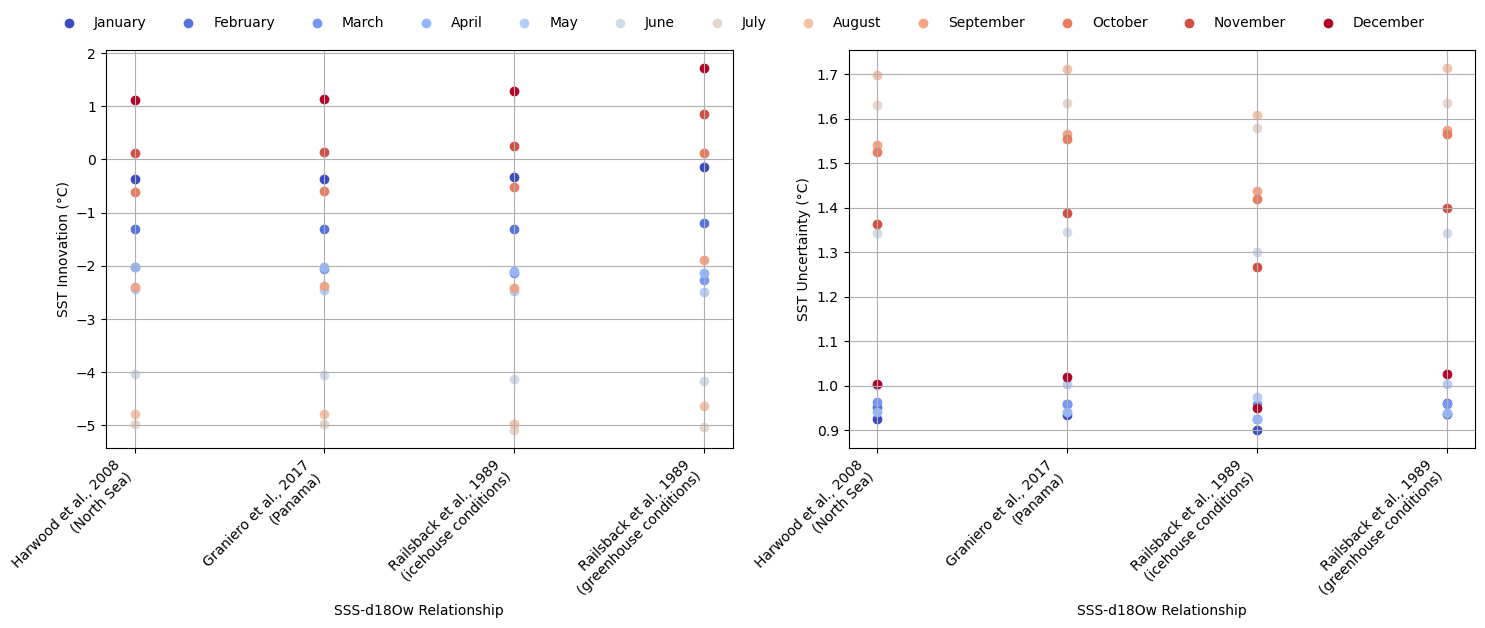

In [55]:
# Set up the plot
fig, ((ax1, ax2)) = plt.subplots(
    1, 2, figsize=(15, 6), sharex=True
)
fig.subplots_adjust(hspace=0.3, wspace=0.25)  # reduce vertical & horizontal spacing

# Define the SSS-d18Ow relationships
relationships = ['Harwood et al., 2008\n(North Sea)', 'Graniero et al., 2017\n(Panama)', 'Railsback et al., 1989\n(icehouse conditions)', 'Railsback et al., 1989\n(greenhouse conditions)']

# Define the months and their corresponding colors
months_list = df_results_innov['Month'].tolist()
num_months = len(months_list)
cmap = plt.cm.coolwarm
colors = [cmap(i / (len(month_names)-1)) for i in range(len(month_names))]
color_dict = dict(zip(month_names, colors))

# Plot each month as a point for each SSS-d18Ow relationship
for i, month in enumerate(months_list):
    x = relationships  # X-axis is the SSS-d18Ow relationship
    y = [df_results_innov[df_results_innov['Month'] == month]['Harwood_innovation'].values[0],
         df_results_innov[df_results_innov['Month'] == month]['Graniero_innovation'].values[0],
         df_results_innov[df_results_innov['Month'] == month]['Railsback_ice_innovation'].values[0],
         df_results_innov[df_results_innov['Month'] == month]['Railsback_green_innovation'].values[0]]
    yerr = [df_results_innov[df_results_innov['Month'] == month]['Harwood_SD'].values[0],
            df_results_innov[df_results_innov['Month'] == month]['Graniero_SD'].values[0],
            df_results_innov[df_results_innov['Month'] == month]['Railsback_ice_SD'].values[0],
            df_results_innov[df_results_innov['Month'] == month]['Railsback_green_SD'].values[0]]
    
    ax1.scatter(x, y, label=month, marker='o', color=color_dict[month])
    ax2.scatter(x, yerr, label=month, marker='o', color=color_dict[month])

# Customize the plot
ax1.set_xlabel('SSS-d18Ow Relationship')
ax1.set_ylabel('SST Innovation (°C)')
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation=45, ha='right')
ax1.grid(True)

ax2.set_xlabel('SSS-d18Ow Relationship')
ax2.set_ylabel('SST Uncertainty (°C)')
ax2.set_xticks(x)
ax2.set_xticklabels(x, rotation=45, ha='right')
ax2.grid(True)
plt.tight_layout()

# ---------------------------------------------------------
# Shared legend above all plots
handles1, labels1 = ax1.get_legend_handles_labels()
fig.legend(handles1, labels1,
           loc="upper center",
           bbox_to_anchor=(0.5, 1.05),
           ncol=len(month_names),
           frameon=False)

plt.show()

## Plot monthly SST outcomes and uncertainties per d18Ow-SSS relationship

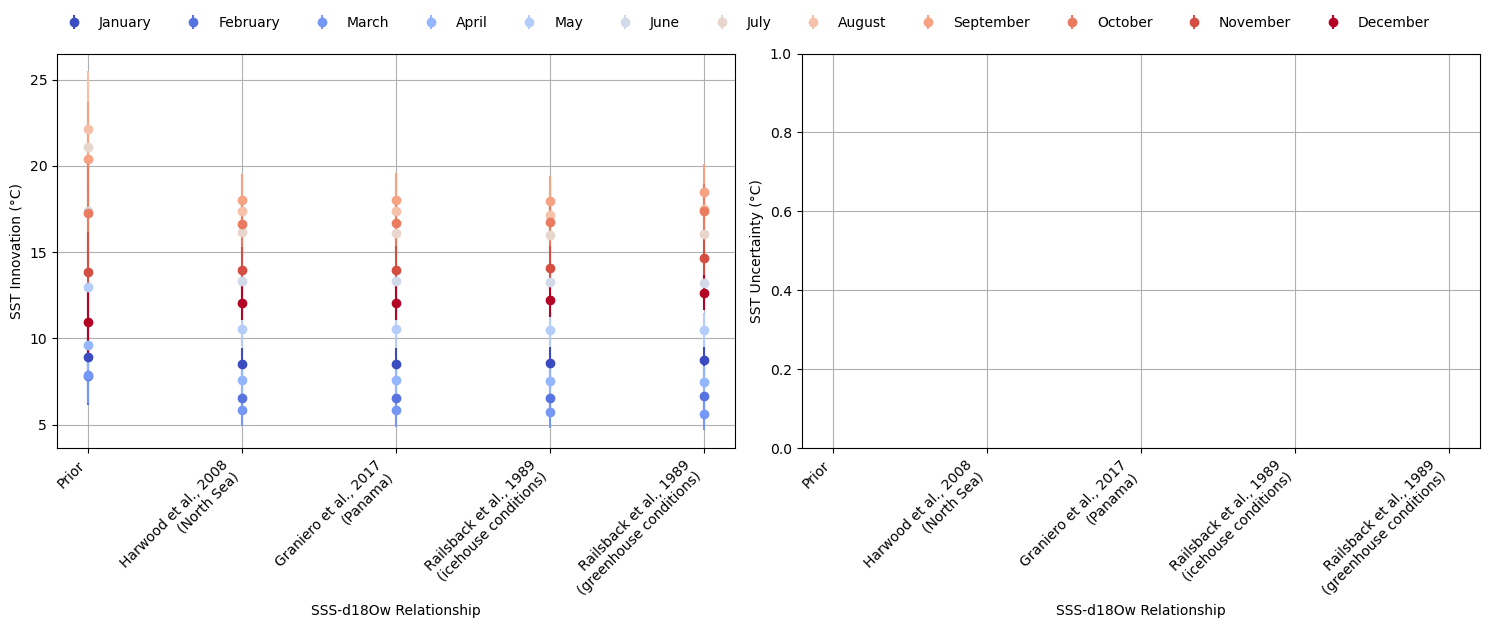

In [42]:
# Set up the plot
fig, ((ax1, ax2)) = plt.subplots(
    1, 2, figsize=(15, 6), sharex=True
)
fig.subplots_adjust(hspace=0.3, wspace=0.25)  # reduce vertical & horizontal spacing

# Define the x-axis labels based on SSS-d18Ow cases and prior
cases = ['Prior', 'Harwood et al., 2008\n(North Sea)', 'Graniero et al., 2017\n(Panama)', 'Railsback et al., 1989\n(icehouse conditions)', 'Railsback et al., 1989\n(greenhouse conditions)']

# Define the months and their corresponding colors
months_list = df_results_SST['Month'].tolist()
num_months = len(months_list)
cmap = plt.cm.coolwarm
colors = [cmap(i / (len(month_names)-1)) for i in range(len(month_names))]
color_dict = dict(zip(month_names, colors))

# Plot each month as a point for each SSS-d18Ow relationship
for i, month in enumerate(months_list):
    x = cases  # X-axis is the SSS-d18Ow relationship
    y = [df_results_SST[df_results_SST['Month'] == month]['Prior_mu_SST'].values[0],
        df_results_SST[df_results_SST['Month'] == month]['Harwood_mu_SST'].values[0],
        df_results_SST[df_results_SST['Month'] == month]['Graniero_mu_SST'].values[0],
        df_results_SST[df_results_SST['Month'] == month]['Railsback_ice_mu_SST'].values[0],
        df_results_SST[df_results_SST['Month'] == month]['Railsback_green_mu_SST'].values[0]]
    yerr = [df_results_SST[df_results_SST['Month'] == month]['Prior_std_SST'].values[0],
        df_results_SST[df_results_SST['Month'] == month]['Harwood_std_SST'].values[0],
        df_results_SST[df_results_SST['Month'] == month]['Graniero_std_SST'].values[0],
        df_results_SST[df_results_SST['Month'] == month]['Railsback_ice_std_SST'].values[0],
        df_results_SST[df_results_SST['Month'] == month]['Railsback_green_std_SST'].values[0]]
    
    ax1.errorbar(x, y, yerr, label=month, fmt='o', color=color_dict[month])
    # ax1.scatter(x, y, label=month, marker='o', color=color_dict[month])
    # ax2.scatter(x, yerr, label=month, marker='o', color=color_dict[month])

# Customize the plot
ax1.set_xlabel('SSS-d18Ow Relationship')
ax1.set_ylabel('SST Innovation (°C)')
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation=45, ha='right')
ax1.grid(True)

ax2.set_xlabel('SSS-d18Ow Relationship')
ax2.set_ylabel('SST Uncertainty (°C)')
ax2.set_xticks(x)
ax2.set_xticklabels(x, rotation=45, ha='right')
ax2.grid(True)
plt.tight_layout()

# ---------------------------------------------------------
# Shared legend above all plots
handles1, labels1 = ax1.get_legend_handles_labels()
fig.legend(handles1, labels1,
           loc="upper center",
           bbox_to_anchor=(0.5, 1.05),
           ncol=len(month_names),
           frameon=False)

plt.show()

C:\Users\nwi213\AppData\Local\Temp\ipykernel_22048\2990353717.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


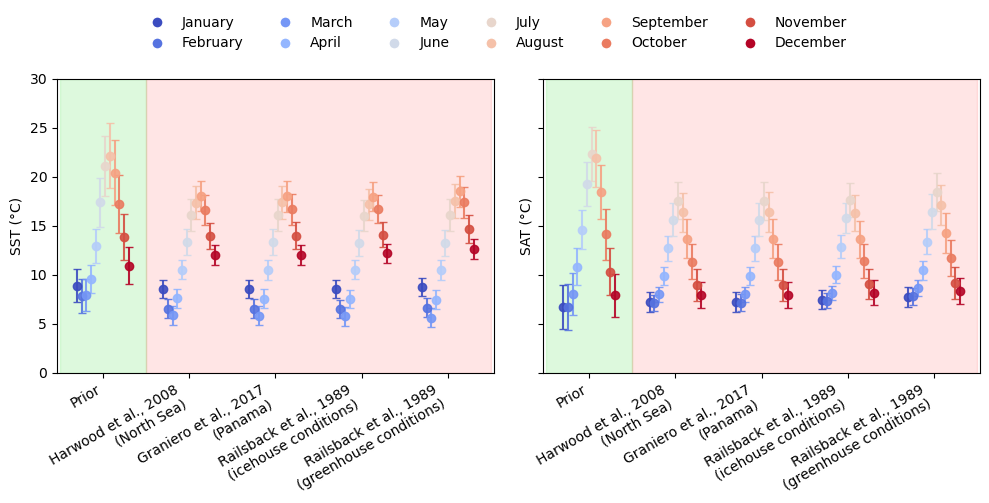

In [53]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.subplots_adjust(hspace=0.3)

# Columns to plot (mu + corresponding std) and nicer xlabels
mu_cols_sst = ["Prior_mu_SST", "Harwood_mu_SST", "Graniero_mu_SST", "Railsback_ice_mu_SST", "Railsback_green_mu_SST"]
std_cols_sst = ["Prior_std_SST", "Harwood_std_SST", "Graniero_std_SST", "Railsback_ice_std_SST", "Railsback_green_std_SST"]
mu_cols_sat = ["Prior_mu_SAT", "Harwood_mu_SAT", "Graniero_mu_SAT", "Railsback_ice_mu_SAT", "Railsback_green_mu_SAT"]
std_cols_sat = ["Prior_std_SAT", "Harwood_std_SAT", "Graniero_std_SAT", "Railsback_ice_std_SAT", "Railsback_green_std_SAT"]

# Horizontal axis layout prep
x = np.arange(len(mu_cols_sst))
x_offsets = np.linspace(-0.3, 0.3, len(df_results_SST.index))
xlabels = ['Prior', 'Harwood et al., 2008\n(North Sea)', 'Graniero et al., 2017\n(Panama)', 'Railsback et al., 1989\n(icehouse conditions)', 'Railsback et al., 1989\n(greenhouse conditions)']

# colour map for test cases (rows)
# df_results_SST["Month"] = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# n_cases = len(df_results_SST)
cmap = plt.cm.get_cmap("coolwarm")
# Check if length of cases equals the number of df_results_SST["Month"] (it should)
colors = [cmap(i / (len(df_results_SST["Month"]) - 1)) for i in range(len(df_results_SST["Month"]))]
legend_labels = df_results_SST["Month"].copy()
# else:
#     colors = [cmap(i / max(n_cases - 1, 1)) for i in range(n_cases)]
#     legend_labels = [str(idx) for idx in df_results_SST.index]

# Plot SST outcomes
for i, idx in enumerate(df_results_SST.index):
    means = df_results_SST.loc[idx, mu_cols_sst].values.astype(float)
    errs = df_results_SST.loc[idx, std_cols_sst].values.astype(float)
    ax1.errorbar(x + x_offsets[i], means, yerr=errs, capsize=3, fmt='o', color=colors[i], alpha=0.9)
ax1.set_ylim(0, 30) # Equalize vertical axes between plot panels
# Add light green rectangle to highlight prior
ax1.add_patch(
    Rectangle(
        (-0.5, ax1.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
        color='lightgreen',
        alpha=0.3,
    )
)
# Add light red rectangle to highlight posteriors
ax1.add_patch(
    Rectangle(
        (0.5, ax1.get_ylim()[0]),  # (x,y)
        4,         # width
        ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
        color='red',
        alpha=0.1,
    )
)
ax1.set_xticks(x)
ax1.set_xticklabels(xlabels, rotation = 30, ha = "right")
ax1.set_ylabel("SST (°C)")

# Plot SAT outcomes
for i, idx in enumerate(df_results_SAT.index):
    means = df_results_SAT.loc[idx, mu_cols_sat].values.astype(float)
    errs = df_results_SAT.loc[idx, std_cols_sat].values.astype(float)
    ax3.errorbar(x + x_offsets[i], means, yerr=errs, capsize=3, fmt='o', color=colors[i], alpha=0.9)
ax3.set_ylim(0, 30) # Equalize vertical axes between plot panels
# Add light green rectangle to highlight prior
ax3.add_patch(
    Rectangle(
        (-0.5, ax3.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax3.get_ylim()[1] - ax3.get_ylim()[0],  # height
        color='lightgreen',
        alpha=0.3,
    )
)
# Add light red rectangle to highlight posteriors
ax3.add_patch(
    Rectangle(
        (0.5, ax3.get_ylim()[0]),  # (x,y)
        4,         # width
        ax3.get_ylim()[1] - ax3.get_ylim()[0],  # height
        color='red',
        alpha=0.1,
    )
)
ax3.set_xticks(x)
ax3.set_xticklabels(xlabels, rotation = 30, ha = "right")
ax3.set_ylabel("SAT (°C)")

# build shared legend (ordered according to legend_labels)
proxy_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=8, linestyle='') 
                 for i in range(len(legend_labels))]
fig.legend(proxy_handles, legend_labels, loc="upper center", bbox_to_anchor=(0.5, 1.01), ncol=6, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()